In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 14


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 14


store_mean_0-lag0-offset14

 family_0-lag0-offset14

 city_0-lag0-offset14

 cluster_mv36-lag0-offset14

 cluster_0-lag0-offset14

 city_mv36-lag0-offset14

 item_mean_0-lag0-offset14

 class_0-lag0-offset14

 type_0-lag0-offset14

 type_mv36-lag0-offset14

 state_mv36-lag0-offset14

 class_mv36-lag0-offset14

 state_0-lag0-offset14

 family_mv36-lag0-offset14

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset14

 y_0-lag1-offset14

 y_0-lag2-offset14

 y_0-lag3-offset14

 y_0-lag4-offset14

 y_0-lag5-offset14

 y_0-lag6-offset14

 sales_ma_224-lag0-offset14

 sales_ma_14-lag0-offset14

 sales_ma_28-lag0-offset14

 sales_ma_112-lag0-offset14

 sales_ma_7-lag0-offset14

 sales_ma_3-lag0-offset14

 sales_ma_56-lag0-offset14

 sales_week_season_ma_p7-lag0-offset14

 sales_week_season_ma_p4-lag0-offset14

 sales_week_season_ma_p13-lag0-offset14

 sales_week_season_ma_p2-lag0-offset14

 sales_week_season_ma_p3-lag0-offset14

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 25.9 s, total: 3min 7s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset14  family_0-lag0-offset14  \
1683                    1.570312                1.683594   
1684                    1.513672                1.821289   
1685                    1.291016                1.852539   
1686                    1.554688                1.739258   
1687                    1.582031                1.780273   
1688                    1.684570                1.749023   
1689                    1.474609                1.663086   

      city_0-lag0-offset14  cluster_mv36-lag0-offset14  \
1683              1.833984                    1.650391   
1684              1.964844                    1.652344   
1685              2.025391                    1.650391   
1686              1.891602                    1.648438   
1687              1.948242                    1.649414   
1688              1.941406                    1.654297   
1689              1.794922                    1.651367   

      cluster_0-lag0-offset14  city_mv36-lag0-offset14  \
1683                 1.640625                 1.871094   
1684                 1.695312                 1.875000   
1685                 1.696289                 1.875977   
1686                 1.631836                 1.871094   
1687                 1.679688                 1.875000   
1688                 1.729492                 1.880859   
1689                 1.544922                 1.880859   

      item_mean_0-lag0-offset14  class_0-lag0-offset14  type_0-lag0-offset14  \
1683                   1.924805               1.776367              1.650391   
1684                   2.148438               1.877930              1.713867   
1685                   2.013672               1.715820              1.728516   
1686                   1.767578               1.609375              1.654297   
1687                   1.710938               1.669922              1.695312   
1688                   1.789062               1.687500              1.740234   
1689                   1.869141               1.654297              1.556641   

      type_mv36-lag0-offset14  state_mv36-lag0-offset14  \
1683                 1.660156                  1.869141   
1684                 1.661133                  1.873047   
1685                 1.661133                  1.874023   
1686                 1.658203                  1.869141   
1687                 1.660156                  1.873047   
1688                 1.665039                  1.878906   
1689                 1.662109                  1.878906   

      class_mv36-lag0-offset14  state_0-lag0-offset14  \
1683                  1.658203               1.833008   
1684                  1.664062               1.957031   
1685                  1.661133               2.017578   
1686                  1.659180               1.890625   
1687                  1.664062               1.953125   
1688                  1.668945               1.944336   
1689                  1.671875               1.801758   

      family_mv36-lag0-offset14  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.714844                     1.0                1.0   
1684                   1.718750                     0.0                1.0   
1685                   1.719727                     0.0                1.0   
1686                   1.715820                     0.0                1.0   
1687                   1.717773                     0.0                1.0   
1688                   1.722656                     0.0                1.0   
1689                   1.723633                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset14  y_0-lag1-offset14  \
1683             0.733398           2.398438           2.080078   
1684             0.799805           2.564453           2.398438   
1685             0.866699           1.791992           2.564453   
1686             0.933105           2.197266           1.791992   
1687             0.000000           1.791992           2.197266 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset14     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset14     0.0     0.0  0.0002     0.0   
2                     city_0-lag0-offset14     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset14     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset14     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset14     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset14  0.0817  0.0849  0.0837  0.0871   
7                    class_0-lag0-offset14  0.0085   0.009  0.0085  0.0083   
8                     type_0-lag0-offset14     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset14     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset14     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset14   0.008   0.008   0.008   0.008   
12                   state_0-lag0-offset14     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset14     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset14  0.4964  0.5195  0.5059  0.5149   
18                       y_0-lag1-offset14  0.4972  0.4964  0.5195  0.5059   
19                       y_0-lag2-offset14  0.5345  0.4972  0.4964  0.5195   
20                       y_0-lag3-offset14  0.5599  0.5345  0.4972  0.4964   
21                       y_0-lag4-offset14  0.5474  0.5599  0.5345  0.4972   
22                       y_0-lag5-offset14  0.5429  0.5474  0.5599  0.5345   
23                       y_0-lag6-offset14  0.5249  0.5429  0.5474  0.5599   
24              sales_ma_224-lag0-offset14  0.5037  0.5037  0.5036  0.5035   
25               sales_ma_14-lag0-offset14  0.5174  0.5164  0.5133  0.5107   
26               sales_ma_28-lag0-offset14  0.5019  0.5029  0.5021   0.502   
27              sales_ma_112-lag0-offset14  0.4907  0.4904  0.4901  0.4899   
28                sales_ma_7-lag0-offset14  0.5048  0.5034  0.4975  0.4929   
29                sales_ma_3-lag0-offset14  0.4928   0.489  0.4925  0.4987   
30               sales_ma_56-lag0-offset14  0.4948  0.4951  0.4943  0.4939   
31   sales_week_season_ma_p7-lag0-offset14     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag0-offset14     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag0-offset14     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag0-offset14  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag0-offset14     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0866  0.0824  
7    0.009  0.0078  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5382  0.5295  
18  0.5149  0.5382  
19  0.5059  0.5149  
20  0.5195  0.5059  
21  0.4964  0.5195  
22  0.4972  0.4964  
23  0.5345  0.4972  
24  0.5036  0.5038  
25  0.5096  0.5089  
26  0.5019   0.502  
27  0.4899  0.4899  
28  0.4903  0.4888  
29  0.5043  0.5131  
30  0.4938  0.4935  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2467:08:31 - loss: 0.8584

     8192/316424880 [..............................] - ETA: 308:58:39 - loss: 0.4443 

    15360/316424880 [..............................] - ETA: 165:04:14 - loss: 0.3940

    23552/316424880 [..............................] - ETA: 107:51:51 - loss: 0.3701

    31744/316424880 [..............................] - ETA: 80:10:40 - loss: 0.3659 

    39936/316424880 [..............................] - ETA: 63:50:51 - loss: 0.3637

    48128/316424880 [..............................] - ETA: 53:04:39 - loss: 0.3578

    56320/316424880 [..............................] - ETA: 45:26:30 - loss: 0.3495

    63488/316424880 [..............................] - ETA: 40:22:46 - loss: 0.3424

    71680/316424880 [..............................] - ETA: 35:49:53 - loss: 0.3371

    79872/316424880 [..............................] - ETA: 32:12:50 - loss: 0.3331

    88064/316424880 [..............................] - ETA: 29:16:11 - loss: 0.3266

    96256/316424880 [..............................] - ETA: 26:49:40 - loss: 0.3241

   104448/316424880 [..............................] - ETA: 24:46:01 - loss: 0.3226

   112640/316424880 [..............................] - ETA: 23:00:20 - loss: 0.3209

   120832/316424880 [..............................] - ETA: 21:29:00 - loss: 0.3208

   129024/316424880 [..............................] - ETA: 20:09:16 - loss: 0.3188

   137216/316424880 [..............................] - ETA: 18:59:01 - loss: 0.3161

   145408/316424880 [..............................] - ETA: 17:56:45 - loss: 0.3150

   153600/316424880 [..............................] - ETA: 17:01:10 - loss: 0.3136

   161792/316424880 [..............................] - ETA: 16:11:07 - loss: 0.3118

   169984/316424880 [..............................] - ETA: 15:25:59 - loss: 0.3108

   178176/316424880 [..............................] - ETA: 14:44:59 - loss: 0.3097

   186368/316424880 [..............................] - ETA: 14:07:33 - loss: 0.3098

   194560/316424880 [..............................] - ETA: 13:33:13 - loss: 0.3091

   202752/316424880 [..............................] - ETA: 13:01:39 - loss: 0.3104

   210944/316424880 [..............................] - ETA: 12:32:42 - loss: 0.3116

   219136/316424880 [..............................] - ETA: 12:05:52 - loss: 0.3112

   227328/316424880 [..............................] - ETA: 11:40:57 - loss: 0.3105

   235520/316424880 [..............................] - ETA: 11:17:47 - loss: 0.3096

   243712/316424880 [..............................] - ETA: 10:56:09 - loss: 0.3089

   251904/316424880 [..............................] - ETA: 10:35:54 - loss: 0.3078

   260096/316424880 [..............................] - ETA: 10:16:59 - loss: 0.3080

   268288/316424880 [..............................] - ETA: 9:59:12 - loss: 0.3081 

   276480/316424880 [..............................] - ETA: 9:42:27 - loss: 0.3075

   284672/316424880 [..............................] - ETA: 9:26:39 - loss: 0.3071

   292864/316424880 [..............................] - ETA: 9:11:48 - loss: 0.3058

   301056/316424880 [..............................] - ETA: 8:57:43 - loss: 0.3054

   309248/316424880 [..............................] - ETA: 8:44:22 - loss: 0.3049

   317440/316424880 [..............................] - ETA: 8:31:41 - loss: 0.3046

   325632/316424880 [..............................] - ETA: 8:19:41 - loss: 0.3040

   333824/316424880 [..............................] - ETA: 8:08:15 - loss: 0.3033

   342016/316424880 [..............................] - ETA: 7:57:22 - loss: 0.3031

   350208/316424880 [..............................] - ETA: 7:47:00 - loss: 0.3032

   358400/316424880 [..............................] - ETA: 7:37:05 - loss: 0.3028

   365568/316424880 [..............................] - ETA: 7:28:50 - loss: 0.3026

   373760/316424880 [..............................] - ETA: 7:19:44 - loss: 0.3022

   381952/316424880 [..............................] - ETA: 7:11:01 - loss: 0.3013

   390144/316424880 [..............................] - ETA: 7:02:41 - loss: 0.3010

   398336/316424880 [..............................] - ETA: 6:54:42 - loss: 0.3007

   406528/316424880 [..............................] - ETA: 6:47:03 - loss: 0.3004

   414720/316424880 [..............................] - ETA: 6:39:40 - loss: 0.2998

   422912/316424880 [..............................] - ETA: 6:32:35 - loss: 0.2992

   431104/316424880 [..............................] - ETA: 6:25:46 - loss: 0.2991

   439296/316424880 [..............................] - ETA: 6:19:12 - loss: 0.2985

   447488/316424880 [..............................] - ETA: 6:12:53 - loss: 0.2978

   455680/316424880 [..............................] - ETA: 6:06:47 - loss: 0.2975

   463872/316424880 [..............................] - ETA: 6:00:53 - loss: 0.2970

   472064/316424880 [..............................] - ETA: 5:55:13 - loss: 0.2967

   480256/316424880 [..............................] - ETA: 5:49:43 - loss: 0.2965

   487424/316424880 [..............................] - ETA: 5:45:06 - loss: 0.2961

   495616/316424880 [..............................] - ETA: 5:39:58 - loss: 0.2959

   503808/316424880 [..............................] - ETA: 5:34:58 - loss: 0.2955

   512000/316424880 [..............................] - ETA: 5:30:09 - loss: 0.2953

   520192/316424880 [..............................] - ETA: 5:25:28 - loss: 0.2952

   528384/316424880 [..............................] - ETA: 5:20:59 - loss: 0.2949

   536576/316424880 [..............................] - ETA: 5:16:36 - loss: 0.2950

   544768/316424880 [..............................] - ETA: 5:12:21 - loss: 0.2950

   552960/316424880 [..............................] - ETA: 5:08:12 - loss: 0.2947

   561152/316424880 [..............................] - ETA: 5:04:13 - loss: 0.2947

   569344/316424880 [..............................] - ETA: 5:00:19 - loss: 0.2947

   577536/316424880 [..............................] - ETA: 4:56:33 - loss: 0.2944

   585728/316424880 [..............................] - ETA: 4:52:52 - loss: 0.2941

   593920/316424880 [..............................] - ETA: 4:49:18 - loss: 0.2945

   602112/316424880 [..............................] - ETA: 4:45:49 - loss: 0.2943

   610304/316424880 [..............................] - ETA: 4:42:26 - loss: 0.2941

   618496/316424880 [..............................] - ETA: 4:39:09 - loss: 0.2941

   626688/316424880 [..............................] - ETA: 4:35:58 - loss: 0.2942

   634880/316424880 [..............................] - ETA: 4:32:50 - loss: 0.2939

   643072/316424880 [..............................] - ETA: 4:29:48 - loss: 0.2937

   651264/316424880 [..............................] - ETA: 4:26:50 - loss: 0.2938

   659456/316424880 [..............................] - ETA: 4:23:56 - loss: 0.2937

   667648/316424880 [..............................] - ETA: 4:21:06 - loss: 0.2936

   675840/316424880 [..............................] - ETA: 4:18:21 - loss: 0.2934

   683008/316424880 [..............................] - ETA: 4:16:01 - loss: 0.2932

   691200/316424880 [..............................] - ETA: 4:13:23 - loss: 0.2931

   699392/316424880 [..............................] - ETA: 4:10:48 - loss: 0.2930

   707584/316424880 [..............................] - ETA: 4:08:17 - loss: 0.2930

   715776/316424880 [..............................] - ETA: 4:05:50 - loss: 0.2927

   723968/316424880 [..............................] - ETA: 4:03:26 - loss: 0.2924

   732160/316424880 [..............................] - ETA: 4:01:06 - loss: 0.2921

   740352/316424880 [..............................] - ETA: 3:58:47 - loss: 0.2919

   748544/316424880 [..............................] - ETA: 3:56:32 - loss: 0.2917

   756736/316424880 [..............................] - ETA: 3:54:20 - loss: 0.2915

   764928/316424880 [..............................] - ETA: 3:52:11 - loss: 0.2914

   773120/316424880 [..............................] - ETA: 3:50:05 - loss: 0.2913

   781312/316424880 [..............................] - ETA: 3:48:01 - loss: 0.2911

   789504/316424880 [..............................] - ETA: 3:46:00 - loss: 0.2912

   797696/316424880 [..............................] - ETA: 3:44:01 - loss: 0.2911

   805888/316424880 [..............................] - ETA: 3:42:05 - loss: 0.2911

   814080/316424880 [..............................] - ETA: 3:40:12 - loss: 0.2911

   822272/316424880 [..............................] - ETA: 3:38:21 - loss: 0.2911

   830464/316424880 [..............................] - ETA: 3:36:32 - loss: 0.2911

   838656/316424880 [..............................] - ETA: 3:34:44 - loss: 0.2910

   846848/316424880 [..............................] - ETA: 3:32:58 - loss: 0.2907

   855040/316424880 [..............................] - ETA: 3:31:16 - loss: 0.2907

   863232/316424880 [..............................] - ETA: 3:29:35 - loss: 0.2905

   871424/316424880 [..............................] - ETA: 3:27:56 - loss: 0.2905

   879616/316424880 [..............................] - ETA: 3:26:19 - loss: 0.2904

   887808/316424880 [..............................] - ETA: 3:24:44 - loss: 0.2902

   896000/316424880 [..............................] - ETA: 3:23:09 - loss: 0.2901

   904192/316424880 [..............................] - ETA: 3:21:37 - loss: 0.2900

   911360/316424880 [..............................] - ETA: 3:20:19 - loss: 0.2899

   919552/316424880 [..............................] - ETA: 3:18:51 - loss: 0.2898

   927744/316424880 [..............................] - ETA: 3:17:23 - loss: 0.2898

   935936/316424880 [..............................] - ETA: 3:15:56 - loss: 0.2898

   944128/316424880 [..............................] - ETA: 3:14:31 - loss: 0.2896

   953344/316424880 [..............................] - ETA: 3:12:57 - loss: 0.2895

   961536/316424880 [..............................] - ETA: 3:11:34 - loss: 0.2894

   969728/316424880 [..............................] - ETA: 3:10:15 - loss: 0.2893

   977920/316424880 [..............................] - ETA: 3:08:56 - loss: 0.2892

   986112/316424880 [..............................] - ETA: 3:07:39 - loss: 0.2892

   994304/316424880 [..............................] - ETA: 3:06:23 - loss: 0.2890

  1002496/316424880 [..............................] - ETA: 3:05:08 - loss: 0.2889

  1010688/316424880 [..............................] - ETA: 3:03:55 - loss: 0.2887

  1018880/316424880 [..............................] - ETA: 3:02:42 - loss: 0.2887

  1027072/316424880 [..............................] - ETA: 3:01:31 - loss: 0.2885

  1035264/316424880 [..............................] - ETA: 3:00:21 - loss: 0.2886

  1043456/316424880 [..............................] - ETA: 2:59:11 - loss: 0.2885

  1051648/316424880 [..............................] - ETA: 2:58:04 - loss: 0.2884

  1059840/316424880 [..............................] - ETA: 2:56:56 - loss: 0.2882

  1068032/316424880 [..............................] - ETA: 2:55:51 - loss: 0.2881

  1076224/316424880 [..............................] - ETA: 2:54:46 - loss: 0.2880

  1084416/316424880 [..............................] - ETA: 2:53:42 - loss: 0.2878

  1092608/316424880 [..............................] - ETA: 2:52:39 - loss: 0.2876

  1100800/316424880 [..............................] - ETA: 2:51:37 - loss: 0.2875

  1108992/316424880 [..............................] - ETA: 2:50:36 - loss: 0.2874

  1117184/316424880 [..............................] - ETA: 2:49:36 - loss: 0.2873

  1125376/316424880 [..............................] - ETA: 2:48:36 - loss: 0.2874

  1133568/316424880 [..............................] - ETA: 2:47:38 - loss: 0.2873

  1141760/316424880 [..............................] - ETA: 2:46:40 - loss: 0.2872

  1149952/316424880 [..............................] - ETA: 2:45:44 - loss: 0.2873

  1158144/316424880 [..............................] - ETA: 2:44:47 - loss: 0.2872

  1166336/316424880 [..............................] - ETA: 2:43:53 - loss: 0.2871

  1174528/316424880 [..............................] - ETA: 2:42:58 - loss: 0.2871

  1182720/316424880 [..............................] - ETA: 2:42:05 - loss: 0.2870

  1190912/316424880 [..............................] - ETA: 2:41:12 - loss: 0.2869

  1198080/316424880 [..............................] - ETA: 2:40:28 - loss: 0.2869

  1206272/316424880 [..............................] - ETA: 2:39:36 - loss: 0.2867

  1214464/316424880 [..............................] - ETA: 2:38:45 - loss: 0.2866

  1222656/316424880 [..............................] - ETA: 2:37:55 - loss: 0.2865

  1230848/316424880 [..............................] - ETA: 2:37:05 - loss: 0.2865

  1239040/316424880 [..............................] - ETA: 2:36:16 - loss: 0.2864

  1247232/316424880 [..............................] - ETA: 2:35:27 - loss: 0.2863

  1255424/316424880 [..............................] - ETA: 2:34:40 - loss: 0.2863

  1263616/316424880 [..............................] - ETA: 2:33:53 - loss: 0.2864

  1271808/316424880 [..............................] - ETA: 2:33:06 - loss: 0.2863

  1280000/316424880 [..............................] - ETA: 2:32:20 - loss: 0.2863

  1288192/316424880 [..............................] - ETA: 2:31:35 - loss: 0.2862

  1296384/316424880 [..............................] - ETA: 2:30:49 - loss: 0.2861

  1304576/316424880 [..............................] - ETA: 2:30:05 - loss: 0.2861

  1312768/316424880 [..............................] - ETA: 2:29:21 - loss: 0.2860

  1320960/316424880 [..............................] - ETA: 2:28:39 - loss: 0.2860

  1329152/316424880 [..............................] - ETA: 2:27:56 - loss: 0.2860

  1337344/316424880 [..............................] - ETA: 2:27:14 - loss: 0.2860

  1345536/316424880 [..............................] - ETA: 2:26:33 - loss: 0.2861

  1353728/316424880 [..............................] - ETA: 2:25:52 - loss: 0.2861

  1361920/316424880 [..............................] - ETA: 2:25:11 - loss: 0.2860

  1370112/316424880 [..............................] - ETA: 2:24:31 - loss: 0.2859

  1378304/316424880 [..............................] - ETA: 2:23:52 - loss: 0.2859

  1386496/316424880 [..............................] - ETA: 2:23:12 - loss: 0.2859

  1394688/316424880 [..............................] - ETA: 2:22:34 - loss: 0.2859

  1402880/316424880 [..............................] - ETA: 2:21:56 - loss: 0.2859

  1411072/316424880 [..............................] - ETA: 2:21:17 - loss: 0.2858

  1419264/316424880 [..............................] - ETA: 2:20:41 - loss: 0.2858

  1427456/316424880 [..............................] - ETA: 2:20:04 - loss: 0.2857

  1435648/316424880 [..............................] - ETA: 2:19:27 - loss: 0.2857

  1443840/316424880 [..............................] - ETA: 2:18:51 - loss: 0.2857

  1452032/316424880 [..............................] - ETA: 2:18:16 - loss: 0.2856

  1460224/316424880 [..............................] - ETA: 2:17:41 - loss: 0.2855

  1468416/316424880 [..............................] - ETA: 2:17:06 - loss: 0.2854

  1476608/316424880 [..............................] - ETA: 2:16:32 - loss: 0.2854

  1484800/316424880 [..............................] - ETA: 2:15:58 - loss: 0.2854

  1492992/316424880 [..............................] - ETA: 2:15:25 - loss: 0.2852

  1501184/316424880 [..............................] - ETA: 2:14:51 - loss: 0.2851

  1509376/316424880 [..............................] - ETA: 2:14:18 - loss: 0.2851

  1517568/316424880 [..............................] - ETA: 2:13:45 - loss: 0.2850

  1525760/316424880 [..............................] - ETA: 2:13:14 - loss: 0.2851

  1533952/316424880 [..............................] - ETA: 2:12:42 - loss: 0.2851

  1542144/316424880 [..............................] - ETA: 2:12:10 - loss: 0.2851

  1550336/316424880 [..............................] - ETA: 2:11:39 - loss: 0.2849

  1558528/316424880 [..............................] - ETA: 2:11:08 - loss: 0.2850

  1566720/316424880 [..............................] - ETA: 2:10:37 - loss: 0.2850

  1574912/316424880 [..............................] - ETA: 2:10:07 - loss: 0.2849

  1583104/316424880 [..............................] - ETA: 2:09:37 - loss: 0.2849

  1591296/316424880 [..............................] - ETA: 2:09:07 - loss: 0.2849

  1599488/316424880 [..............................] - ETA: 2:08:37 - loss: 0.2849

  1605632/316424880 [..............................] - ETA: 2:08:18 - loss: 0.2848

  1613824/316424880 [..............................] - ETA: 2:07:49 - loss: 0.2847

  1622016/316424880 [..............................] - ETA: 2:07:21 - loss: 0.2847

  1630208/316424880 [..............................] - ETA: 2:06:52 - loss: 0.2847

  1638400/316424880 [..............................] - ETA: 2:06:25 - loss: 0.2847

  1646592/316424880 [..............................] - ETA: 2:05:57 - loss: 0.2846

  1654784/316424880 [..............................] - ETA: 2:05:30 - loss: 0.2845

  1662976/316424880 [..............................] - ETA: 2:05:02 - loss: 0.2845

  1671168/316424880 [..............................] - ETA: 2:04:35 - loss: 0.2844

  1679360/316424880 [..............................] - ETA: 2:04:09 - loss: 0.2845

  1687552/316424880 [..............................] - ETA: 2:03:42 - loss: 0.2844

  1695744/316424880 [..............................] - ETA: 2:03:16 - loss: 0.2844

  1703936/316424880 [..............................] - ETA: 2:02:50 - loss: 0.2843

  1712128/316424880 [..............................] - ETA: 2:02:24 - loss: 0.2844

  1720320/316424880 [..............................] - ETA: 2:01:59 - loss: 0.2845

  1728512/316424880 [..............................] - ETA: 2:01:33 - loss: 0.2844

  1736704/316424880 [..............................] - ETA: 2:01:08 - loss: 0.2844

  1744896/316424880 [..............................] - ETA: 2:00:43 - loss: 0.2844

  1753088/316424880 [..............................] - ETA: 2:00:19 - loss: 0.2843

  1761280/316424880 [..............................] - ETA: 1:59:55 - loss: 0.2843

  1769472/316424880 [..............................] - ETA: 1:59:31 - loss: 0.2842

  1777664/316424880 [..............................] - ETA: 1:59:08 - loss: 0.2841

  1785856/316424880 [..............................] - ETA: 1:58:44 - loss: 0.2841

  1794048/316424880 [..............................] - ETA: 1:58:20 - loss: 0.2842

  1802240/316424880 [..............................] - ETA: 1:57:57 - loss: 0.2842

  1809408/316424880 [..............................] - ETA: 1:57:38 - loss: 0.2842

  1817600/316424880 [..............................] - ETA: 1:57:15 - loss: 0.2841

  1825792/316424880 [..............................] - ETA: 1:56:53 - loss: 0.2841

  1833984/316424880 [..............................] - ETA: 1:56:31 - loss: 0.2840

  1842176/316424880 [..............................] - ETA: 1:56:09 - loss: 0.2840

  1850368/316424880 [..............................] - ETA: 1:55:47 - loss: 0.2840

  1858560/316424880 [..............................] - ETA: 1:55:26 - loss: 0.2839

  1866752/316424880 [..............................] - ETA: 1:55:04 - loss: 0.2839

  1874944/316424880 [..............................] - ETA: 1:54:43 - loss: 0.2839

  1883136/316424880 [..............................] - ETA: 1:54:21 - loss: 0.2839

  1891328/316424880 [..............................] - ETA: 1:54:00 - loss: 0.2838

  1898496/316424880 [..............................] - ETA: 1:53:43 - loss: 0.2838

  1906688/316424880 [..............................] - ETA: 1:53:22 - loss: 0.2837

  1913856/316424880 [..............................] - ETA: 1:53:05 - loss: 0.2837

  1922048/316424880 [..............................] - ETA: 1:52:44 - loss: 0.2837

  1930240/316424880 [..............................] - ETA: 1:52:24 - loss: 0.2837

  1937408/316424880 [..............................] - ETA: 1:52:07 - loss: 0.2837

  1945600/316424880 [..............................] - ETA: 1:51:47 - loss: 0.2836

  1953792/316424880 [..............................] - ETA: 1:51:28 - loss: 0.2836

  1961984/316424880 [..............................] - ETA: 1:51:08 - loss: 0.2836

  1969152/316424880 [..............................] - ETA: 1:50:52 - loss: 0.2836

  1977344/316424880 [..............................] - ETA: 1:50:32 - loss: 0.2835

  1985536/316424880 [..............................] - ETA: 1:50:14 - loss: 0.2835

  1993728/316424880 [..............................] - ETA: 1:49:55 - loss: 0.2834

  2001920/316424880 [..............................] - ETA: 1:49:36 - loss: 0.2834

  2010112/316424880 [..............................] - ETA: 1:49:17 - loss: 0.2834

  2018304/316424880 [..............................] - ETA: 1:48:59 - loss: 0.2833

  2026496/316424880 [..............................] - ETA: 1:48:40 - loss: 0.2834

  2034688/316424880 [..............................] - ETA: 1:48:22 - loss: 0.2833

  2042880/316424880 [..............................] - ETA: 1:48:04 - loss: 0.2833

  2051072/316424880 [..............................] - ETA: 1:47:46 - loss: 0.2833

  2059264/316424880 [..............................] - ETA: 1:47:28 - loss: 0.2833

  2067456/316424880 [..............................] - ETA: 1:47:11 - loss: 0.2833

  2075648/316424880 [..............................] - ETA: 1:46:54 - loss: 0.2832

  2083840/316424880 [..............................] - ETA: 1:46:37 - loss: 0.2831

  2092032/316424880 [..............................] - ETA: 1:46:20 - loss: 0.2831

  2100224/316424880 [..............................] - ETA: 1:46:03 - loss: 0.2830

  2108416/316424880 [..............................] - ETA: 1:45:46 - loss: 0.2830

  2116608/316424880 [..............................] - ETA: 1:45:30 - loss: 0.2830

  2124800/316424880 [..............................] - ETA: 1:45:13 - loss: 0.2829

  2132992/316424880 [..............................] - ETA: 1:44:57 - loss: 0.2829

  2141184/316424880 [..............................] - ETA: 1:44:40 - loss: 0.2828

  2149376/316424880 [..............................] - ETA: 1:44:24 - loss: 0.2827

  2157568/316424880 [..............................] - ETA: 1:44:08 - loss: 0.2827

  2165760/316424880 [..............................] - ETA: 1:43:52 - loss: 0.2827

  2173952/316424880 [..............................] - ETA: 1:43:35 - loss: 0.2827

  2183168/316424880 [..............................] - ETA: 1:43:17 - loss: 0.2827

  2191360/316424880 [..............................] - ETA: 1:43:02 - loss: 0.2826

  2199552/316424880 [..............................] - ETA: 1:42:46 - loss: 0.2826

  2207744/316424880 [..............................] - ETA: 1:42:30 - loss: 0.2826

  2215936/316424880 [..............................] - ETA: 1:42:15 - loss: 0.2826

  2223104/316424880 [..............................] - ETA: 1:42:02 - loss: 0.2825

  2231296/316424880 [..............................] - ETA: 1:41:47 - loss: 0.2824

  2239488/316424880 [..............................] - ETA: 1:41:32 - loss: 0.2824

  2247680/316424880 [..............................] - ETA: 1:41:18 - loss: 0.2824

  2255872/316424880 [..............................] - ETA: 1:41:03 - loss: 0.2824

  2264064/316424880 [..............................] - ETA: 1:40:48 - loss: 0.2824

  2271232/316424880 [..............................] - ETA: 1:40:36 - loss: 0.2823

  2279424/316424880 [..............................] - ETA: 1:40:21 - loss: 0.2823

  2287616/316424880 [..............................] - ETA: 1:40:07 - loss: 0.2823

  2295808/316424880 [..............................] - ETA: 1:39:53 - loss: 0.2823

  2304000/316424880 [..............................] - ETA: 1:39:39 - loss: 0.2822

  2312192/316424880 [..............................] - ETA: 1:39:24 - loss: 0.2822

  2320384/316424880 [..............................] - ETA: 1:39:10 - loss: 0.2822

  2328576/316424880 [..............................] - ETA: 1:38:56 - loss: 0.2822

  2336768/316424880 [..............................] - ETA: 1:38:43 - loss: 0.2822

  2344960/316424880 [..............................] - ETA: 1:38:29 - loss: 0.2822

  2353152/316424880 [..............................] - ETA: 1:38:16 - loss: 0.2821

  2361344/316424880 [..............................] - ETA: 1:38:02 - loss: 0.2821

  2369536/316424880 [..............................] - ETA: 1:37:49 - loss: 0.2820

  2377728/316424880 [..............................] - ETA: 1:37:36 - loss: 0.2820

  2385920/316424880 [..............................] - ETA: 1:37:23 - loss: 0.2820

  2394112/316424880 [..............................] - ETA: 1:37:09 - loss: 0.2820

  2402304/316424880 [..............................] - ETA: 1:36:56 - loss: 0.2820

  2410496/316424880 [..............................] - ETA: 1:36:43 - loss: 0.2820

  2418688/316424880 [..............................] - ETA: 1:36:30 - loss: 0.2820

  2426880/316424880 [..............................] - ETA: 1:36:18 - loss: 0.2819

  2435072/316424880 [..............................] - ETA: 1:36:05 - loss: 0.2820

  2443264/316424880 [..............................] - ETA: 1:35:52 - loss: 0.2819

  2451456/316424880 [..............................] - ETA: 1:35:40 - loss: 0.2819

  2459648/316424880 [..............................] - ETA: 1:35:27 - loss: 0.2819

  2467840/316424880 [..............................] - ETA: 1:35:15 - loss: 0.2818

  2476032/316424880 [..............................] - ETA: 1:35:03 - loss: 0.2818

  2484224/316424880 [..............................] - ETA: 1:34:51 - loss: 0.2818

  2492416/316424880 [..............................] - ETA: 1:34:38 - loss: 0.2817

  2500608/316424880 [..............................] - ETA: 1:34:26 - loss: 0.2817

  2508800/316424880 [..............................] - ETA: 1:34:14 - loss: 0.2817

  2516992/316424880 [..............................] - ETA: 1:34:02 - loss: 0.2816

  2525184/316424880 [..............................] - ETA: 1:33:51 - loss: 0.2816

  2533376/316424880 [..............................] - ETA: 1:33:40 - loss: 0.2816

  2541568/316424880 [..............................] - ETA: 1:33:28 - loss: 0.2815

  2549760/316424880 [..............................] - ETA: 1:33:17 - loss: 0.2815

  2557952/316424880 [..............................] - ETA: 1:33:05 - loss: 0.2815

  2566144/316424880 [..............................] - ETA: 1:32:54 - loss: 0.2814

  2574336/316424880 [..............................] - ETA: 1:32:43 - loss: 0.2815

  2582528/316424880 [..............................] - ETA: 1:32:31 - loss: 0.2814

  2590720/316424880 [..............................] - ETA: 1:32:20 - loss: 0.2814

  2598912/316424880 [..............................] - ETA: 1:32:09 - loss: 0.2814

  2607104/316424880 [..............................] - ETA: 1:31:58 - loss: 0.2814

  2615296/316424880 [..............................] - ETA: 1:31:47 - loss: 0.2814

  2623488/316424880 [..............................] - ETA: 1:31:36 - loss: 0.2814

  2631680/316424880 [..............................] - ETA: 1:31:25 - loss: 0.2814

  2639872/316424880 [..............................] - ETA: 1:31:14 - loss: 0.2814

  2648064/316424880 [..............................] - ETA: 1:31:03 - loss: 0.2814

  2656256/316424880 [..............................] - ETA: 1:30:52 - loss: 0.2813

  2664448/316424880 [..............................] - ETA: 1:30:42 - loss: 0.2813

  2672640/316424880 [..............................] - ETA: 1:30:31 - loss: 0.2813

  2680832/316424880 [..............................] - ETA: 1:30:21 - loss: 0.2813

  2689024/316424880 [..............................] - ETA: 1:30:10 - loss: 0.2813

  2697216/316424880 [..............................] - ETA: 1:30:00 - loss: 0.2813

  2705408/316424880 [..............................] - ETA: 1:29:50 - loss: 0.2813

  2713600/316424880 [..............................] - ETA: 1:29:40 - loss: 0.2812

  2721792/316424880 [..............................] - ETA: 1:29:29 - loss: 0.2812

  2729984/316424880 [..............................] - ETA: 1:29:19 - loss: 0.2812

  2738176/316424880 [..............................] - ETA: 1:29:09 - loss: 0.2811

  2746368/316424880 [..............................] - ETA: 1:28:59 - loss: 0.2811

  2753536/316424880 [..............................] - ETA: 1:28:51 - loss: 0.2811

  2761728/316424880 [..............................] - ETA: 1:28:41 - loss: 0.2811

  2768896/316424880 [..............................] - ETA: 1:28:33 - loss: 0.2810

  2777088/316424880 [..............................] - ETA: 1:28:23 - loss: 0.2809

  2785280/316424880 [..............................] - ETA: 1:28:13 - loss: 0.2809

  2793472/316424880 [..............................] - ETA: 1:28:03 - loss: 0.2809

  2801664/316424880 [..............................] - ETA: 1:27:54 - loss: 0.2809

  2809856/316424880 [..............................] - ETA: 1:27:44 - loss: 0.2809

  2818048/316424880 [..............................] - ETA: 1:27:35 - loss: 0.2808

  2826240/316424880 [..............................] - ETA: 1:27:26 - loss: 0.2808

  2834432/316424880 [..............................] - ETA: 1:27:16 - loss: 0.2807

  2842624/316424880 [..............................] - ETA: 1:27:07 - loss: 0.2807

  2850816/316424880 [..............................] - ETA: 1:26:58 - loss: 0.2808

  2859008/316424880 [..............................] - ETA: 1:26:49 - loss: 0.2807

  2867200/316424880 [..............................] - ETA: 1:26:39 - loss: 0.2807

  2875392/316424880 [..............................] - ETA: 1:26:30 - loss: 0.2807

  2883584/316424880 [..............................] - ETA: 1:26:22 - loss: 0.2807

  2891776/316424880 [..............................] - ETA: 1:26:13 - loss: 0.2807

  2899968/316424880 [..............................] - ETA: 1:26:04 - loss: 0.2807

  2908160/316424880 [..............................] - ETA: 1:25:55 - loss: 0.2807

  2916352/316424880 [..............................] - ETA: 1:25:46 - loss: 0.2807

  2924544/316424880 [..............................] - ETA: 1:25:38 - loss: 0.2807

  2932736/316424880 [..............................] - ETA: 1:25:29 - loss: 0.2807

  2940928/316424880 [..............................] - ETA: 1:25:20 - loss: 0.2807

  2949120/316424880 [..............................] - ETA: 1:25:11 - loss: 0.2808

  2957312/316424880 [..............................] - ETA: 1:25:03 - loss: 0.2807

  2965504/316424880 [..............................] - ETA: 1:24:54 - loss: 0.2807

  2973696/316424880 [..............................] - ETA: 1:24:46 - loss: 0.2807

  2981888/316424880 [..............................] - ETA: 1:24:37 - loss: 0.2807

  2990080/316424880 [..............................] - ETA: 1:24:29 - loss: 0.2807

  2998272/316424880 [..............................] - ETA: 1:24:20 - loss: 0.2806

  3006464/316424880 [..............................] - ETA: 1:24:12 - loss: 0.2806

  3014656/316424880 [..............................] - ETA: 1:24:03 - loss: 0.2806

  3022848/316424880 [..............................] - ETA: 1:23:55 - loss: 0.2806

  3031040/316424880 [..............................] - ETA: 1:23:48 - loss: 0.2805

  3039232/316424880 [..............................] - ETA: 1:23:39 - loss: 0.2805

  3047424/316424880 [..............................] - ETA: 1:23:31 - loss: 0.2805

  3055616/316424880 [..............................] - ETA: 1:23:23 - loss: 0.2805

  3063808/316424880 [..............................] - ETA: 1:23:16 - loss: 0.2805

  3072000/316424880 [..............................] - ETA: 1:23:08 - loss: 0.2804

  3080192/316424880 [..............................] - ETA: 1:23:00 - loss: 0.2804

  3088384/316424880 [..............................] - ETA: 1:22:52 - loss: 0.2803

  3096576/316424880 [..............................] - ETA: 1:22:44 - loss: 0.2803

  3104768/316424880 [..............................] - ETA: 1:22:37 - loss: 0.2803

  3112960/316424880 [..............................] - ETA: 1:22:29 - loss: 0.2803

  3121152/316424880 [..............................] - ETA: 1:22:21 - loss: 0.2802

  3129344/316424880 [..............................] - ETA: 1:22:14 - loss: 0.2802

  3137536/316424880 [..............................] - ETA: 1:22:06 - loss: 0.2801

  3144704/316424880 [..............................] - ETA: 1:22:00 - loss: 0.2802

  3152896/316424880 [..............................] - ETA: 1:21:52 - loss: 0.2801

  3161088/316424880 [..............................] - ETA: 1:21:44 - loss: 0.2801

  3169280/316424880 [..............................] - ETA: 1:21:37 - loss: 0.2802

  3177472/316424880 [..............................] - ETA: 1:21:29 - loss: 0.2802

  3185664/316424880 [..............................] - ETA: 1:21:22 - loss: 0.2802

  3193856/316424880 [..............................] - ETA: 1:21:14 - loss: 0.2802

  3202048/316424880 [..............................] - ETA: 1:21:07 - loss: 0.2802

  3210240/316424880 [..............................] - ETA: 1:21:00 - loss: 0.2802

  3218432/316424880 [..............................] - ETA: 1:20:52 - loss: 0.2802

  3226624/316424880 [..............................] - ETA: 1:20:45 - loss: 0.2802

  3234816/316424880 [..............................] - ETA: 1:20:38 - loss: 0.2801

  3243008/316424880 [..............................] - ETA: 1:20:30 - loss: 0.2801

  3251200/316424880 [..............................] - ETA: 1:20:23 - loss: 0.2801

  3259392/316424880 [..............................] - ETA: 1:20:16 - loss: 0.2801

  3267584/316424880 [..............................] - ETA: 1:20:09 - loss: 0.2801

  3275776/316424880 [..............................] - ETA: 1:20:02 - loss: 0.2801

  3283968/316424880 [..............................] - ETA: 1:19:55 - loss: 0.2801

  3292160/316424880 [..............................] - ETA: 1:19:48 - loss: 0.2801

  3300352/316424880 [..............................] - ETA: 1:19:41 - loss: 0.2801

  3308544/316424880 [..............................] - ETA: 1:19:34 - loss: 0.2800

  3316736/316424880 [..............................] - ETA: 1:19:27 - loss: 0.2800

  3324928/316424880 [..............................] - ETA: 1:19:20 - loss: 0.2800

  3333120/316424880 [..............................] - ETA: 1:19:13 - loss: 0.2800

  3341312/316424880 [..............................] - ETA: 1:19:06 - loss: 0.2800

  3349504/316424880 [..............................] - ETA: 1:19:00 - loss: 0.2800

  3357696/316424880 [..............................] - ETA: 1:18:53 - loss: 0.2800

  3365888/316424880 [..............................] - ETA: 1:18:46 - loss: 0.2799

  3374080/316424880 [..............................] - ETA: 1:18:40 - loss: 0.2799

  3382272/316424880 [..............................] - ETA: 1:18:33 - loss: 0.2799

  3390464/316424880 [..............................] - ETA: 1:18:27 - loss: 0.2799

  3398656/316424880 [..............................] - ETA: 1:18:20 - loss: 0.2799

  3406848/316424880 [..............................] - ETA: 1:18:13 - loss: 0.2798

  3415040/316424880 [..............................] - ETA: 1:18:07 - loss: 0.2798

  3423232/316424880 [..............................] - ETA: 1:18:00 - loss: 0.2798

  3431424/316424880 [..............................] - ETA: 1:17:54 - loss: 0.2798

  3439616/316424880 [..............................] - ETA: 1:17:47 - loss: 0.2797

  3447808/316424880 [..............................] - ETA: 1:17:41 - loss: 0.2797

  3456000/316424880 [..............................] - ETA: 1:17:35 - loss: 0.2796

  3464192/316424880 [..............................] - ETA: 1:17:28 - loss: 0.2796

  3472384/316424880 [..............................] - ETA: 1:17:22 - loss: 0.2796

  3480576/316424880 [..............................] - ETA: 1:17:16 - loss: 0.2796

  3488768/316424880 [..............................] - ETA: 1:17:10 - loss: 0.2796

  3496960/316424880 [..............................] - ETA: 1:17:04 - loss: 0.2795

  3505152/316424880 [..............................] - ETA: 1:16:57 - loss: 0.2795

  3513344/316424880 [..............................] - ETA: 1:16:51 - loss: 0.2796

  3521536/316424880 [..............................] - ETA: 1:16:45 - loss: 0.2796

  3529728/316424880 [..............................] - ETA: 1:16:39 - loss: 0.2795

  3537920/316424880 [..............................] - ETA: 1:16:34 - loss: 0.2795

  3546112/316424880 [..............................] - ETA: 1:16:27 - loss: 0.2795

  3554304/316424880 [..............................] - ETA: 1:16:21 - loss: 0.2796

  3562496/316424880 [..............................] - ETA: 1:16:16 - loss: 0.2796

  3570688/316424880 [..............................] - ETA: 1:16:10 - loss: 0.2796

  3578880/316424880 [..............................] - ETA: 1:16:04 - loss: 0.2795

  3587072/316424880 [..............................] - ETA: 1:15:58 - loss: 0.2795

  3595264/316424880 [..............................] - ETA: 1:15:52 - loss: 0.2795

  3603456/316424880 [..............................] - ETA: 1:15:46 - loss: 0.2795

  3611648/316424880 [..............................] - ETA: 1:15:40 - loss: 0.2795

  3619840/316424880 [..............................] - ETA: 1:15:35 - loss: 0.2795

  3628032/316424880 [..............................] - ETA: 1:15:29 - loss: 0.2795

  3636224/316424880 [..............................] - ETA: 1:15:23 - loss: 0.2794

  3644416/316424880 [..............................] - ETA: 1:15:18 - loss: 0.2795

  3652608/316424880 [..............................] - ETA: 1:15:12 - loss: 0.2794

  3660800/316424880 [..............................] - ETA: 1:15:06 - loss: 0.2794

  3668992/316424880 [..............................] - ETA: 1:15:01 - loss: 0.2794

  3677184/316424880 [..............................] - ETA: 1:14:55 - loss: 0.2794

  3685376/316424880 [..............................] - ETA: 1:14:49 - loss: 0.2794

  3693568/316424880 [..............................] - ETA: 1:14:44 - loss: 0.2794

  3701760/316424880 [..............................] - ETA: 1:14:38 - loss: 0.2794

  3709952/316424880 [..............................] - ETA: 1:14:33 - loss: 0.2793

  3718144/316424880 [..............................] - ETA: 1:14:27 - loss: 0.2793

  3726336/316424880 [..............................] - ETA: 1:14:22 - loss: 0.2794

  3734528/316424880 [..............................] - ETA: 1:14:16 - loss: 0.2794

  3742720/316424880 [..............................] - ETA: 1:14:11 - loss: 0.2793

  3750912/316424880 [..............................] - ETA: 1:14:05 - loss: 0.2793

  3759104/316424880 [..............................] - ETA: 1:14:00 - loss: 0.2793

  3767296/316424880 [..............................] - ETA: 1:13:55 - loss: 0.2793

  3774464/316424880 [..............................] - ETA: 1:13:50 - loss: 0.2793

  3782656/316424880 [..............................] - ETA: 1:13:45 - loss: 0.2792

  3790848/316424880 [..............................] - ETA: 1:13:39 - loss: 0.2792

  3799040/316424880 [..............................] - ETA: 1:13:34 - loss: 0.2792

  3807232/316424880 [..............................] - ETA: 1:13:29 - loss: 0.2792

  3815424/316424880 [..............................] - ETA: 1:13:24 - loss: 0.2792

  3822592/316424880 [..............................] - ETA: 1:13:20 - loss: 0.2792

  3830784/316424880 [..............................] - ETA: 1:13:15 - loss: 0.2792

  3838976/316424880 [..............................] - ETA: 1:13:10 - loss: 0.2792

  3847168/316424880 [..............................] - ETA: 1:13:04 - loss: 0.2791

  3855360/316424880 [..............................] - ETA: 1:12:59 - loss: 0.2791

  3863552/316424880 [..............................] - ETA: 1:12:54 - loss: 0.2791

  3871744/316424880 [..............................] - ETA: 1:12:49 - loss: 0.2791

  3879936/316424880 [..............................] - ETA: 1:12:44 - loss: 0.2791

  3888128/316424880 [..............................] - ETA: 1:12:39 - loss: 0.2791

  3896320/316424880 [..............................] - ETA: 1:12:34 - loss: 0.2790

  3904512/316424880 [..............................] - ETA: 1:12:29 - loss: 0.2790

  3912704/316424880 [..............................] - ETA: 1:12:24 - loss: 0.2791

  3920896/316424880 [..............................] - ETA: 1:12:19 - loss: 0.2790

  3929088/316424880 [..............................] - ETA: 1:12:14 - loss: 0.2790

  3937280/316424880 [..............................] - ETA: 1:12:09 - loss: 0.2790

  3945472/316424880 [..............................] - ETA: 1:12:04 - loss: 0.2790

  3953664/316424880 [..............................] - ETA: 1:12:00 - loss: 0.2791

  3961856/316424880 [..............................] - ETA: 1:11:55 - loss: 0.2790

  3970048/316424880 [..............................] - ETA: 1:11:50 - loss: 0.2790

  3978240/316424880 [..............................] - ETA: 1:11:45 - loss: 0.2790

  3986432/316424880 [..............................] - ETA: 1:11:41 - loss: 0.2790

  3994624/316424880 [..............................] - ETA: 1:11:36 - loss: 0.2790

  4002816/316424880 [..............................] - ETA: 1:11:31 - loss: 0.2790

  4011008/316424880 [..............................] - ETA: 1:11:26 - loss: 0.2790

  4019200/316424880 [..............................] - ETA: 1:11:21 - loss: 0.2790

  4027392/316424880 [..............................] - ETA: 1:11:17 - loss: 0.2789

  4035584/316424880 [..............................] - ETA: 1:11:12 - loss: 0.2789

  4043776/316424880 [..............................] - ETA: 1:11:07 - loss: 0.2789

  4051968/316424880 [..............................] - ETA: 1:11:02 - loss: 0.2789

  4060160/316424880 [..............................] - ETA: 1:10:58 - loss: 0.2789

  4068352/316424880 [..............................] - ETA: 1:10:53 - loss: 0.2789

  4076544/316424880 [..............................] - ETA: 1:10:49 - loss: 0.2788

  4084736/316424880 [..............................] - ETA: 1:10:44 - loss: 0.2788

  4092928/316424880 [..............................] - ETA: 1:10:40 - loss: 0.2787

  4101120/316424880 [..............................] - ETA: 1:10:36 - loss: 0.2787

  4109312/316424880 [..............................] - ETA: 1:10:31 - loss: 0.2787

  4117504/316424880 [..............................] - ETA: 1:10:27 - loss: 0.2787

  4125696/316424880 [..............................] - ETA: 1:10:23 - loss: 0.2787

  4133888/316424880 [..............................] - ETA: 1:10:18 - loss: 0.2787

  4142080/316424880 [..............................] - ETA: 1:10:14 - loss: 0.2787

  4150272/316424880 [..............................] - ETA: 1:10:09 - loss: 0.2787

  4158464/316424880 [..............................] - ETA: 1:10:05 - loss: 0.2787

  4166656/316424880 [..............................] - ETA: 1:10:01 - loss: 0.2787

  4174848/316424880 [..............................] - ETA: 1:09:56 - loss: 0.2787

  4183040/316424880 [..............................] - ETA: 1:09:52 - loss: 0.2787

  4191232/316424880 [..............................] - ETA: 1:09:48 - loss: 0.2787

  4199424/316424880 [..............................] - ETA: 1:09:43 - loss: 0.2787

  4207616/316424880 [..............................] - ETA: 1:09:39 - loss: 0.2788

  4215808/316424880 [..............................] - ETA: 1:09:35 - loss: 0.2787

  4222976/316424880 [..............................] - ETA: 1:09:31 - loss: 0.2787

  4231168/316424880 [..............................] - ETA: 1:09:27 - loss: 0.2787

  4239360/316424880 [..............................] - ETA: 1:09:23 - loss: 0.2787

  4247552/316424880 [..............................] - ETA: 1:09:19 - loss: 0.2787

  4255744/316424880 [..............................] - ETA: 1:09:15 - loss: 0.2787

  4263936/316424880 [..............................] - ETA: 1:09:10 - loss: 0.2787

  4272128/316424880 [..............................] - ETA: 1:09:06 - loss: 0.2787

  4280320/316424880 [..............................] - ETA: 1:09:02 - loss: 0.2787

  4288512/316424880 [..............................] - ETA: 1:08:58 - loss: 0.2787

  4296704/316424880 [..............................] - ETA: 1:08:54 - loss: 0.2788

  4304896/316424880 [..............................] - ETA: 1:08:50 - loss: 0.2788

  4313088/316424880 [..............................] - ETA: 1:08:46 - loss: 0.2787

  4321280/316424880 [..............................] - ETA: 1:08:42 - loss: 0.2787

  4329472/316424880 [..............................] - ETA: 1:08:37 - loss: 0.2787

  4337664/316424880 [..............................] - ETA: 1:08:33 - loss: 0.2786

  4345856/316424880 [..............................] - ETA: 1:08:29 - loss: 0.2787

  4354048/316424880 [..............................] - ETA: 1:08:25 - loss: 0.2787

  4362240/316424880 [..............................] - ETA: 1:08:21 - loss: 0.2787

  4370432/316424880 [..............................] - ETA: 1:08:18 - loss: 0.2787

  4378624/316424880 [..............................] - ETA: 1:08:14 - loss: 0.2786

  4386816/316424880 [..............................] - ETA: 1:08:10 - loss: 0.2786

  4395008/316424880 [..............................] - ETA: 1:08:06 - loss: 0.2786

  4403200/316424880 [..............................] - ETA: 1:08:02 - loss: 0.2786

  4411392/316424880 [..............................] - ETA: 1:07:58 - loss: 0.2785

  4419584/316424880 [..............................] - ETA: 1:07:54 - loss: 0.2785

  4427776/316424880 [..............................] - ETA: 1:07:50 - loss: 0.2785

  4435968/316424880 [..............................] - ETA: 1:07:46 - loss: 0.2785

  4444160/316424880 [..............................] - ETA: 1:07:42 - loss: 0.2785

  4452352/316424880 [..............................] - ETA: 1:07:39 - loss: 0.2785

  4460544/316424880 [..............................] - ETA: 1:07:35 - loss: 0.2785

  4468736/316424880 [..............................] - ETA: 1:07:31 - loss: 0.2785

  4476928/316424880 [..............................] - ETA: 1:07:27 - loss: 0.2784

  4485120/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2784

  4493312/316424880 [..............................] - ETA: 1:07:20 - loss: 0.2784

  4501504/316424880 [..............................] - ETA: 1:07:16 - loss: 0.2784

  4509696/316424880 [..............................] - ETA: 1:07:12 - loss: 0.2783

  4517888/316424880 [..............................] - ETA: 1:07:08 - loss: 0.2783

  4526080/316424880 [..............................] - ETA: 1:07:05 - loss: 0.2784

  4534272/316424880 [..............................] - ETA: 1:07:01 - loss: 0.2783

  4542464/316424880 [..............................] - ETA: 1:06:57 - loss: 0.2783

  4550656/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2783

  4558848/316424880 [..............................] - ETA: 1:06:50 - loss: 0.2783

  4567040/316424880 [..............................] - ETA: 1:06:46 - loss: 0.2783

  4575232/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2783

  4583424/316424880 [..............................] - ETA: 1:06:39 - loss: 0.2783

  4591616/316424880 [..............................] - ETA: 1:06:36 - loss: 0.2783

  4598784/316424880 [..............................] - ETA: 1:06:33 - loss: 0.2783

  4606976/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2783

  4615168/316424880 [..............................] - ETA: 1:06:26 - loss: 0.2783

  4623360/316424880 [..............................] - ETA: 1:06:22 - loss: 0.2783

  4631552/316424880 [..............................] - ETA: 1:06:19 - loss: 0.2782

  4639744/316424880 [..............................] - ETA: 1:06:15 - loss: 0.2782

  4647936/316424880 [..............................] - ETA: 1:06:12 - loss: 0.2782

  4656128/316424880 [..............................] - ETA: 1:06:08 - loss: 0.2782

  4664320/316424880 [..............................] - ETA: 1:06:05 - loss: 0.2782

  4672512/316424880 [..............................] - ETA: 1:06:01 - loss: 0.2782

  4680704/316424880 [..............................] - ETA: 1:05:58 - loss: 0.2782

  4688896/316424880 [..............................] - ETA: 1:05:54 - loss: 0.2781

  4697088/316424880 [..............................] - ETA: 1:05:51 - loss: 0.2781

  4705280/316424880 [..............................] - ETA: 1:05:47 - loss: 0.2781

  4713472/316424880 [..............................] - ETA: 1:05:44 - loss: 0.2781

  4721664/316424880 [..............................] - ETA: 1:05:40 - loss: 0.2781

  4729856/316424880 [..............................] - ETA: 1:05:37 - loss: 0.2781

  4738048/316424880 [..............................] - ETA: 1:05:33 - loss: 0.2780

  4746240/316424880 [..............................] - ETA: 1:05:30 - loss: 0.2780

  4753408/316424880 [..............................] - ETA: 1:05:27 - loss: 0.2780

  4761600/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2780

  4769792/316424880 [..............................] - ETA: 1:05:20 - loss: 0.2780

  4777984/316424880 [..............................] - ETA: 1:05:17 - loss: 0.2779

  4786176/316424880 [..............................] - ETA: 1:05:13 - loss: 0.2779

  4794368/316424880 [..............................] - ETA: 1:05:10 - loss: 0.2779

  4802560/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2779

  4810752/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2778

  4818944/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2778

  4827136/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2778

  4835328/316424880 [..............................] - ETA: 1:04:53 - loss: 0.2778

  4843520/316424880 [..............................] - ETA: 1:04:50 - loss: 0.2778

  4851712/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2778

  4859904/316424880 [..............................] - ETA: 1:04:43 - loss: 0.2778

  4868096/316424880 [..............................] - ETA: 1:04:40 - loss: 0.2778

  4876288/316424880 [..............................] - ETA: 1:04:37 - loss: 0.2778

  4884480/316424880 [..............................] - ETA: 1:04:34 - loss: 0.2778

  4892672/316424880 [..............................] - ETA: 1:04:30 - loss: 0.2778

  4900864/316424880 [..............................] - ETA: 1:04:27 - loss: 0.2778

  4909056/316424880 [..............................] - ETA: 1:04:24 - loss: 0.2778

  4917248/316424880 [..............................] - ETA: 1:04:21 - loss: 0.2777

  4925440/316424880 [..............................] - ETA: 1:04:18 - loss: 0.2777

  4933632/316424880 [..............................] - ETA: 1:04:14 - loss: 0.2777

  4941824/316424880 [..............................] - ETA: 1:04:11 - loss: 0.2777

  4950016/316424880 [..............................] - ETA: 1:04:08 - loss: 0.2777

  4958208/316424880 [..............................] - ETA: 1:04:05 - loss: 0.2777

  4966400/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2777

  4974592/316424880 [..............................] - ETA: 1:03:59 - loss: 0.2777

  4982784/316424880 [..............................] - ETA: 1:03:55 - loss: 0.2776

  4989952/316424880 [..............................] - ETA: 1:03:53 - loss: 0.2776

  4998144/316424880 [..............................] - ETA: 1:03:50 - loss: 0.2776

  5006336/316424880 [..............................] - ETA: 1:03:47 - loss: 0.2776

  5014528/316424880 [..............................] - ETA: 1:03:44 - loss: 0.2776

  5022720/316424880 [..............................] - ETA: 1:03:41 - loss: 0.2776

  5030912/316424880 [..............................] - ETA: 1:03:38 - loss: 0.2776

  5039104/316424880 [..............................] - ETA: 1:03:35 - loss: 0.2775

  5047296/316424880 [..............................] - ETA: 1:03:32 - loss: 0.2775

  5055488/316424880 [..............................] - ETA: 1:03:29 - loss: 0.2775

  5063680/316424880 [..............................] - ETA: 1:03:26 - loss: 0.2775

  5071872/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2775

  5080064/316424880 [..............................] - ETA: 1:03:20 - loss: 0.2775

  5088256/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2775

  5096448/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2775

  5104640/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2774

  5112832/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2774

  5120000/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2774

  5128192/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2774

  5136384/316424880 [..............................] - ETA: 1:03:00 - loss: 0.2774

  5144576/316424880 [..............................] - ETA: 1:02:57 - loss: 0.2774

  5152768/316424880 [..............................] - ETA: 1:02:54 - loss: 0.2774

  5160960/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2774

  5169152/316424880 [..............................] - ETA: 1:02:49 - loss: 0.2773

  5177344/316424880 [..............................] - ETA: 1:02:46 - loss: 0.2773

  5185536/316424880 [..............................] - ETA: 1:02:43 - loss: 0.2773

  5193728/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2773

  5201920/316424880 [..............................] - ETA: 1:02:38 - loss: 0.2773

  5210112/316424880 [..............................] - ETA: 1:02:35 - loss: 0.2773

  5218304/316424880 [..............................] - ETA: 1:02:32 - loss: 0.2773

  5226496/316424880 [..............................] - ETA: 1:02:29 - loss: 0.2773

  5234688/316424880 [..............................] - ETA: 1:02:26 - loss: 0.2773

  5242880/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2772

  5251072/316424880 [..............................] - ETA: 1:02:21 - loss: 0.2772

  5259264/316424880 [..............................] - ETA: 1:02:18 - loss: 0.2772

  5267456/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2772

  5275648/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2772

  5283840/316424880 [..............................] - ETA: 1:02:10 - loss: 0.2772

  5292032/316424880 [..............................] - ETA: 1:02:07 - loss: 0.2772

  5300224/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2772

  5308416/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2772

  5316608/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2772

  5324800/316424880 [..............................] - ETA: 1:01:56 - loss: 0.2771

  5332992/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2771

  5341184/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2771

  5349376/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2771

  5357568/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2771

  5365760/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2771

  5373952/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2771

  5382144/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2771

  5390336/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2771

  5398528/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2771

  5406720/316424880 [..............................] - ETA: 1:01:31 - loss: 0.2770

  5414912/316424880 [..............................] - ETA: 1:01:28 - loss: 0.2770

  5423104/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2770

  5431296/316424880 [..............................] - ETA: 1:01:23 - loss: 0.2770

  5439488/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2770

  5447680/316424880 [..............................] - ETA: 1:01:18 - loss: 0.2770

  5455872/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2770

  5464064/316424880 [..............................] - ETA: 1:01:13 - loss: 0.2770

  5472256/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2770

  5480448/316424880 [..............................] - ETA: 1:01:08 - loss: 0.2770

  5488640/316424880 [..............................] - ETA: 1:01:05 - loss: 0.2770

  5496832/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2769

  5505024/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2769

  5513216/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2769

  5521408/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2769

  5529600/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2768

  5537792/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2768

  5545984/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2768

  5554176/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2767

  5562368/316424880 [..............................] - ETA: 1:00:42 - loss: 0.2768

  5570560/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2768

  5578752/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2768

  5586944/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2768

  5595136/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2768

  5603328/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2767

  5611520/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2767

  5619712/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2767

  5627904/316424880 [..............................] - ETA: 1:00:23 - loss: 0.2767

  5636096/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2767

  5644288/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2767

  5652480/316424880 [..............................] - ETA: 1:00:16 - loss: 0.2767

  5660672/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2766

  5668864/316424880 [..............................] - ETA: 1:00:11 - loss: 0.2767

  5677056/316424880 [..............................] - ETA: 1:00:09 - loss: 0.2766

  5685248/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2766

  5693440/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2766

  5701632/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2766

  5709824/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2766

  5718016/316424880 [..............................] - ETA: 59:57 - loss: 0.2766  

  5726208/316424880 [..............................] - ETA: 59:55 - loss: 0.2766

  5734400/316424880 [..............................] - ETA: 59:53 - loss: 0.2766

  5742592/316424880 [..............................] - ETA: 59:50 - loss: 0.2766

  5750784/316424880 [..............................] - ETA: 59:48 - loss: 0.2766

  5758976/316424880 [..............................] - ETA: 59:46 - loss: 0.2766

  5767168/316424880 [..............................] - ETA: 59:43 - loss: 0.2766

  5775360/316424880 [..............................] - ETA: 59:41 - loss: 0.2766

  5783552/316424880 [..............................] - ETA: 59:39 - loss: 0.2766

  5791744/316424880 [..............................] - ETA: 59:37 - loss: 0.2766

  5799936/316424880 [..............................] - ETA: 59:34 - loss: 0.2766

  5808128/316424880 [..............................] - ETA: 59:32 - loss: 0.2766

  5816320/316424880 [..............................] - ETA: 59:30 - loss: 0.2766

  5824512/316424880 [..............................] - ETA: 59:28 - loss: 0.2766

  5832704/316424880 [..............................] - ETA: 59:26 - loss: 0.2766

  5840896/316424880 [..............................] - ETA: 59:23 - loss: 0.2766

  5849088/316424880 [..............................] - ETA: 59:21 - loss: 0.2766

  5857280/316424880 [..............................] - ETA: 59:19 - loss: 0.2766

  5865472/316424880 [..............................] - ETA: 59:17 - loss: 0.2766

  5873664/316424880 [..............................] - ETA: 59:15 - loss: 0.2766

  5881856/316424880 [..............................] - ETA: 59:13 - loss: 0.2766

  5890048/316424880 [..............................] - ETA: 59:10 - loss: 0.2766

  5898240/316424880 [..............................] - ETA: 59:08 - loss: 0.2766

  5906432/316424880 [..............................] - ETA: 59:06 - loss: 0.2766

  5914624/316424880 [..............................] - ETA: 59:04 - loss: 0.2765

  5922816/316424880 [..............................] - ETA: 59:02 - loss: 0.2766

  5931008/316424880 [..............................] - ETA: 58:59 - loss: 0.2765

  5939200/316424880 [..............................] - ETA: 58:57 - loss: 0.2765

  5947392/316424880 [..............................] - ETA: 58:55 - loss: 0.2765

  5955584/316424880 [..............................] - ETA: 58:53 - loss: 0.2765

  5963776/316424880 [..............................] - ETA: 58:51 - loss: 0.2765

  5971968/316424880 [..............................] - ETA: 58:49 - loss: 0.2765

  5980160/316424880 [..............................] - ETA: 58:47 - loss: 0.2765

  5988352/316424880 [..............................] - ETA: 58:44 - loss: 0.2765

  5996544/316424880 [..............................] - ETA: 58:42 - loss: 0.2764

  6004736/316424880 [..............................] - ETA: 58:40 - loss: 0.2764

  6012928/316424880 [..............................] - ETA: 58:38 - loss: 0.2764

  6021120/316424880 [..............................] - ETA: 58:36 - loss: 0.2764

  6029312/316424880 [..............................] - ETA: 58:34 - loss: 0.2764

  6036480/316424880 [..............................] - ETA: 58:32 - loss: 0.2764

  6044672/316424880 [..............................] - ETA: 58:30 - loss: 0.2764

  6052864/316424880 [..............................] - ETA: 58:28 - loss: 0.2764

  6061056/316424880 [..............................] - ETA: 58:26 - loss: 0.2763

  6069248/316424880 [..............................] - ETA: 58:24 - loss: 0.2763

  6077440/316424880 [..............................] - ETA: 58:22 - loss: 0.2763

  6085632/316424880 [..............................] - ETA: 58:20 - loss: 0.2763

  6093824/316424880 [..............................] - ETA: 58:18 - loss: 0.2763

  6102016/316424880 [..............................] - ETA: 58:16 - loss: 0.2763

  6110208/316424880 [..............................] - ETA: 58:13 - loss: 0.2763

  6118400/316424880 [..............................] - ETA: 58:11 - loss: 0.2763

  6126592/316424880 [..............................] - ETA: 58:09 - loss: 0.2763

  6134784/316424880 [..............................] - ETA: 58:07 - loss: 0.2763

  6142976/316424880 [..............................] - ETA: 58:05 - loss: 0.2763

  6151168/316424880 [..............................] - ETA: 58:03 - loss: 0.2763

  6159360/316424880 [..............................] - ETA: 58:01 - loss: 0.2763

  6166528/316424880 [..............................] - ETA: 57:59 - loss: 0.2762

  6174720/316424880 [..............................] - ETA: 57:58 - loss: 0.2762

  6182912/316424880 [..............................] - ETA: 57:55 - loss: 0.2762

  6191104/316424880 [..............................] - ETA: 57:53 - loss: 0.2762

  6199296/316424880 [..............................] - ETA: 57:51 - loss: 0.2762

  6207488/316424880 [..............................] - ETA: 57:49 - loss: 0.2762

  6215680/316424880 [..............................] - ETA: 57:48 - loss: 0.2762

  6223872/316424880 [..............................] - ETA: 57:46 - loss: 0.2762

  6232064/316424880 [..............................] - ETA: 57:44 - loss: 0.2762

  6240256/316424880 [..............................] - ETA: 57:42 - loss: 0.2762

  6248448/316424880 [..............................] - ETA: 57:40 - loss: 0.2762

  6256640/316424880 [..............................] - ETA: 57:38 - loss: 0.2761

  6264832/316424880 [..............................] - ETA: 57:36 - loss: 0.2761

  6273024/316424880 [..............................] - ETA: 57:34 - loss: 0.2761

  6281216/316424880 [..............................] - ETA: 57:32 - loss: 0.2761

  6289408/316424880 [..............................] - ETA: 57:30 - loss: 0.2761

  6297600/316424880 [..............................] - ETA: 57:28 - loss: 0.2761

  6305792/316424880 [..............................] - ETA: 57:26 - loss: 0.2761

  6313984/316424880 [..............................] - ETA: 57:24 - loss: 0.2761

  6322176/316424880 [..............................] - ETA: 57:22 - loss: 0.2761

  6329344/316424880 [..............................] - ETA: 57:21 - loss: 0.2761

  6336512/316424880 [..............................] - ETA: 57:19 - loss: 0.2761

  6344704/316424880 [..............................] - ETA: 57:17 - loss: 0.2761

  6352896/316424880 [..............................] - ETA: 57:16 - loss: 0.2761

  6361088/316424880 [..............................] - ETA: 57:14 - loss: 0.2761

  6369280/316424880 [..............................] - ETA: 57:12 - loss: 0.2760

  6377472/316424880 [..............................] - ETA: 57:10 - loss: 0.2760

  6385664/316424880 [..............................] - ETA: 57:08 - loss: 0.2760

  6393856/316424880 [..............................] - ETA: 57:06 - loss: 0.2760

  6402048/316424880 [..............................] - ETA: 57:04 - loss: 0.2760

  6410240/316424880 [..............................] - ETA: 57:02 - loss: 0.2760

  6418432/316424880 [..............................] - ETA: 57:00 - loss: 0.2760

  6426624/316424880 [..............................] - ETA: 56:59 - loss: 0.2760

  6434816/316424880 [..............................] - ETA: 56:57 - loss: 0.2760

  6443008/316424880 [..............................] - ETA: 56:55 - loss: 0.2760

  6451200/316424880 [..............................] - ETA: 56:53 - loss: 0.2759

  6459392/316424880 [..............................] - ETA: 56:51 - loss: 0.2759

  6467584/316424880 [..............................] - ETA: 56:49 - loss: 0.2759

  6475776/316424880 [..............................] - ETA: 56:48 - loss: 0.2759

  6483968/316424880 [..............................] - ETA: 56:46 - loss: 0.2759

  6492160/316424880 [..............................] - ETA: 56:44 - loss: 0.2759

  6500352/316424880 [..............................] - ETA: 56:42 - loss: 0.2759

  6508544/316424880 [..............................] - ETA: 56:40 - loss: 0.2759

  6516736/316424880 [..............................] - ETA: 56:39 - loss: 0.2759

  6524928/316424880 [..............................] - ETA: 56:37 - loss: 0.2759

  6533120/316424880 [..............................] - ETA: 56:35 - loss: 0.2759

  6541312/316424880 [..............................] - ETA: 56:33 - loss: 0.2759

  6549504/316424880 [..............................] - ETA: 56:31 - loss: 0.2758

  6557696/316424880 [..............................] - ETA: 56:30 - loss: 0.2758

  6565888/316424880 [..............................] - ETA: 56:28 - loss: 0.2758

  6574080/316424880 [..............................] - ETA: 56:26 - loss: 0.2758

  6582272/316424880 [..............................] - ETA: 56:24 - loss: 0.2758

  6590464/316424880 [..............................] - ETA: 56:22 - loss: 0.2758

  6598656/316424880 [..............................] - ETA: 56:20 - loss: 0.2758

  6606848/316424880 [..............................] - ETA: 56:19 - loss: 0.2758

  6615040/316424880 [..............................] - ETA: 56:17 - loss: 0.2758

  6623232/316424880 [..............................] - ETA: 56:15 - loss: 0.2758

  6631424/316424880 [..............................] - ETA: 56:13 - loss: 0.2758

  6639616/316424880 [..............................] - ETA: 56:11 - loss: 0.2758

  6647808/316424880 [..............................] - ETA: 56:10 - loss: 0.2757

  6656000/316424880 [..............................] - ETA: 56:08 - loss: 0.2757

  6664192/316424880 [..............................] - ETA: 56:06 - loss: 0.2757

  6672384/316424880 [..............................] - ETA: 56:05 - loss: 0.2757

  6680576/316424880 [..............................] - ETA: 56:03 - loss: 0.2757

  6688768/316424880 [..............................] - ETA: 56:01 - loss: 0.2756

  6696960/316424880 [..............................] - ETA: 56:00 - loss: 0.2756

  6705152/316424880 [..............................] - ETA: 55:58 - loss: 0.2756

  6713344/316424880 [..............................] - ETA: 55:56 - loss: 0.2756

  6721536/316424880 [..............................] - ETA: 55:54 - loss: 0.2756

  6729728/316424880 [..............................] - ETA: 55:53 - loss: 0.2756

  6737920/316424880 [..............................] - ETA: 55:51 - loss: 0.2756

  6746112/316424880 [..............................] - ETA: 55:49 - loss: 0.2756

  6754304/316424880 [..............................] - ETA: 55:48 - loss: 0.2756

  6762496/316424880 [..............................] - ETA: 55:46 - loss: 0.2756

  6770688/316424880 [..............................] - ETA: 55:44 - loss: 0.2756

  6778880/316424880 [..............................] - ETA: 55:43 - loss: 0.2756

  6786048/316424880 [..............................] - ETA: 55:41 - loss: 0.2756

  6794240/316424880 [..............................] - ETA: 55:40 - loss: 0.2756

  6802432/316424880 [..............................] - ETA: 55:38 - loss: 0.2756

  6810624/316424880 [..............................] - ETA: 55:36 - loss: 0.2756

  6818816/316424880 [..............................] - ETA: 55:35 - loss: 0.2755

  6827008/316424880 [..............................] - ETA: 55:33 - loss: 0.2755

  6835200/316424880 [..............................] - ETA: 55:32 - loss: 0.2755

  6843392/316424880 [..............................] - ETA: 55:30 - loss: 0.2755

  6851584/316424880 [..............................] - ETA: 55:28 - loss: 0.2755

  6859776/316424880 [..............................] - ETA: 55:27 - loss: 0.2755

  6867968/316424880 [..............................] - ETA: 55:25 - loss: 0.2755

  6876160/316424880 [..............................] - ETA: 55:23 - loss: 0.2755

  6883328/316424880 [..............................] - ETA: 55:22 - loss: 0.2755

  6891520/316424880 [..............................] - ETA: 55:21 - loss: 0.2755

  6898688/316424880 [..............................] - ETA: 55:19 - loss: 0.2755

  6906880/316424880 [..............................] - ETA: 55:18 - loss: 0.2755

  6915072/316424880 [..............................] - ETA: 55:16 - loss: 0.2755

  6923264/316424880 [..............................] - ETA: 55:14 - loss: 0.2755

  6930432/316424880 [..............................] - ETA: 55:13 - loss: 0.2755

  6938624/316424880 [..............................] - ETA: 55:12 - loss: 0.2755

  6945792/316424880 [..............................] - ETA: 55:10 - loss: 0.2754

  6953984/316424880 [..............................] - ETA: 55:09 - loss: 0.2754

  6962176/316424880 [..............................] - ETA: 55:07 - loss: 0.2754

  6970368/316424880 [..............................] - ETA: 55:06 - loss: 0.2754

  6978560/316424880 [..............................] - ETA: 55:04 - loss: 0.2754

  6986752/316424880 [..............................] - ETA: 55:03 - loss: 0.2754

  6994944/316424880 [..............................] - ETA: 55:01 - loss: 0.2754

  7003136/316424880 [..............................] - ETA: 55:00 - loss: 0.2754

  7011328/316424880 [..............................] - ETA: 54:58 - loss: 0.2754

  7019520/316424880 [..............................] - ETA: 54:56 - loss: 0.2754

  7027712/316424880 [..............................] - ETA: 54:55 - loss: 0.2754

  7035904/316424880 [..............................] - ETA: 54:53 - loss: 0.2754

  7044096/316424880 [..............................] - ETA: 54:52 - loss: 0.2754

  7052288/316424880 [..............................] - ETA: 54:50 - loss: 0.2754

  7060480/316424880 [..............................] - ETA: 54:49 - loss: 0.2754

  7068672/316424880 [..............................] - ETA: 54:47 - loss: 0.2754

  7076864/316424880 [..............................] - ETA: 54:45 - loss: 0.2754

  7085056/316424880 [..............................] - ETA: 54:44 - loss: 0.2753

  7093248/316424880 [..............................] - ETA: 54:42 - loss: 0.2753

  7101440/316424880 [..............................] - ETA: 54:41 - loss: 0.2753

  7109632/316424880 [..............................] - ETA: 54:39 - loss: 0.2753

  7117824/316424880 [..............................] - ETA: 54:38 - loss: 0.2753

  7126016/316424880 [..............................] - ETA: 54:36 - loss: 0.2753

  7134208/316424880 [..............................] - ETA: 54:35 - loss: 0.2753

  7142400/316424880 [..............................] - ETA: 54:33 - loss: 0.2752

  7150592/316424880 [..............................] - ETA: 54:32 - loss: 0.2753

  7158784/316424880 [..............................] - ETA: 54:30 - loss: 0.2752

  7166976/316424880 [..............................] - ETA: 54:29 - loss: 0.2752

  7175168/316424880 [..............................] - ETA: 54:27 - loss: 0.2752

  7183360/316424880 [..............................] - ETA: 54:26 - loss: 0.2752

  7191552/316424880 [..............................] - ETA: 54:24 - loss: 0.2752

  7199744/316424880 [..............................] - ETA: 54:23 - loss: 0.2752

  7207936/316424880 [..............................] - ETA: 54:21 - loss: 0.2752

  7216128/316424880 [..............................] - ETA: 54:20 - loss: 0.2752

  7224320/316424880 [..............................] - ETA: 54:18 - loss: 0.2752

  7232512/316424880 [..............................] - ETA: 54:17 - loss: 0.2752

  7240704/316424880 [..............................] - ETA: 54:15 - loss: 0.2751

  7248896/316424880 [..............................] - ETA: 54:14 - loss: 0.2751

  7257088/316424880 [..............................] - ETA: 54:12 - loss: 0.2751

  7265280/316424880 [..............................] - ETA: 54:11 - loss: 0.2751

  7273472/316424880 [..............................] - ETA: 54:09 - loss: 0.2751

  7281664/316424880 [..............................] - ETA: 54:08 - loss: 0.2751

  7289856/316424880 [..............................] - ETA: 54:06 - loss: 0.2751

  7298048/316424880 [..............................] - ETA: 54:05 - loss: 0.2751

  7306240/316424880 [..............................] - ETA: 54:03 - loss: 0.2751

  7314432/316424880 [..............................] - ETA: 54:02 - loss: 0.2751

  7322624/316424880 [..............................] - ETA: 54:00 - loss: 0.2751

  7330816/316424880 [..............................] - ETA: 53:59 - loss: 0.2751

  7339008/316424880 [..............................] - ETA: 53:57 - loss: 0.2751

  7346176/316424880 [..............................] - ETA: 53:56 - loss: 0.2750

  7354368/316424880 [..............................] - ETA: 53:55 - loss: 0.2750

  7362560/316424880 [..............................] - ETA: 53:53 - loss: 0.2750

  7370752/316424880 [..............................] - ETA: 53:52 - loss: 0.2750

  7378944/316424880 [..............................] - ETA: 53:50 - loss: 0.2750

  7387136/316424880 [..............................] - ETA: 53:49 - loss: 0.2750

  7395328/316424880 [..............................] - ETA: 53:47 - loss: 0.2749

  7403520/316424880 [..............................] - ETA: 53:46 - loss: 0.2749

  7411712/316424880 [..............................] - ETA: 53:45 - loss: 0.2750

  7419904/316424880 [..............................] - ETA: 53:43 - loss: 0.2750

  7428096/316424880 [..............................] - ETA: 53:42 - loss: 0.2750

  7436288/316424880 [..............................] - ETA: 53:40 - loss: 0.2750

  7444480/316424880 [..............................] - ETA: 53:39 - loss: 0.2750

  7452672/316424880 [..............................] - ETA: 53:37 - loss: 0.2750

  7460864/316424880 [..............................] - ETA: 53:36 - loss: 0.2750

  7469056/316424880 [..............................] - ETA: 53:35 - loss: 0.2750

  7477248/316424880 [..............................] - ETA: 53:33 - loss: 0.2750

  7485440/316424880 [..............................] - ETA: 53:32 - loss: 0.2750

  7493632/316424880 [..............................] - ETA: 53:31 - loss: 0.2750

  7501824/316424880 [..............................] - ETA: 53:29 - loss: 0.2749

  7510016/316424880 [..............................] - ETA: 53:28 - loss: 0.2749

  7518208/316424880 [..............................] - ETA: 53:27 - loss: 0.2749

  7526400/316424880 [..............................] - ETA: 53:25 - loss: 0.2749

  7534592/316424880 [..............................] - ETA: 53:24 - loss: 0.2749

  7542784/316424880 [..............................] - ETA: 53:23 - loss: 0.2749

  7550976/316424880 [..............................] - ETA: 53:21 - loss: 0.2749

  7559168/316424880 [..............................] - ETA: 53:20 - loss: 0.2749

  7567360/316424880 [..............................] - ETA: 53:18 - loss: 0.2749

  7574528/316424880 [..............................] - ETA: 53:17 - loss: 0.2749

  7582720/316424880 [..............................] - ETA: 53:16 - loss: 0.2749

  7589888/316424880 [..............................] - ETA: 53:15 - loss: 0.2749

  7598080/316424880 [..............................] - ETA: 53:14 - loss: 0.2749

  7606272/316424880 [..............................] - ETA: 53:12 - loss: 0.2749

  7614464/316424880 [..............................] - ETA: 53:11 - loss: 0.2749

  7622656/316424880 [..............................] - ETA: 53:10 - loss: 0.2749

  7630848/316424880 [..............................] - ETA: 53:08 - loss: 0.2749

  7639040/316424880 [..............................] - ETA: 53:07 - loss: 0.2749

  7647232/316424880 [..............................] - ETA: 53:06 - loss: 0.2749

  7655424/316424880 [..............................] - ETA: 53:04 - loss: 0.2750

  7663616/316424880 [..............................] - ETA: 53:03 - loss: 0.2750

  7671808/316424880 [..............................] - ETA: 53:02 - loss: 0.2749

  7680000/316424880 [..............................] - ETA: 53:00 - loss: 0.2749

  7688192/316424880 [..............................] - ETA: 52:59 - loss: 0.2749

  7696384/316424880 [..............................] - ETA: 52:57 - loss: 0.2749

  7704576/316424880 [..............................] - ETA: 52:56 - loss: 0.2749

  7712768/316424880 [..............................] - ETA: 52:55 - loss: 0.2749

  7720960/316424880 [..............................] - ETA: 52:53 - loss: 0.2749

  7729152/316424880 [..............................] - ETA: 52:52 - loss: 0.2749

  7737344/316424880 [..............................] - ETA: 52:51 - loss: 0.2749

  7745536/316424880 [..............................] - ETA: 52:49 - loss: 0.2749

  7753728/316424880 [..............................] - ETA: 52:48 - loss: 0.2749

  7760896/316424880 [..............................] - ETA: 52:47 - loss: 0.2749

  7769088/316424880 [..............................] - ETA: 52:46 - loss: 0.2749

  7777280/316424880 [..............................] - ETA: 52:44 - loss: 0.2749

  7785472/316424880 [..............................] - ETA: 52:43 - loss: 0.2749

  7793664/316424880 [..............................] - ETA: 52:42 - loss: 0.2749

  7801856/316424880 [..............................] - ETA: 52:41 - loss: 0.2749

  7810048/316424880 [..............................] - ETA: 52:39 - loss: 0.2749

  7818240/316424880 [..............................] - ETA: 52:38 - loss: 0.2748

  7825408/316424880 [..............................] - ETA: 52:37 - loss: 0.2748

  7833600/316424880 [..............................] - ETA: 52:36 - loss: 0.2748

  7841792/316424880 [..............................] - ETA: 52:35 - loss: 0.2748

  7849984/316424880 [..............................] - ETA: 52:33 - loss: 0.2749

  7858176/316424880 [..............................] - ETA: 52:32 - loss: 0.2749

  7866368/316424880 [..............................] - ETA: 52:31 - loss: 0.2749

  7874560/316424880 [..............................] - ETA: 52:29 - loss: 0.2749

  7882752/316424880 [..............................] - ETA: 52:28 - loss: 0.2749

  7890944/316424880 [..............................] - ETA: 52:27 - loss: 0.2748

  7899136/316424880 [..............................] - ETA: 52:26 - loss: 0.2748

  7907328/316424880 [..............................] - ETA: 52:25 - loss: 0.2748

  7915520/316424880 [..............................] - ETA: 52:23 - loss: 0.2748

  7923712/316424880 [..............................] - ETA: 52:22 - loss: 0.2748

  7931904/316424880 [..............................] - ETA: 52:21 - loss: 0.2748

  7940096/316424880 [..............................] - ETA: 52:19 - loss: 0.2748

  7948288/316424880 [..............................] - ETA: 52:18 - loss: 0.2748

  7956480/316424880 [..............................] - ETA: 52:17 - loss: 0.2748

  7964672/316424880 [..............................] - ETA: 52:16 - loss: 0.2748

  7972864/316424880 [..............................] - ETA: 52:15 - loss: 0.2748

  7981056/316424880 [..............................] - ETA: 52:13 - loss: 0.2748

  7989248/316424880 [..............................] - ETA: 52:12 - loss: 0.2748

  7997440/316424880 [..............................] - ETA: 52:11 - loss: 0.2748

  8005632/316424880 [..............................] - ETA: 52:10 - loss: 0.2748

  8013824/316424880 [..............................] - ETA: 52:08 - loss: 0.2747

  8022016/316424880 [..............................] - ETA: 52:07 - loss: 0.2747

  8030208/316424880 [..............................] - ETA: 52:06 - loss: 0.2747

  8038400/316424880 [..............................] - ETA: 52:05 - loss: 0.2747

  8046592/316424880 [..............................] - ETA: 52:04 - loss: 0.2747

  8054784/316424880 [..............................] - ETA: 52:02 - loss: 0.2747

  8062976/316424880 [..............................] - ETA: 52:01 - loss: 0.2747

  8071168/316424880 [..............................] - ETA: 52:00 - loss: 0.2747

  8079360/316424880 [..............................] - ETA: 51:59 - loss: 0.2747

  8087552/316424880 [..............................] - ETA: 51:58 - loss: 0.2747

  8095744/316424880 [..............................] - ETA: 51:56 - loss: 0.2747

  8103936/316424880 [..............................] - ETA: 51:55 - loss: 0.2746

  8112128/316424880 [..............................] - ETA: 51:54 - loss: 0.2746

  8120320/316424880 [..............................] - ETA: 51:53 - loss: 0.2746

  8128512/316424880 [..............................] - ETA: 51:52 - loss: 0.2746

  8136704/316424880 [..............................] - ETA: 51:50 - loss: 0.2746

  8144896/316424880 [..............................] - ETA: 51:49 - loss: 0.2746

  8153088/316424880 [..............................] - ETA: 51:48 - loss: 0.2746

  8161280/316424880 [..............................] - ETA: 51:47 - loss: 0.2746

  8169472/316424880 [..............................] - ETA: 51:45 - loss: 0.2747

  8177664/316424880 [..............................] - ETA: 51:44 - loss: 0.2747

  8185856/316424880 [..............................] - ETA: 51:43 - loss: 0.2746

  8194048/316424880 [..............................] - ETA: 51:42 - loss: 0.2746

  8201216/316424880 [..............................] - ETA: 51:41 - loss: 0.2746

  8209408/316424880 [..............................] - ETA: 51:40 - loss: 0.2746

  8217600/316424880 [..............................] - ETA: 51:39 - loss: 0.2746

  8225792/316424880 [..............................] - ETA: 51:38 - loss: 0.2746

  8233984/316424880 [..............................] - ETA: 51:37 - loss: 0.2746

  8242176/316424880 [..............................] - ETA: 51:35 - loss: 0.2746

  8250368/316424880 [..............................] - ETA: 51:34 - loss: 0.2746

  8258560/316424880 [..............................] - ETA: 51:33 - loss: 0.2746

  8266752/316424880 [..............................] - ETA: 51:32 - loss: 0.2746

  8274944/316424880 [..............................] - ETA: 51:31 - loss: 0.2746

  8283136/316424880 [..............................] - ETA: 51:30 - loss: 0.2746

  8291328/316424880 [..............................] - ETA: 51:29 - loss: 0.2745

  8299520/316424880 [..............................] - ETA: 51:27 - loss: 0.2745

  8307712/316424880 [..............................] - ETA: 51:26 - loss: 0.2745

  8315904/316424880 [..............................] - ETA: 51:25 - loss: 0.2745

  8324096/316424880 [..............................] - ETA: 51:24 - loss: 0.2746

  8332288/316424880 [..............................] - ETA: 51:23 - loss: 0.2745

  8340480/316424880 [..............................] - ETA: 51:22 - loss: 0.2745

  8348672/316424880 [..............................] - ETA: 51:20 - loss: 0.2745

  8356864/316424880 [..............................] - ETA: 51:19 - loss: 0.2745

  8365056/316424880 [..............................] - ETA: 51:18 - loss: 0.2745

  8373248/316424880 [..............................] - ETA: 51:17 - loss: 0.2745

  8380416/316424880 [..............................] - ETA: 51:16 - loss: 0.2745

  8388608/316424880 [..............................] - ETA: 51:15 - loss: 0.2745

  8396800/316424880 [..............................] - ETA: 51:14 - loss: 0.2745

  8404992/316424880 [..............................] - ETA: 51:13 - loss: 0.2745

  8413184/316424880 [..............................] - ETA: 51:12 - loss: 0.2745

  8421376/316424880 [..............................] - ETA: 51:11 - loss: 0.2745

  8429568/316424880 [..............................] - ETA: 51:10 - loss: 0.2745

  8437760/316424880 [..............................] - ETA: 51:09 - loss: 0.2745

  8445952/316424880 [..............................] - ETA: 51:07 - loss: 0.2745

  8454144/316424880 [..............................] - ETA: 51:06 - loss: 0.2745

  8462336/316424880 [..............................] - ETA: 51:05 - loss: 0.2745

  8470528/316424880 [..............................] - ETA: 51:04 - loss: 0.2745

  8478720/316424880 [..............................] - ETA: 51:03 - loss: 0.2745

  8486912/316424880 [..............................] - ETA: 51:02 - loss: 0.2745

  8495104/316424880 [..............................] - ETA: 51:01 - loss: 0.2745

  8503296/316424880 [..............................] - ETA: 51:00 - loss: 0.2745

  8511488/316424880 [..............................] - ETA: 50:59 - loss: 0.2744

  8519680/316424880 [..............................] - ETA: 50:57 - loss: 0.2744

  8527872/316424880 [..............................] - ETA: 50:56 - loss: 0.2744

  8536064/316424880 [..............................] - ETA: 50:55 - loss: 0.2744

  8544256/316424880 [..............................] - ETA: 50:54 - loss: 0.2744

  8552448/316424880 [..............................] - ETA: 50:53 - loss: 0.2744

  8560640/316424880 [..............................] - ETA: 50:52 - loss: 0.2744

  8568832/316424880 [..............................] - ETA: 50:51 - loss: 0.2744

  8577024/316424880 [..............................] - ETA: 50:50 - loss: 0.2744

  8585216/316424880 [..............................] - ETA: 50:49 - loss: 0.2744

  8593408/316424880 [..............................] - ETA: 50:48 - loss: 0.2744

  8601600/316424880 [..............................] - ETA: 50:47 - loss: 0.2744

  8609792/316424880 [..............................] - ETA: 50:46 - loss: 0.2744

  8617984/316424880 [..............................] - ETA: 50:45 - loss: 0.2744

  8626176/316424880 [..............................] - ETA: 50:43 - loss: 0.2744

  8634368/316424880 [..............................] - ETA: 50:42 - loss: 0.2744

  8642560/316424880 [..............................] - ETA: 50:41 - loss: 0.2743

  8650752/316424880 [..............................] - ETA: 50:40 - loss: 0.2743

  8658944/316424880 [..............................] - ETA: 50:39 - loss: 0.2743

  8667136/316424880 [..............................] - ETA: 50:38 - loss: 0.2743

  8675328/316424880 [..............................] - ETA: 50:37 - loss: 0.2743

  8683520/316424880 [..............................] - ETA: 50:36 - loss: 0.2743

  8691712/316424880 [..............................] - ETA: 50:35 - loss: 0.2743

  8699904/316424880 [..............................] - ETA: 50:34 - loss: 0.2743

  8708096/316424880 [..............................] - ETA: 50:33 - loss: 0.2743

  8716288/316424880 [..............................] - ETA: 50:32 - loss: 0.2743

  8724480/316424880 [..............................] - ETA: 50:31 - loss: 0.2743

  8732672/316424880 [..............................] - ETA: 50:30 - loss: 0.2743

  8740864/316424880 [..............................] - ETA: 50:29 - loss: 0.2743

  8749056/316424880 [..............................] - ETA: 50:28 - loss: 0.2742

  8757248/316424880 [..............................] - ETA: 50:27 - loss: 0.2743

  8765440/316424880 [..............................] - ETA: 50:26 - loss: 0.2742

  8773632/316424880 [..............................] - ETA: 50:25 - loss: 0.2743

  8781824/316424880 [..............................] - ETA: 50:24 - loss: 0.2743

  8790016/316424880 [..............................] - ETA: 50:23 - loss: 0.2743

  8798208/316424880 [..............................] - ETA: 50:22 - loss: 0.2743

  8806400/316424880 [..............................] - ETA: 50:21 - loss: 0.2743

  8814592/316424880 [..............................] - ETA: 50:20 - loss: 0.2743

  8822784/316424880 [..............................] - ETA: 50:19 - loss: 0.2742

  8829952/316424880 [..............................] - ETA: 50:18 - loss: 0.2742

  8838144/316424880 [..............................] - ETA: 50:17 - loss: 0.2742

  8845312/316424880 [..............................] - ETA: 50:16 - loss: 0.2742

  8853504/316424880 [..............................] - ETA: 50:15 - loss: 0.2742

  8861696/316424880 [..............................] - ETA: 50:14 - loss: 0.2742

  8869888/316424880 [..............................] - ETA: 50:14 - loss: 0.2742

  8878080/316424880 [..............................] - ETA: 50:12 - loss: 0.2743

  8886272/316424880 [..............................] - ETA: 50:11 - loss: 0.2742

  8894464/316424880 [..............................] - ETA: 50:11 - loss: 0.2742

  8902656/316424880 [..............................] - ETA: 50:09 - loss: 0.2742

  8910848/316424880 [..............................] - ETA: 50:08 - loss: 0.2742

  8919040/316424880 [..............................] - ETA: 50:08 - loss: 0.2742

  8927232/316424880 [..............................] - ETA: 50:07 - loss: 0.2742

  8935424/316424880 [..............................] - ETA: 50:05 - loss: 0.2742

  8943616/316424880 [..............................] - ETA: 50:05 - loss: 0.2742

  8951808/316424880 [..............................] - ETA: 50:04 - loss: 0.2742

  8960000/316424880 [..............................] - ETA: 50:03 - loss: 0.2742

  8968192/316424880 [..............................] - ETA: 50:02 - loss: 0.2742

  8976384/316424880 [..............................] - ETA: 50:01 - loss: 0.2742

  8984576/316424880 [..............................] - ETA: 50:00 - loss: 0.2742

  8992768/316424880 [..............................] - ETA: 49:59 - loss: 0.2742

  9000960/316424880 [..............................] - ETA: 49:58 - loss: 0.2742

  9009152/316424880 [..............................] - ETA: 49:57 - loss: 0.2742

  9017344/316424880 [..............................] - ETA: 49:56 - loss: 0.2742

  9025536/316424880 [..............................] - ETA: 49:55 - loss: 0.2742

  9033728/316424880 [..............................] - ETA: 49:54 - loss: 0.2742

  9041920/316424880 [..............................] - ETA: 49:53 - loss: 0.2742

  9050112/316424880 [..............................] - ETA: 49:52 - loss: 0.2742

  9058304/316424880 [..............................] - ETA: 49:51 - loss: 0.2742

  9066496/316424880 [..............................] - ETA: 49:50 - loss: 0.2742

  9074688/316424880 [..............................] - ETA: 49:49 - loss: 0.2742

  9082880/316424880 [..............................] - ETA: 49:48 - loss: 0.2742

  9091072/316424880 [..............................] - ETA: 49:47 - loss: 0.2742

  9099264/316424880 [..............................] - ETA: 49:46 - loss: 0.2742

  9107456/316424880 [..............................] - ETA: 49:45 - loss: 0.2742

  9114624/316424880 [..............................] - ETA: 49:44 - loss: 0.2742

  9122816/316424880 [..............................] - ETA: 49:43 - loss: 0.2742

  9131008/316424880 [..............................] - ETA: 49:42 - loss: 0.2742

  9139200/316424880 [..............................] - ETA: 49:41 - loss: 0.2742

  9147392/316424880 [..............................] - ETA: 49:40 - loss: 0.2742

  9155584/316424880 [..............................] - ETA: 49:39 - loss: 0.2741

  9163776/316424880 [..............................] - ETA: 49:38 - loss: 0.2741

  9171968/316424880 [..............................] - ETA: 49:37 - loss: 0.2741

  9180160/316424880 [..............................] - ETA: 49:36 - loss: 0.2741

  9188352/316424880 [..............................] - ETA: 49:36 - loss: 0.2741

  9196544/316424880 [..............................] - ETA: 49:35 - loss: 0.2741

  9204736/316424880 [..............................] - ETA: 49:34 - loss: 0.2741

  9212928/316424880 [..............................] - ETA: 49:33 - loss: 0.2741

  9221120/316424880 [..............................] - ETA: 49:32 - loss: 0.2741

  9229312/316424880 [..............................] - ETA: 49:31 - loss: 0.2741

  9237504/316424880 [..............................] - ETA: 49:30 - loss: 0.2741

  9245696/316424880 [..............................] - ETA: 49:29 - loss: 0.2741

  9253888/316424880 [..............................] - ETA: 49:28 - loss: 0.2741

  9262080/316424880 [..............................] - ETA: 49:27 - loss: 0.2741

  9270272/316424880 [..............................] - ETA: 49:26 - loss: 0.2741

  9278464/316424880 [..............................] - ETA: 49:25 - loss: 0.2741

  9286656/316424880 [..............................] - ETA: 49:24 - loss: 0.2741

  9294848/316424880 [..............................] - ETA: 49:23 - loss: 0.2741

  9303040/316424880 [..............................] - ETA: 49:22 - loss: 0.2741

  9311232/316424880 [..............................] - ETA: 49:22 - loss: 0.2741

  9319424/316424880 [..............................] - ETA: 49:21 - loss: 0.2741

  9327616/316424880 [..............................] - ETA: 49:20 - loss: 0.2741

  9335808/316424880 [..............................] - ETA: 49:19 - loss: 0.2741

  9344000/316424880 [..............................] - ETA: 49:18 - loss: 0.2741

  9352192/316424880 [..............................] - ETA: 49:17 - loss: 0.2741

  9360384/316424880 [..............................] - ETA: 49:16 - loss: 0.2741

  9368576/316424880 [..............................] - ETA: 49:15 - loss: 0.2741

  9376768/316424880 [..............................] - ETA: 49:14 - loss: 0.2741

  9384960/316424880 [..............................] - ETA: 49:13 - loss: 0.2741

  9393152/316424880 [..............................] - ETA: 49:12 - loss: 0.2741

  9401344/316424880 [..............................] - ETA: 49:11 - loss: 0.2740

  9409536/316424880 [..............................] - ETA: 49:10 - loss: 0.2740

  9417728/316424880 [..............................] - ETA: 49:09 - loss: 0.2740

  9425920/316424880 [..............................] - ETA: 49:09 - loss: 0.2740

  9434112/316424880 [..............................] - ETA: 49:08 - loss: 0.2740

  9442304/316424880 [..............................] - ETA: 49:07 - loss: 0.2740

  9450496/316424880 [..............................] - ETA: 49:06 - loss: 0.2740

  9458688/316424880 [..............................] - ETA: 49:05 - loss: 0.2740

  9466880/316424880 [..............................] - ETA: 49:04 - loss: 0.2740

  9475072/316424880 [..............................] - ETA: 49:03 - loss: 0.2740

  9483264/316424880 [..............................] - ETA: 49:02 - loss: 0.2740

  9491456/316424880 [..............................] - ETA: 49:01 - loss: 0.2740

  9499648/316424880 [..............................] - ETA: 49:00 - loss: 0.2740

  9507840/316424880 [..............................] - ETA: 49:00 - loss: 0.2740

  9516032/316424880 [..............................] - ETA: 48:59 - loss: 0.2740

  9524224/316424880 [..............................] - ETA: 48:58 - loss: 0.2740

  9532416/316424880 [..............................] - ETA: 48:57 - loss: 0.2740

  9540608/316424880 [..............................] - ETA: 48:56 - loss: 0.2740

  9548800/316424880 [..............................] - ETA: 48:55 - loss: 0.2740

  9556992/316424880 [..............................] - ETA: 48:54 - loss: 0.2739

  9565184/316424880 [..............................] - ETA: 48:53 - loss: 0.2739

  9573376/316424880 [..............................] - ETA: 48:53 - loss: 0.2739

  9581568/316424880 [..............................] - ETA: 48:52 - loss: 0.2739

  9589760/316424880 [..............................] - ETA: 48:51 - loss: 0.2739

  9597952/316424880 [..............................] - ETA: 48:50 - loss: 0.2739

  9606144/316424880 [..............................] - ETA: 48:49 - loss: 0.2739

  9614336/316424880 [..............................] - ETA: 48:48 - loss: 0.2739

  9622528/316424880 [..............................] - ETA: 48:48 - loss: 0.2739

  9630720/316424880 [..............................] - ETA: 48:47 - loss: 0.2739

  9638912/316424880 [..............................] - ETA: 48:46 - loss: 0.2739

  9647104/316424880 [..............................] - ETA: 48:45 - loss: 0.2739

  9655296/316424880 [..............................] - ETA: 48:44 - loss: 0.2739

  9663488/316424880 [..............................] - ETA: 48:43 - loss: 0.2739

  9671680/316424880 [..............................] - ETA: 48:42 - loss: 0.2739

  9679872/316424880 [..............................] - ETA: 48:41 - loss: 0.2739

  9688064/316424880 [..............................] - ETA: 48:41 - loss: 0.2739

  9696256/316424880 [..............................] - ETA: 48:40 - loss: 0.2739

  9704448/316424880 [..............................] - ETA: 48:39 - loss: 0.2739

  9712640/316424880 [..............................] - ETA: 48:38 - loss: 0.2739

  9720832/316424880 [..............................] - ETA: 48:37 - loss: 0.2739

  9729024/316424880 [..............................] - ETA: 48:36 - loss: 0.2739

  9737216/316424880 [..............................] - ETA: 48:35 - loss: 0.2739

  9745408/316424880 [..............................] - ETA: 48:35 - loss: 0.2739

  9753600/316424880 [..............................] - ETA: 48:34 - loss: 0.2739

  9761792/316424880 [..............................] - ETA: 48:33 - loss: 0.2739

  9769984/316424880 [..............................] - ETA: 48:32 - loss: 0.2739

  9778176/316424880 [..............................] - ETA: 48:31 - loss: 0.2738

  9786368/316424880 [..............................] - ETA: 48:30 - loss: 0.2738

  9794560/316424880 [..............................] - ETA: 48:29 - loss: 0.2738

  9802752/316424880 [..............................] - ETA: 48:29 - loss: 0.2738

  9810944/316424880 [..............................] - ETA: 48:28 - loss: 0.2738

  9819136/316424880 [..............................] - ETA: 48:27 - loss: 0.2738

  9827328/316424880 [..............................] - ETA: 48:26 - loss: 0.2738

  9835520/316424880 [..............................] - ETA: 48:25 - loss: 0.2738

  9843712/316424880 [..............................] - ETA: 48:24 - loss: 0.2738

  9851904/316424880 [..............................] - ETA: 48:24 - loss: 0.2738

  9860096/316424880 [..............................] - ETA: 48:23 - loss: 0.2738

  9868288/316424880 [..............................] - ETA: 48:22 - loss: 0.2738

  9876480/316424880 [..............................] - ETA: 48:21 - loss: 0.2738

  9884672/316424880 [..............................] - ETA: 48:20 - loss: 0.2738

  9892864/316424880 [..............................] - ETA: 48:20 - loss: 0.2738

  9901056/316424880 [..............................] - ETA: 48:19 - loss: 0.2738

  9909248/316424880 [..............................] - ETA: 48:18 - loss: 0.2738

  9917440/316424880 [..............................] - ETA: 48:17 - loss: 0.2738

  9925632/316424880 [..............................] - ETA: 48:16 - loss: 0.2738

  9933824/316424880 [..............................] - ETA: 48:16 - loss: 0.2738

  9942016/316424880 [..............................] - ETA: 48:15 - loss: 0.2738

  9950208/316424880 [..............................] - ETA: 48:14 - loss: 0.2738

  9958400/316424880 [..............................] - ETA: 48:13 - loss: 0.2738

  9966592/316424880 [..............................] - ETA: 48:12 - loss: 0.2738

  9974784/316424880 [..............................] - ETA: 48:12 - loss: 0.2738

  9982976/316424880 [..............................] - ETA: 48:11 - loss: 0.2738

  9991168/316424880 [..............................] - ETA: 48:10 - loss: 0.2737

  9999360/316424880 [..............................] - ETA: 48:09 - loss: 0.2737

 10007552/316424880 [..............................] - ETA: 48:08 - loss: 0.2737

 10015744/316424880 [..............................] - ETA: 48:07 - loss: 0.2737

 10023936/316424880 [..............................] - ETA: 48:07 - loss: 0.2737

 10032128/316424880 [..............................] - ETA: 48:06 - loss: 0.2737

 10040320/316424880 [..............................] - ETA: 48:05 - loss: 0.2737

 10048512/316424880 [..............................] - ETA: 48:04 - loss: 0.2737

 10056704/316424880 [..............................] - ETA: 48:03 - loss: 0.2737

 10064896/316424880 [..............................] - ETA: 48:03 - loss: 0.2737

 10073088/316424880 [..............................] - ETA: 48:02 - loss: 0.2737

 10081280/316424880 [..............................] - ETA: 48:01 - loss: 0.2737

 10089472/316424880 [..............................] - ETA: 48:00 - loss: 0.2737

 10097664/316424880 [..............................] - ETA: 47:59 - loss: 0.2737

 10105856/316424880 [..............................] - ETA: 47:59 - loss: 0.2737

 10114048/316424880 [..............................] - ETA: 47:58 - loss: 0.2737

 10122240/316424880 [..............................] - ETA: 47:57 - loss: 0.2737

 10130432/316424880 [..............................] - ETA: 47:56 - loss: 0.2737

 10138624/316424880 [..............................] - ETA: 47:56 - loss: 0.2737

 10146816/316424880 [..............................] - ETA: 47:55 - loss: 0.2737

 10155008/316424880 [..............................] - ETA: 47:54 - loss: 0.2737

 10162176/316424880 [..............................] - ETA: 47:53 - loss: 0.2736

 10170368/316424880 [..............................] - ETA: 47:53 - loss: 0.2736

 10178560/316424880 [..............................] - ETA: 47:52 - loss: 0.2736

 10186752/316424880 [..............................] - ETA: 47:51 - loss: 0.2736

 10194944/316424880 [..............................] - ETA: 47:50 - loss: 0.2736

 10203136/316424880 [..............................] - ETA: 47:49 - loss: 0.2736

 10211328/316424880 [..............................] - ETA: 47:49 - loss: 0.2736

 10219520/316424880 [..............................] - ETA: 47:48 - loss: 0.2736

 10226688/316424880 [..............................] - ETA: 47:47 - loss: 0.2736

 10234880/316424880 [..............................] - ETA: 47:47 - loss: 0.2736

 10243072/316424880 [..............................] - ETA: 47:46 - loss: 0.2736

 10251264/316424880 [..............................] - ETA: 47:45 - loss: 0.2735

 10259456/316424880 [..............................] - ETA: 47:44 - loss: 0.2735

 10267648/316424880 [..............................] - ETA: 47:44 - loss: 0.2735

 10275840/316424880 [..............................] - ETA: 47:43 - loss: 0.2735

 10284032/316424880 [..............................] - ETA: 47:42 - loss: 0.2735

 10292224/316424880 [..............................] - ETA: 47:41 - loss: 0.2735

 10300416/316424880 [..............................] - ETA: 47:40 - loss: 0.2735

 10308608/316424880 [..............................] - ETA: 47:40 - loss: 0.2735

 10316800/316424880 [..............................] - ETA: 47:39 - loss: 0.2735

 10324992/316424880 [..............................] - ETA: 47:38 - loss: 0.2735

 10333184/316424880 [..............................] - ETA: 47:37 - loss: 0.2735

 10341376/316424880 [..............................] - ETA: 47:37 - loss: 0.2735

 10349568/316424880 [..............................] - ETA: 47:36 - loss: 0.2735

 10357760/316424880 [..............................] - ETA: 47:35 - loss: 0.2735

 10365952/316424880 [..............................] - ETA: 47:34 - loss: 0.2735

 10374144/316424880 [..............................] - ETA: 47:34 - loss: 0.2735

 10382336/316424880 [..............................] - ETA: 47:33 - loss: 0.2735

 10390528/316424880 [..............................] - ETA: 47:32 - loss: 0.2735

 10398720/316424880 [..............................] - ETA: 47:31 - loss: 0.2735

 10406912/316424880 [..............................] - ETA: 47:31 - loss: 0.2735

 10415104/316424880 [..............................] - ETA: 47:30 - loss: 0.2735

 10423296/316424880 [..............................] - ETA: 47:29 - loss: 0.2735

 10431488/316424880 [..............................] - ETA: 47:29 - loss: 0.2734

 10439680/316424880 [..............................] - ETA: 47:28 - loss: 0.2734

 10446848/316424880 [..............................] - ETA: 47:27 - loss: 0.2734

 10455040/316424880 [..............................] - ETA: 47:26 - loss: 0.2735

 10463232/316424880 [..............................] - ETA: 47:26 - loss: 0.2735

 10471424/316424880 [..............................] - ETA: 47:25 - loss: 0.2735

 10479616/316424880 [..............................] - ETA: 47:24 - loss: 0.2735

 10487808/316424880 [..............................] - ETA: 47:23 - loss: 0.2734

 10496000/316424880 [..............................] - ETA: 47:23 - loss: 0.2734

 10504192/316424880 [..............................] - ETA: 47:22 - loss: 0.2735

 10512384/316424880 [..............................] - ETA: 47:21 - loss: 0.2735

 10520576/316424880 [..............................] - ETA: 47:20 - loss: 0.2734

 10528768/316424880 [..............................] - ETA: 47:20 - loss: 0.2734

 10536960/316424880 [..............................] - ETA: 47:19 - loss: 0.2734

 10545152/316424880 [..............................] - ETA: 47:18 - loss: 0.2734

 10553344/316424880 [>.............................] - ETA: 47:17 - loss: 0.2734

 10561536/316424880 [>.............................] - ETA: 47:17 - loss: 0.2734

 10569728/316424880 [>.............................] - ETA: 47:16 - loss: 0.2734

 10577920/316424880 [>.............................] - ETA: 47:15 - loss: 0.2734

 10586112/316424880 [>.............................] - ETA: 47:14 - loss: 0.2734

 10594304/316424880 [>.............................] - ETA: 47:14 - loss: 0.2734

 10602496/316424880 [>.............................] - ETA: 47:13 - loss: 0.2734

 10610688/316424880 [>.............................] - ETA: 47:12 - loss: 0.2734

 10618880/316424880 [>.............................] - ETA: 47:12 - loss: 0.2734

 10627072/316424880 [>.............................] - ETA: 47:11 - loss: 0.2734

 10635264/316424880 [>.............................] - ETA: 47:10 - loss: 0.2734

 10643456/316424880 [>.............................] - ETA: 47:09 - loss: 0.2733

 10651648/316424880 [>.............................] - ETA: 47:09 - loss: 0.2733

 10659840/316424880 [>.............................] - ETA: 47:08 - loss: 0.2733

 10668032/316424880 [>.............................] - ETA: 47:07 - loss: 0.2733

 10676224/316424880 [>.............................] - ETA: 47:06 - loss: 0.2733

 10684416/316424880 [>.............................] - ETA: 47:06 - loss: 0.2733

 10692608/316424880 [>.............................] - ETA: 47:05 - loss: 0.2733

 10700800/316424880 [>.............................] - ETA: 47:04 - loss: 0.2733

 10707968/316424880 [>.............................] - ETA: 47:04 - loss: 0.2733

 10716160/316424880 [>.............................] - ETA: 47:03 - loss: 0.2733

 10724352/316424880 [>.............................] - ETA: 47:02 - loss: 0.2733

 10732544/316424880 [>.............................] - ETA: 47:02 - loss: 0.2733

 10740736/316424880 [>.............................] - ETA: 47:01 - loss: 0.2733

 10748928/316424880 [>.............................] - ETA: 47:00 - loss: 0.2732

 10757120/316424880 [>.............................] - ETA: 47:00 - loss: 0.2733

 10765312/316424880 [>.............................] - ETA: 46:59 - loss: 0.2733

 10773504/316424880 [>.............................] - ETA: 46:58 - loss: 0.2732

 10781696/316424880 [>.............................] - ETA: 46:57 - loss: 0.2732

 10789888/316424880 [>.............................] - ETA: 46:57 - loss: 0.2732

 10798080/316424880 [>.............................] - ETA: 46:56 - loss: 0.2732

 10806272/316424880 [>.............................] - ETA: 46:55 - loss: 0.2732

 10814464/316424880 [>.............................] - ETA: 46:55 - loss: 0.2732

 10822656/316424880 [>.............................] - ETA: 46:54 - loss: 0.2732

 10830848/316424880 [>.............................] - ETA: 46:53 - loss: 0.2732

 10839040/316424880 [>.............................] - ETA: 46:53 - loss: 0.2732

 10847232/316424880 [>.............................] - ETA: 46:52 - loss: 0.2732

 10855424/316424880 [>.............................] - ETA: 46:51 - loss: 0.2732

 10863616/316424880 [>.............................] - ETA: 46:51 - loss: 0.2732

 10871808/316424880 [>.............................] - ETA: 46:50 - loss: 0.2732

 10880000/316424880 [>.............................] - ETA: 46:49 - loss: 0.2732

 10888192/316424880 [>.............................] - ETA: 46:49 - loss: 0.2732

 10896384/316424880 [>.............................] - ETA: 46:48 - loss: 0.2731

 10904576/316424880 [>.............................] - ETA: 46:47 - loss: 0.2731

 10912768/316424880 [>.............................] - ETA: 46:46 - loss: 0.2731

 10920960/316424880 [>.............................] - ETA: 46:46 - loss: 0.2732

 10929152/316424880 [>.............................] - ETA: 46:45 - loss: 0.2732

 10937344/316424880 [>.............................] - ETA: 46:44 - loss: 0.2731

 10945536/316424880 [>.............................] - ETA: 46:44 - loss: 0.2731

 10953728/316424880 [>.............................] - ETA: 46:43 - loss: 0.2731

 10961920/316424880 [>.............................] - ETA: 46:42 - loss: 0.2731

 10970112/316424880 [>.............................] - ETA: 46:42 - loss: 0.2731

 10978304/316424880 [>.............................] - ETA: 46:41 - loss: 0.2731

 10986496/316424880 [>.............................] - ETA: 46:40 - loss: 0.2731

 10994688/316424880 [>.............................] - ETA: 46:40 - loss: 0.2731

 11002880/316424880 [>.............................] - ETA: 46:39 - loss: 0.2731

 11011072/316424880 [>.............................] - ETA: 46:38 - loss: 0.2731

 11019264/316424880 [>.............................] - ETA: 46:38 - loss: 0.2731

 11027456/316424880 [>.............................] - ETA: 46:37 - loss: 0.2731

 11035648/316424880 [>.............................] - ETA: 46:36 - loss: 0.2731

 11043840/316424880 [>.............................] - ETA: 46:36 - loss: 0.2731

 11052032/316424880 [>.............................] - ETA: 46:35 - loss: 0.2731

 11060224/316424880 [>.............................] - ETA: 46:34 - loss: 0.2731

 11068416/316424880 [>.............................] - ETA: 46:34 - loss: 0.2730

 11076608/316424880 [>.............................] - ETA: 46:33 - loss: 0.2730

 11084800/316424880 [>.............................] - ETA: 46:32 - loss: 0.2730

 11091968/316424880 [>.............................] - ETA: 46:32 - loss: 0.2730

 11100160/316424880 [>.............................] - ETA: 46:31 - loss: 0.2730

 11108352/316424880 [>.............................] - ETA: 46:31 - loss: 0.2730

 11116544/316424880 [>.............................] - ETA: 46:30 - loss: 0.2730

 11124736/316424880 [>.............................] - ETA: 46:29 - loss: 0.2730

 11132928/316424880 [>.............................] - ETA: 46:29 - loss: 0.2730

 11141120/316424880 [>.............................] - ETA: 46:28 - loss: 0.2730

 11149312/316424880 [>.............................] - ETA: 46:27 - loss: 0.2730

 11157504/316424880 [>.............................] - ETA: 46:27 - loss: 0.2730

 11165696/316424880 [>.............................] - ETA: 46:26 - loss: 0.2730

 11173888/316424880 [>.............................] - ETA: 46:25 - loss: 0.2730

 11182080/316424880 [>.............................] - ETA: 46:25 - loss: 0.2730

 11190272/316424880 [>.............................] - ETA: 46:24 - loss: 0.2730

 11198464/316424880 [>.............................] - ETA: 46:23 - loss: 0.2730

 11206656/316424880 [>.............................] - ETA: 46:23 - loss: 0.2730

 11214848/316424880 [>.............................] - ETA: 46:22 - loss: 0.2730

 11223040/316424880 [>.............................] - ETA: 46:21 - loss: 0.2730

 11231232/316424880 [>.............................] - ETA: 46:21 - loss: 0.2730

 11239424/316424880 [>.............................] - ETA: 46:20 - loss: 0.2730

 11247616/316424880 [>.............................] - ETA: 46:20 - loss: 0.2730

 11255808/316424880 [>.............................] - ETA: 46:19 - loss: 0.2730

 11264000/316424880 [>.............................] - ETA: 46:18 - loss: 0.2730

 11272192/316424880 [>.............................] - ETA: 46:18 - loss: 0.2730

 11280384/316424880 [>.............................] - ETA: 46:17 - loss: 0.2729

 11288576/316424880 [>.............................] - ETA: 46:16 - loss: 0.2729

 11296768/316424880 [>.............................] - ETA: 46:16 - loss: 0.2729

 11304960/316424880 [>.............................] - ETA: 46:15 - loss: 0.2729

 11313152/316424880 [>.............................] - ETA: 46:15 - loss: 0.2729

 11321344/316424880 [>.............................] - ETA: 46:14 - loss: 0.2729

 11329536/316424880 [>.............................] - ETA: 46:13 - loss: 0.2729

 11337728/316424880 [>.............................] - ETA: 46:13 - loss: 0.2729

 11345920/316424880 [>.............................] - ETA: 46:12 - loss: 0.2729

 11354112/316424880 [>.............................] - ETA: 46:11 - loss: 0.2729

 11362304/316424880 [>.............................] - ETA: 46:11 - loss: 0.2729

 11370496/316424880 [>.............................] - ETA: 46:10 - loss: 0.2729

 11378688/316424880 [>.............................] - ETA: 46:09 - loss: 0.2729

 11386880/316424880 [>.............................] - ETA: 46:09 - loss: 0.2729

 11395072/316424880 [>.............................] - ETA: 46:08 - loss: 0.2729

 11403264/316424880 [>.............................] - ETA: 46:07 - loss: 0.2729

 11411456/316424880 [>.............................] - ETA: 46:07 - loss: 0.2729

 11419648/316424880 [>.............................] - ETA: 46:06 - loss: 0.2729

 11427840/316424880 [>.............................] - ETA: 46:06 - loss: 0.2729

 11436032/316424880 [>.............................] - ETA: 46:05 - loss: 0.2729

 11444224/316424880 [>.............................] - ETA: 46:04 - loss: 0.2728

 11452416/316424880 [>.............................] - ETA: 46:04 - loss: 0.2728

 11460608/316424880 [>.............................] - ETA: 46:03 - loss: 0.2728

 11468800/316424880 [>.............................] - ETA: 46:02 - loss: 0.2728

 11476992/316424880 [>.............................] - ETA: 46:02 - loss: 0.2728

 11485184/316424880 [>.............................] - ETA: 46:01 - loss: 0.2728

 11493376/316424880 [>.............................] - ETA: 46:01 - loss: 0.2728

 11501568/316424880 [>.............................] - ETA: 46:00 - loss: 0.2728

 11509760/316424880 [>.............................] - ETA: 45:59 - loss: 0.2728

 11517952/316424880 [>.............................] - ETA: 45:59 - loss: 0.2728

 11526144/316424880 [>.............................] - ETA: 45:58 - loss: 0.2728

 11534336/316424880 [>.............................] - ETA: 45:57 - loss: 0.2728

 11542528/316424880 [>.............................] - ETA: 45:57 - loss: 0.2728

 11550720/316424880 [>.............................] - ETA: 45:56 - loss: 0.2728

 11558912/316424880 [>.............................] - ETA: 45:55 - loss: 0.2728

 11567104/316424880 [>.............................] - ETA: 45:55 - loss: 0.2728

 11575296/316424880 [>.............................] - ETA: 45:54 - loss: 0.2728

 11583488/316424880 [>.............................] - ETA: 45:54 - loss: 0.2728

 11591680/316424880 [>.............................] - ETA: 45:53 - loss: 0.2728

 11599872/316424880 [>.............................] - ETA: 45:52 - loss: 0.2728

 11607040/316424880 [>.............................] - ETA: 45:52 - loss: 0.2728

 11615232/316424880 [>.............................] - ETA: 45:51 - loss: 0.2728

 11623424/316424880 [>.............................] - ETA: 45:51 - loss: 0.2728

 11631616/316424880 [>.............................] - ETA: 45:50 - loss: 0.2728

 11639808/316424880 [>.............................] - ETA: 45:50 - loss: 0.2728

 11648000/316424880 [>.............................] - ETA: 45:49 - loss: 0.2727

 11656192/316424880 [>.............................] - ETA: 45:48 - loss: 0.2727

 11664384/316424880 [>.............................] - ETA: 45:48 - loss: 0.2727

 11672576/316424880 [>.............................] - ETA: 45:47 - loss: 0.2727

 11680768/316424880 [>.............................] - ETA: 45:47 - loss: 0.2727

 11688960/316424880 [>.............................] - ETA: 45:46 - loss: 0.2727

 11697152/316424880 [>.............................] - ETA: 45:45 - loss: 0.2727

 11705344/316424880 [>.............................] - ETA: 45:45 - loss: 0.2727

 11713536/316424880 [>.............................] - ETA: 45:44 - loss: 0.2727

 11721728/316424880 [>.............................] - ETA: 45:43 - loss: 0.2727

 11729920/316424880 [>.............................] - ETA: 45:43 - loss: 0.2727

 11738112/316424880 [>.............................] - ETA: 45:42 - loss: 0.2727

 11746304/316424880 [>.............................] - ETA: 45:42 - loss: 0.2727

 11754496/316424880 [>.............................] - ETA: 45:41 - loss: 0.2727

 11762688/316424880 [>.............................] - ETA: 45:40 - loss: 0.2727

 11770880/316424880 [>.............................] - ETA: 45:40 - loss: 0.2727

 11779072/316424880 [>.............................] - ETA: 45:39 - loss: 0.2727

 11787264/316424880 [>.............................] - ETA: 45:39 - loss: 0.2727

 11795456/316424880 [>.............................] - ETA: 45:38 - loss: 0.2727

 11803648/316424880 [>.............................] - ETA: 45:37 - loss: 0.2727

 11811840/316424880 [>.............................] - ETA: 45:37 - loss: 0.2727

 11820032/316424880 [>.............................] - ETA: 45:36 - loss: 0.2727

 11828224/316424880 [>.............................] - ETA: 45:36 - loss: 0.2727

 11836416/316424880 [>.............................] - ETA: 45:35 - loss: 0.2727

 11844608/316424880 [>.............................] - ETA: 45:34 - loss: 0.2726

 11852800/316424880 [>.............................] - ETA: 45:34 - loss: 0.2726

 11860992/316424880 [>.............................] - ETA: 45:33 - loss: 0.2726

 11869184/316424880 [>.............................] - ETA: 45:33 - loss: 0.2726

 11877376/316424880 [>.............................] - ETA: 45:32 - loss: 0.2726

 11885568/316424880 [>.............................] - ETA: 45:32 - loss: 0.2726

 11893760/316424880 [>.............................] - ETA: 45:31 - loss: 0.2726

 11901952/316424880 [>.............................] - ETA: 45:30 - loss: 0.2726

 11910144/316424880 [>.............................] - ETA: 45:30 - loss: 0.2726

 11918336/316424880 [>.............................] - ETA: 45:29 - loss: 0.2726

 11926528/316424880 [>.............................] - ETA: 45:29 - loss: 0.2726

 11934720/316424880 [>.............................] - ETA: 45:28 - loss: 0.2726

 11942912/316424880 [>.............................] - ETA: 45:28 - loss: 0.2726

 11951104/316424880 [>.............................] - ETA: 45:27 - loss: 0.2725

 11959296/316424880 [>.............................] - ETA: 45:26 - loss: 0.2725

 11967488/316424880 [>.............................] - ETA: 45:26 - loss: 0.2725

 11975680/316424880 [>.............................] - ETA: 45:25 - loss: 0.2725

 11983872/316424880 [>.............................] - ETA: 45:25 - loss: 0.2725

 11992064/316424880 [>.............................] - ETA: 45:24 - loss: 0.2725

 12000256/316424880 [>.............................] - ETA: 45:23 - loss: 0.2725

 12008448/316424880 [>.............................] - ETA: 45:23 - loss: 0.2725

 12016640/316424880 [>.............................] - ETA: 45:22 - loss: 0.2725

 12024832/316424880 [>.............................] - ETA: 45:22 - loss: 0.2725

 12032000/316424880 [>.............................] - ETA: 45:21 - loss: 0.2725

 12040192/316424880 [>.............................] - ETA: 45:21 - loss: 0.2725

 12048384/316424880 [>.............................] - ETA: 45:20 - loss: 0.2725

 12056576/316424880 [>.............................] - ETA: 45:20 - loss: 0.2725

 12064768/316424880 [>.............................] - ETA: 45:19 - loss: 0.2725

 12072960/316424880 [>.............................] - ETA: 45:19 - loss: 0.2725

 12081152/316424880 [>.............................] - ETA: 45:18 - loss: 0.2725

 12089344/316424880 [>.............................] - ETA: 45:17 - loss: 0.2725

 12097536/316424880 [>.............................] - ETA: 45:17 - loss: 0.2725

 12105728/316424880 [>.............................] - ETA: 45:16 - loss: 0.2725

 12113920/316424880 [>.............................] - ETA: 45:16 - loss: 0.2725

 12122112/316424880 [>.............................] - ETA: 45:15 - loss: 0.2725

 12130304/316424880 [>.............................] - ETA: 45:14 - loss: 0.2725

 12138496/316424880 [>.............................] - ETA: 45:14 - loss: 0.2725

 12146688/316424880 [>.............................] - ETA: 45:13 - loss: 0.2725

 12154880/316424880 [>.............................] - ETA: 45:13 - loss: 0.2724

 12163072/316424880 [>.............................] - ETA: 45:12 - loss: 0.2724

 12171264/316424880 [>.............................] - ETA: 45:12 - loss: 0.2724

 12179456/316424880 [>.............................] - ETA: 45:11 - loss: 0.2724

 12187648/316424880 [>.............................] - ETA: 45:11 - loss: 0.2724

 12195840/316424880 [>.............................] - ETA: 45:10 - loss: 0.2724

 12204032/316424880 [>.............................] - ETA: 45:09 - loss: 0.2724

 12212224/316424880 [>.............................] - ETA: 45:09 - loss: 0.2724

 12220416/316424880 [>.............................] - ETA: 45:08 - loss: 0.2724

 12228608/316424880 [>.............................] - ETA: 45:08 - loss: 0.2724

 12236800/316424880 [>.............................] - ETA: 45:07 - loss: 0.2724

 12244992/316424880 [>.............................] - ETA: 45:07 - loss: 0.2724

 12253184/316424880 [>.............................] - ETA: 45:06 - loss: 0.2724

 12261376/316424880 [>.............................] - ETA: 45:06 - loss: 0.2724

 12269568/316424880 [>.............................] - ETA: 45:05 - loss: 0.2724

 12277760/316424880 [>.............................] - ETA: 45:05 - loss: 0.2724

 12285952/316424880 [>.............................] - ETA: 45:04 - loss: 0.2724

 12294144/316424880 [>.............................] - ETA: 45:03 - loss: 0.2724

 12302336/316424880 [>.............................] - ETA: 45:03 - loss: 0.2724

 12310528/316424880 [>.............................] - ETA: 45:02 - loss: 0.2724

 12318720/316424880 [>.............................] - ETA: 45:02 - loss: 0.2724

 12326912/316424880 [>.............................] - ETA: 45:01 - loss: 0.2724

 12335104/316424880 [>.............................] - ETA: 45:01 - loss: 0.2724

 12343296/316424880 [>.............................] - ETA: 45:00 - loss: 0.2724

 12351488/316424880 [>.............................] - ETA: 45:00 - loss: 0.2724

 12358656/316424880 [>.............................] - ETA: 44:59 - loss: 0.2724

 12366848/316424880 [>.............................] - ETA: 44:59 - loss: 0.2724

 12375040/316424880 [>.............................] - ETA: 44:58 - loss: 0.2724

 12383232/316424880 [>.............................] - ETA: 44:58 - loss: 0.2724

 12391424/316424880 [>.............................] - ETA: 44:57 - loss: 0.2724

 12399616/316424880 [>.............................] - ETA: 44:56 - loss: 0.2724

 12407808/316424880 [>.............................] - ETA: 44:56 - loss: 0.2724

 12416000/316424880 [>.............................] - ETA: 44:55 - loss: 0.2724

 12424192/316424880 [>.............................] - ETA: 44:55 - loss: 0.2724

 12432384/316424880 [>.............................] - ETA: 44:54 - loss: 0.2724

 12440576/316424880 [>.............................] - ETA: 44:54 - loss: 0.2724

 12448768/316424880 [>.............................] - ETA: 44:53 - loss: 0.2724

 12456960/316424880 [>.............................] - ETA: 44:53 - loss: 0.2723

 12465152/316424880 [>.............................] - ETA: 44:52 - loss: 0.2723

 12473344/316424880 [>.............................] - ETA: 44:51 - loss: 0.2723

 12481536/316424880 [>.............................] - ETA: 44:51 - loss: 0.2723

 12488704/316424880 [>.............................] - ETA: 44:51 - loss: 0.2723

 12496896/316424880 [>.............................] - ETA: 44:50 - loss: 0.2723

 12505088/316424880 [>.............................] - ETA: 44:49 - loss: 0.2723

 12513280/316424880 [>.............................] - ETA: 44:49 - loss: 0.2723

 12521472/316424880 [>.............................] - ETA: 44:49 - loss: 0.2723

 12529664/316424880 [>.............................] - ETA: 44:48 - loss: 0.2723

 12537856/316424880 [>.............................] - ETA: 44:47 - loss: 0.2723

 12546048/316424880 [>.............................] - ETA: 44:47 - loss: 0.2723

 12554240/316424880 [>.............................] - ETA: 44:46 - loss: 0.2723

 12562432/316424880 [>.............................] - ETA: 44:46 - loss: 0.2723

 12570624/316424880 [>.............................] - ETA: 44:45 - loss: 0.2723

 12578816/316424880 [>.............................] - ETA: 44:45 - loss: 0.2722

 12587008/316424880 [>.............................] - ETA: 44:44 - loss: 0.2722

 12595200/316424880 [>.............................] - ETA: 44:44 - loss: 0.2722

 12603392/316424880 [>.............................] - ETA: 44:43 - loss: 0.2722

 12611584/316424880 [>.............................] - ETA: 44:43 - loss: 0.2722

 12619776/316424880 [>.............................] - ETA: 44:42 - loss: 0.2722

 12627968/316424880 [>.............................] - ETA: 44:42 - loss: 0.2722

 12636160/316424880 [>.............................] - ETA: 44:41 - loss: 0.2722

 12643328/316424880 [>.............................] - ETA: 44:41 - loss: 0.2722

 12651520/316424880 [>.............................] - ETA: 44:40 - loss: 0.2722

 12659712/316424880 [>.............................] - ETA: 44:40 - loss: 0.2722

 12667904/316424880 [>.............................] - ETA: 44:39 - loss: 0.2722

 12676096/316424880 [>.............................] - ETA: 44:39 - loss: 0.2722

 12684288/316424880 [>.............................] - ETA: 44:38 - loss: 0.2722

 12692480/316424880 [>.............................] - ETA: 44:38 - loss: 0.2722

 12700672/316424880 [>.............................] - ETA: 44:37 - loss: 0.2722

 12708864/316424880 [>.............................] - ETA: 44:37 - loss: 0.2722

 12717056/316424880 [>.............................] - ETA: 44:36 - loss: 0.2722

 12725248/316424880 [>.............................] - ETA: 44:36 - loss: 0.2722

 12733440/316424880 [>.............................] - ETA: 44:35 - loss: 0.2722

 12741632/316424880 [>.............................] - ETA: 44:34 - loss: 0.2722

 12749824/316424880 [>.............................] - ETA: 44:34 - loss: 0.2722

 12758016/316424880 [>.............................] - ETA: 44:33 - loss: 0.2722

 12766208/316424880 [>.............................] - ETA: 44:33 - loss: 0.2722

 12774400/316424880 [>.............................] - ETA: 44:32 - loss: 0.2722

 12782592/316424880 [>.............................] - ETA: 44:32 - loss: 0.2722

 12790784/316424880 [>.............................] - ETA: 44:31 - loss: 0.2722

 12798976/316424880 [>.............................] - ETA: 44:31 - loss: 0.2722

 12807168/316424880 [>.............................] - ETA: 44:30 - loss: 0.2722

 12815360/316424880 [>.............................] - ETA: 44:30 - loss: 0.2722

 12823552/316424880 [>.............................] - ETA: 44:29 - loss: 0.2722

 12831744/316424880 [>.............................] - ETA: 44:29 - loss: 0.2722

 12839936/316424880 [>.............................] - ETA: 44:28 - loss: 0.2722

 12848128/316424880 [>.............................] - ETA: 44:28 - loss: 0.2722

 12856320/316424880 [>.............................] - ETA: 44:27 - loss: 0.2721

 12863488/316424880 [>.............................] - ETA: 44:27 - loss: 0.2721

 12871680/316424880 [>.............................] - ETA: 44:26 - loss: 0.2721

 12879872/316424880 [>.............................] - ETA: 44:26 - loss: 0.2721

 12888064/316424880 [>.............................] - ETA: 44:25 - loss: 0.2721

 12896256/316424880 [>.............................] - ETA: 44:25 - loss: 0.2721

 12904448/316424880 [>.............................] - ETA: 44:24 - loss: 0.2721

 12912640/316424880 [>.............................] - ETA: 44:24 - loss: 0.2721

 12920832/316424880 [>.............................] - ETA: 44:23 - loss: 0.2721

 12929024/316424880 [>.............................] - ETA: 44:23 - loss: 0.2721

 12937216/316424880 [>.............................] - ETA: 44:22 - loss: 0.2721

 12945408/316424880 [>.............................] - ETA: 44:22 - loss: 0.2721

 12952576/316424880 [>.............................] - ETA: 44:22 - loss: 0.2721

 12960768/316424880 [>.............................] - ETA: 44:21 - loss: 0.2721

 12968960/316424880 [>.............................] - ETA: 44:20 - loss: 0.2721

 12977152/316424880 [>.............................] - ETA: 44:20 - loss: 0.2721

 12984320/316424880 [>.............................] - ETA: 44:20 - loss: 0.2720

 12992512/316424880 [>.............................] - ETA: 44:19 - loss: 0.2720

 13000704/316424880 [>.............................] - ETA: 44:19 - loss: 0.2720

 13008896/316424880 [>.............................] - ETA: 44:18 - loss: 0.2720

 13017088/316424880 [>.............................] - ETA: 44:18 - loss: 0.2720

 13025280/316424880 [>.............................] - ETA: 44:17 - loss: 0.2720

 13033472/316424880 [>.............................] - ETA: 44:17 - loss: 0.2720

 13041664/316424880 [>.............................] - ETA: 44:16 - loss: 0.2720

 13049856/316424880 [>.............................] - ETA: 44:16 - loss: 0.2720

 13058048/316424880 [>.............................] - ETA: 44:15 - loss: 0.2720

 13066240/316424880 [>.............................] - ETA: 44:15 - loss: 0.2720

 13074432/316424880 [>.............................] - ETA: 44:14 - loss: 0.2720

 13082624/316424880 [>.............................] - ETA: 44:14 - loss: 0.2720

 13090816/316424880 [>.............................] - ETA: 44:13 - loss: 0.2720

 13099008/316424880 [>.............................] - ETA: 44:13 - loss: 0.2720

 13107200/316424880 [>.............................] - ETA: 44:12 - loss: 0.2720

 13115392/316424880 [>.............................] - ETA: 44:12 - loss: 0.2720

 13123584/316424880 [>.............................] - ETA: 44:11 - loss: 0.2720

 13131776/316424880 [>.............................] - ETA: 44:11 - loss: 0.2720

 13139968/316424880 [>.............................] - ETA: 44:10 - loss: 0.2720

 13148160/316424880 [>.............................] - ETA: 44:10 - loss: 0.2720

 13156352/316424880 [>.............................] - ETA: 44:09 - loss: 0.2720

 13164544/316424880 [>.............................] - ETA: 44:09 - loss: 0.2720

 13172736/316424880 [>.............................] - ETA: 44:08 - loss: 0.2720

 13180928/316424880 [>.............................] - ETA: 44:08 - loss: 0.2720

 13189120/316424880 [>.............................] - ETA: 44:07 - loss: 0.2720

 13197312/316424880 [>.............................] - ETA: 44:07 - loss: 0.2720

 13205504/316424880 [>.............................] - ETA: 44:06 - loss: 0.2720

 13213696/316424880 [>.............................] - ETA: 44:06 - loss: 0.2720

 13221888/316424880 [>.............................] - ETA: 44:05 - loss: 0.2720

 13230080/316424880 [>.............................] - ETA: 44:05 - loss: 0.2720

 13238272/316424880 [>.............................] - ETA: 44:04 - loss: 0.2719

 13246464/316424880 [>.............................] - ETA: 44:04 - loss: 0.2719

 13254656/316424880 [>.............................] - ETA: 44:03 - loss: 0.2719

 13262848/316424880 [>.............................] - ETA: 44:03 - loss: 0.2719

 13271040/316424880 [>.............................] - ETA: 44:03 - loss: 0.2719

 13279232/316424880 [>.............................] - ETA: 44:02 - loss: 0.2719

 13287424/316424880 [>.............................] - ETA: 44:02 - loss: 0.2719

 13295616/316424880 [>.............................] - ETA: 44:01 - loss: 0.2719

 13303808/316424880 [>.............................] - ETA: 44:01 - loss: 0.2719

 13312000/316424880 [>.............................] - ETA: 44:00 - loss: 0.2719

 13320192/316424880 [>.............................] - ETA: 43:59 - loss: 0.2719

 13328384/316424880 [>.............................] - ETA: 43:59 - loss: 0.2719

 13336576/316424880 [>.............................] - ETA: 43:58 - loss: 0.2719

 13344768/316424880 [>.............................] - ETA: 43:58 - loss: 0.2719

 13352960/316424880 [>.............................] - ETA: 43:57 - loss: 0.2719

 13361152/316424880 [>.............................] - ETA: 43:57 - loss: 0.2719

 13369344/316424880 [>.............................] - ETA: 43:57 - loss: 0.2719

 13377536/316424880 [>.............................] - ETA: 43:56 - loss: 0.2719

 13385728/316424880 [>.............................] - ETA: 43:56 - loss: 0.2719

 13393920/316424880 [>.............................] - ETA: 43:55 - loss: 0.2719

 13402112/316424880 [>.............................] - ETA: 43:55 - loss: 0.2719

 13410304/316424880 [>.............................] - ETA: 43:54 - loss: 0.2719

 13418496/316424880 [>.............................] - ETA: 43:54 - loss: 0.2719

 13426688/316424880 [>.............................] - ETA: 43:53 - loss: 0.2719

 13434880/316424880 [>.............................] - ETA: 43:53 - loss: 0.2719

 13443072/316424880 [>.............................] - ETA: 43:52 - loss: 0.2719

 13451264/316424880 [>.............................] - ETA: 43:52 - loss: 0.2719

 13459456/316424880 [>.............................] - ETA: 43:51 - loss: 0.2719

 13467648/316424880 [>.............................] - ETA: 43:51 - loss: 0.2719

 13475840/316424880 [>.............................] - ETA: 43:50 - loss: 0.2718

 13484032/316424880 [>.............................] - ETA: 43:50 - loss: 0.2718

 13492224/316424880 [>.............................] - ETA: 43:49 - loss: 0.2718

 13500416/316424880 [>.............................] - ETA: 43:49 - loss: 0.2718

 13508608/316424880 [>.............................] - ETA: 43:49 - loss: 0.2718

 13515776/316424880 [>.............................] - ETA: 43:48 - loss: 0.2718

 13523968/316424880 [>.............................] - ETA: 43:48 - loss: 0.2718

 13532160/316424880 [>.............................] - ETA: 43:47 - loss: 0.2718

 13540352/316424880 [>.............................] - ETA: 43:47 - loss: 0.2718

 13548544/316424880 [>.............................] - ETA: 43:46 - loss: 0.2718

 13556736/316424880 [>.............................] - ETA: 43:46 - loss: 0.2718

 13564928/316424880 [>.............................] - ETA: 43:45 - loss: 0.2718

 13573120/316424880 [>.............................] - ETA: 43:45 - loss: 0.2718

 13581312/316424880 [>.............................] - ETA: 43:44 - loss: 0.2718

 13589504/316424880 [>.............................] - ETA: 43:44 - loss: 0.2718

 13597696/316424880 [>.............................] - ETA: 43:44 - loss: 0.2718

 13605888/316424880 [>.............................] - ETA: 43:43 - loss: 0.2718

 13613056/316424880 [>.............................] - ETA: 43:43 - loss: 0.2718

 13621248/316424880 [>.............................] - ETA: 43:42 - loss: 0.2718

 13629440/316424880 [>.............................] - ETA: 43:42 - loss: 0.2718

 13637632/316424880 [>.............................] - ETA: 43:41 - loss: 0.2718

 13645824/316424880 [>.............................] - ETA: 43:41 - loss: 0.2718

 13654016/316424880 [>.............................] - ETA: 43:40 - loss: 0.2718

 13662208/316424880 [>.............................] - ETA: 43:40 - loss: 0.2718

 13670400/316424880 [>.............................] - ETA: 43:40 - loss: 0.2718

 13678592/316424880 [>.............................] - ETA: 43:39 - loss: 0.2718

 13686784/316424880 [>.............................] - ETA: 43:39 - loss: 0.2718

 13694976/316424880 [>.............................] - ETA: 43:38 - loss: 0.2718

 13703168/316424880 [>.............................] - ETA: 43:38 - loss: 0.2718

 13711360/316424880 [>.............................] - ETA: 43:37 - loss: 0.2718

 13719552/316424880 [>.............................] - ETA: 43:37 - loss: 0.2718

 13727744/316424880 [>.............................] - ETA: 43:36 - loss: 0.2717

 13735936/316424880 [>.............................] - ETA: 43:36 - loss: 0.2717

 13744128/316424880 [>.............................] - ETA: 43:36 - loss: 0.2717

 13752320/316424880 [>.............................] - ETA: 43:35 - loss: 0.2717

 13760512/316424880 [>.............................] - ETA: 43:35 - loss: 0.2717

 13768704/316424880 [>.............................] - ETA: 43:34 - loss: 0.2717

 13776896/316424880 [>.............................] - ETA: 43:34 - loss: 0.2717

 13785088/316424880 [>.............................] - ETA: 43:33 - loss: 0.2717

 13793280/316424880 [>.............................] - ETA: 43:33 - loss: 0.2717

 13801472/316424880 [>.............................] - ETA: 43:32 - loss: 0.2717

 13809664/316424880 [>.............................] - ETA: 43:32 - loss: 0.2717

 13817856/316424880 [>.............................] - ETA: 43:32 - loss: 0.2717

 13826048/316424880 [>.............................] - ETA: 43:31 - loss: 0.2717

 13834240/316424880 [>.............................] - ETA: 43:31 - loss: 0.2717

 13842432/316424880 [>.............................] - ETA: 43:30 - loss: 0.2717

 13850624/316424880 [>.............................] - ETA: 43:30 - loss: 0.2717

 13858816/316424880 [>.............................] - ETA: 43:29 - loss: 0.2717

 13867008/316424880 [>.............................] - ETA: 43:29 - loss: 0.2717

 13875200/316424880 [>.............................] - ETA: 43:28 - loss: 0.2717

 13883392/316424880 [>.............................] - ETA: 43:28 - loss: 0.2717

 13891584/316424880 [>.............................] - ETA: 43:28 - loss: 0.2717

 13899776/316424880 [>.............................] - ETA: 43:27 - loss: 0.2717

 13907968/316424880 [>.............................] - ETA: 43:27 - loss: 0.2717

 13916160/316424880 [>.............................] - ETA: 43:26 - loss: 0.2717

 13924352/316424880 [>.............................] - ETA: 43:26 - loss: 0.2717

 13932544/316424880 [>.............................] - ETA: 43:25 - loss: 0.2717

 13940736/316424880 [>.............................] - ETA: 43:25 - loss: 0.2717

 13948928/316424880 [>.............................] - ETA: 43:25 - loss: 0.2717

 13957120/316424880 [>.............................] - ETA: 43:24 - loss: 0.2717

 13965312/316424880 [>.............................] - ETA: 43:24 - loss: 0.2717

 13973504/316424880 [>.............................] - ETA: 43:23 - loss: 0.2717

 13981696/316424880 [>.............................] - ETA: 43:23 - loss: 0.2717

 13989888/316424880 [>.............................] - ETA: 43:22 - loss: 0.2717

 13998080/316424880 [>.............................] - ETA: 43:22 - loss: 0.2717

 14005248/316424880 [>.............................] - ETA: 43:22 - loss: 0.2717

 14013440/316424880 [>.............................] - ETA: 43:21 - loss: 0.2717

 14021632/316424880 [>.............................] - ETA: 43:21 - loss: 0.2717

 14029824/316424880 [>.............................] - ETA: 43:20 - loss: 0.2717

 14038016/316424880 [>.............................] - ETA: 43:20 - loss: 0.2717

 14046208/316424880 [>.............................] - ETA: 43:20 - loss: 0.2717

 14054400/316424880 [>.............................] - ETA: 43:19 - loss: 0.2717

 14062592/316424880 [>.............................] - ETA: 43:19 - loss: 0.2717

 14070784/316424880 [>.............................] - ETA: 43:18 - loss: 0.2717

 14078976/316424880 [>.............................] - ETA: 43:18 - loss: 0.2717

 14087168/316424880 [>.............................] - ETA: 43:17 - loss: 0.2717

 14095360/316424880 [>.............................] - ETA: 43:17 - loss: 0.2717

 14103552/316424880 [>.............................] - ETA: 43:17 - loss: 0.2716

 14111744/316424880 [>.............................] - ETA: 43:16 - loss: 0.2717

 14119936/316424880 [>.............................] - ETA: 43:16 - loss: 0.2717

 14128128/316424880 [>.............................] - ETA: 43:15 - loss: 0.2716

 14135296/316424880 [>.............................] - ETA: 43:15 - loss: 0.2716

 14143488/316424880 [>.............................] - ETA: 43:15 - loss: 0.2716

 14151680/316424880 [>.............................] - ETA: 43:14 - loss: 0.2716

 14159872/316424880 [>.............................] - ETA: 43:14 - loss: 0.2716

 14168064/316424880 [>.............................] - ETA: 43:13 - loss: 0.2716

 14176256/316424880 [>.............................] - ETA: 43:13 - loss: 0.2716

 14184448/316424880 [>.............................] - ETA: 43:13 - loss: 0.2716

 14192640/316424880 [>.............................] - ETA: 43:12 - loss: 0.2716

 14200832/316424880 [>.............................] - ETA: 43:12 - loss: 0.2716

 14209024/316424880 [>.............................] - ETA: 43:11 - loss: 0.2716

 14216192/316424880 [>.............................] - ETA: 43:11 - loss: 0.2716

 14224384/316424880 [>.............................] - ETA: 43:11 - loss: 0.2716

 14232576/316424880 [>.............................] - ETA: 43:10 - loss: 0.2716

 14240768/316424880 [>.............................] - ETA: 43:10 - loss: 0.2716

 14248960/316424880 [>.............................] - ETA: 43:09 - loss: 0.2716

 14257152/316424880 [>.............................] - ETA: 43:09 - loss: 0.2716

 14265344/316424880 [>.............................] - ETA: 43:09 - loss: 0.2716

 14273536/316424880 [>.............................] - ETA: 43:08 - loss: 0.2716

 14281728/316424880 [>.............................] - ETA: 43:08 - loss: 0.2716

 14289920/316424880 [>.............................] - ETA: 43:07 - loss: 0.2716

 14298112/316424880 [>.............................] - ETA: 43:07 - loss: 0.2716

 14306304/316424880 [>.............................] - ETA: 43:07 - loss: 0.2715

 14314496/316424880 [>.............................] - ETA: 43:06 - loss: 0.2715

 14322688/316424880 [>.............................] - ETA: 43:06 - loss: 0.2715

 14330880/316424880 [>.............................] - ETA: 43:05 - loss: 0.2715

 14339072/316424880 [>.............................] - ETA: 43:05 - loss: 0.2715

 14347264/316424880 [>.............................] - ETA: 43:05 - loss: 0.2715

 14355456/316424880 [>.............................] - ETA: 43:04 - loss: 0.2715

 14362624/316424880 [>.............................] - ETA: 43:04 - loss: 0.2715

 14369792/316424880 [>.............................] - ETA: 43:04 - loss: 0.2715

 14377984/316424880 [>.............................] - ETA: 43:03 - loss: 0.2715

 14385152/316424880 [>.............................] - ETA: 43:03 - loss: 0.2715

 14393344/316424880 [>.............................] - ETA: 43:02 - loss: 0.2715

 14401536/316424880 [>.............................] - ETA: 43:02 - loss: 0.2715

 14409728/316424880 [>.............................] - ETA: 43:02 - loss: 0.2715

 14417920/316424880 [>.............................] - ETA: 43:01 - loss: 0.2715

 14426112/316424880 [>.............................] - ETA: 43:01 - loss: 0.2715

 14434304/316424880 [>.............................] - ETA: 43:00 - loss: 0.2715

 14442496/316424880 [>.............................] - ETA: 43:00 - loss: 0.2715

 14450688/316424880 [>.............................] - ETA: 43:00 - loss: 0.2715

 14457856/316424880 [>.............................] - ETA: 42:59 - loss: 0.2715

 14465024/316424880 [>.............................] - ETA: 42:59 - loss: 0.2715

 14472192/316424880 [>.............................] - ETA: 42:59 - loss: 0.2715

 14480384/316424880 [>.............................] - ETA: 42:58 - loss: 0.2715

 14488576/316424880 [>.............................] - ETA: 42:58 - loss: 0.2715

 14496768/316424880 [>.............................] - ETA: 42:58 - loss: 0.2715

 14504960/316424880 [>.............................] - ETA: 42:57 - loss: 0.2715

 14513152/316424880 [>.............................] - ETA: 42:57 - loss: 0.2715

 14521344/316424880 [>.............................] - ETA: 42:56 - loss: 0.2715

 14529536/316424880 [>.............................] - ETA: 42:56 - loss: 0.2715

 14537728/316424880 [>.............................] - ETA: 42:56 - loss: 0.2715

 14545920/316424880 [>.............................] - ETA: 42:55 - loss: 0.2715

 14554112/316424880 [>.............................] - ETA: 42:55 - loss: 0.2715

 14562304/316424880 [>.............................] - ETA: 42:54 - loss: 0.2715

 14570496/316424880 [>.............................] - ETA: 42:54 - loss: 0.2715

 14578688/316424880 [>.............................] - ETA: 42:53 - loss: 0.2715

 14586880/316424880 [>.............................] - ETA: 42:53 - loss: 0.2715

 14595072/316424880 [>.............................] - ETA: 42:53 - loss: 0.2715

 14603264/316424880 [>.............................] - ETA: 42:52 - loss: 0.2715

 14611456/316424880 [>.............................] - ETA: 42:52 - loss: 0.2715

 14619648/316424880 [>.............................] - ETA: 42:51 - loss: 0.2715

 14627840/316424880 [>.............................] - ETA: 42:51 - loss: 0.2715

 14636032/316424880 [>.............................] - ETA: 42:51 - loss: 0.2715

 14644224/316424880 [>.............................] - ETA: 42:50 - loss: 0.2715

 14652416/316424880 [>.............................] - ETA: 42:50 - loss: 0.2715

 14660608/316424880 [>.............................] - ETA: 42:49 - loss: 0.2715

 14668800/316424880 [>.............................] - ETA: 42:49 - loss: 0.2715

 14676992/316424880 [>.............................] - ETA: 42:48 - loss: 0.2714

 14685184/316424880 [>.............................] - ETA: 42:48 - loss: 0.2714

 14693376/316424880 [>.............................] - ETA: 42:48 - loss: 0.2714

 14701568/316424880 [>.............................] - ETA: 42:47 - loss: 0.2715

 14709760/316424880 [>.............................] - ETA: 42:47 - loss: 0.2714

 14717952/316424880 [>.............................] - ETA: 42:46 - loss: 0.2714

 14726144/316424880 [>.............................] - ETA: 42:46 - loss: 0.2714

 14734336/316424880 [>.............................] - ETA: 42:46 - loss: 0.2714

 14742528/316424880 [>.............................] - ETA: 42:45 - loss: 0.2714

 14750720/316424880 [>.............................] - ETA: 42:45 - loss: 0.2714

 14758912/316424880 [>.............................] - ETA: 42:44 - loss: 0.2714

 14767104/316424880 [>.............................] - ETA: 42:44 - loss: 0.2714

 14775296/316424880 [>.............................] - ETA: 42:44 - loss: 0.2714

 14783488/316424880 [>.............................] - ETA: 42:43 - loss: 0.2714

 14791680/316424880 [>.............................] - ETA: 42:43 - loss: 0.2714

 14799872/316424880 [>.............................] - ETA: 42:42 - loss: 0.2714

 14807040/316424880 [>.............................] - ETA: 42:42 - loss: 0.2714

 14815232/316424880 [>.............................] - ETA: 42:42 - loss: 0.2714

 14823424/316424880 [>.............................] - ETA: 42:41 - loss: 0.2714

 14831616/316424880 [>.............................] - ETA: 42:41 - loss: 0.2714

 14839808/316424880 [>.............................] - ETA: 42:41 - loss: 0.2714

 14848000/316424880 [>.............................] - ETA: 42:40 - loss: 0.2714

 14856192/316424880 [>.............................] - ETA: 42:40 - loss: 0.2714

 14864384/316424880 [>.............................] - ETA: 42:39 - loss: 0.2714

 14872576/316424880 [>.............................] - ETA: 42:39 - loss: 0.2714

 14880768/316424880 [>.............................] - ETA: 42:39 - loss: 0.2714

 14888960/316424880 [>.............................] - ETA: 42:38 - loss: 0.2714

 14897152/316424880 [>.............................] - ETA: 42:38 - loss: 0.2714

 14904320/316424880 [>.............................] - ETA: 42:37 - loss: 0.2714

 14912512/316424880 [>.............................] - ETA: 42:37 - loss: 0.2714

 14920704/316424880 [>.............................] - ETA: 42:37 - loss: 0.2714

 14928896/316424880 [>.............................] - ETA: 42:36 - loss: 0.2713

 14937088/316424880 [>.............................] - ETA: 42:36 - loss: 0.2713

 14945280/316424880 [>.............................] - ETA: 42:35 - loss: 0.2713

 14953472/316424880 [>.............................] - ETA: 42:35 - loss: 0.2713

 14961664/316424880 [>.............................] - ETA: 42:35 - loss: 0.2713

 14969856/316424880 [>.............................] - ETA: 42:34 - loss: 0.2713

 14978048/316424880 [>.............................] - ETA: 42:34 - loss: 0.2713

 14985216/316424880 [>.............................] - ETA: 42:34 - loss: 0.2713

 14993408/316424880 [>.............................] - ETA: 42:33 - loss: 0.2713

 15001600/316424880 [>.............................] - ETA: 42:33 - loss: 0.2713

 15009792/316424880 [>.............................] - ETA: 42:33 - loss: 0.2713

 15017984/316424880 [>.............................] - ETA: 42:32 - loss: 0.2713

 15026176/316424880 [>.............................] - ETA: 42:32 - loss: 0.2713

 15034368/316424880 [>.............................] - ETA: 42:31 - loss: 0.2713

 15042560/316424880 [>.............................] - ETA: 42:31 - loss: 0.2713

 15050752/316424880 [>.............................] - ETA: 42:31 - loss: 0.2713

 15058944/316424880 [>.............................] - ETA: 42:30 - loss: 0.2713

 15067136/316424880 [>.............................] - ETA: 42:30 - loss: 0.2713

 15075328/316424880 [>.............................] - ETA: 42:29 - loss: 0.2713

 15083520/316424880 [>.............................] - ETA: 42:29 - loss: 0.2713

 15091712/316424880 [>.............................] - ETA: 42:29 - loss: 0.2713

 15099904/316424880 [>.............................] - ETA: 42:28 - loss: 0.2713

 15108096/316424880 [>.............................] - ETA: 42:28 - loss: 0.2713

 15116288/316424880 [>.............................] - ETA: 42:27 - loss: 0.2713

 15124480/316424880 [>.............................] - ETA: 42:27 - loss: 0.2713

 15132672/316424880 [>.............................] - ETA: 42:27 - loss: 0.2713

 15140864/316424880 [>.............................] - ETA: 42:26 - loss: 0.2713

 15149056/316424880 [>.............................] - ETA: 42:26 - loss: 0.2713

 15157248/316424880 [>.............................] - ETA: 42:26 - loss: 0.2713

 15165440/316424880 [>.............................] - ETA: 42:25 - loss: 0.2713

 15173632/316424880 [>.............................] - ETA: 42:25 - loss: 0.2713

 15181824/316424880 [>.............................] - ETA: 42:24 - loss: 0.2713

 15190016/316424880 [>.............................] - ETA: 42:24 - loss: 0.2713

 15198208/316424880 [>.............................] - ETA: 42:24 - loss: 0.2713

 15206400/316424880 [>.............................] - ETA: 42:23 - loss: 0.2713

 15214592/316424880 [>.............................] - ETA: 42:23 - loss: 0.2713

 15222784/316424880 [>.............................] - ETA: 42:23 - loss: 0.2713

 15230976/316424880 [>.............................] - ETA: 42:22 - loss: 0.2713

 15239168/316424880 [>.............................] - ETA: 42:22 - loss: 0.2713

 15247360/316424880 [>.............................] - ETA: 42:22 - loss: 0.2713

 15255552/316424880 [>.............................] - ETA: 42:21 - loss: 0.2713

 15263744/316424880 [>.............................] - ETA: 42:21 - loss: 0.2713

 15271936/316424880 [>.............................] - ETA: 42:20 - loss: 0.2713

 15280128/316424880 [>.............................] - ETA: 42:20 - loss: 0.2713

 15288320/316424880 [>.............................] - ETA: 42:20 - loss: 0.2713

 15296512/316424880 [>.............................] - ETA: 42:19 - loss: 0.2713

 15304704/316424880 [>.............................] - ETA: 42:19 - loss: 0.2713

 15312896/316424880 [>.............................] - ETA: 42:19 - loss: 0.2713

 15321088/316424880 [>.............................] - ETA: 42:18 - loss: 0.2713

 15328256/316424880 [>.............................] - ETA: 42:18 - loss: 0.2713

 15336448/316424880 [>.............................] - ETA: 42:18 - loss: 0.2713

 15344640/316424880 [>.............................] - ETA: 42:17 - loss: 0.2713

 15352832/316424880 [>.............................] - ETA: 42:17 - loss: 0.2713

 15361024/316424880 [>.............................] - ETA: 42:17 - loss: 0.2713

 15368192/316424880 [>.............................] - ETA: 42:16 - loss: 0.2713

 15376384/316424880 [>.............................] - ETA: 42:16 - loss: 0.2712

 15384576/316424880 [>.............................] - ETA: 42:15 - loss: 0.2712

 15392768/316424880 [>.............................] - ETA: 42:15 - loss: 0.2712

 15400960/316424880 [>.............................] - ETA: 42:15 - loss: 0.2712

 15409152/316424880 [>.............................] - ETA: 42:14 - loss: 0.2712

 15417344/316424880 [>.............................] - ETA: 42:14 - loss: 0.2712

 15425536/316424880 [>.............................] - ETA: 42:14 - loss: 0.2712

 15433728/316424880 [>.............................] - ETA: 42:13 - loss: 0.2712

 15441920/316424880 [>.............................] - ETA: 42:13 - loss: 0.2712

 15450112/316424880 [>.............................] - ETA: 42:13 - loss: 0.2712

 15458304/316424880 [>.............................] - ETA: 42:12 - loss: 0.2712

 15466496/316424880 [>.............................] - ETA: 42:12 - loss: 0.2712

 15474688/316424880 [>.............................] - ETA: 42:12 - loss: 0.2712

 15482880/316424880 [>.............................] - ETA: 42:11 - loss: 0.2712

 15491072/316424880 [>.............................] - ETA: 42:11 - loss: 0.2712

 15499264/316424880 [>.............................] - ETA: 42:11 - loss: 0.2712

 15507456/316424880 [>.............................] - ETA: 42:10 - loss: 0.2712

 15515648/316424880 [>.............................] - ETA: 42:10 - loss: 0.2712

 15523840/316424880 [>.............................] - ETA: 42:09 - loss: 0.2712

 15532032/316424880 [>.............................] - ETA: 42:09 - loss: 0.2712

 15540224/316424880 [>.............................] - ETA: 42:09 - loss: 0.2712

 15548416/316424880 [>.............................] - ETA: 42:08 - loss: 0.2712

 15556608/316424880 [>.............................] - ETA: 42:08 - loss: 0.2712

 15564800/316424880 [>.............................] - ETA: 42:08 - loss: 0.2712

 15572992/316424880 [>.............................] - ETA: 42:07 - loss: 0.2712

 15581184/316424880 [>.............................] - ETA: 42:07 - loss: 0.2712

 15589376/316424880 [>.............................] - ETA: 42:07 - loss: 0.2712

 15597568/316424880 [>.............................] - ETA: 42:06 - loss: 0.2712

 15605760/316424880 [>.............................] - ETA: 42:06 - loss: 0.2712

 15613952/316424880 [>.............................] - ETA: 42:06 - loss: 0.2712

 15622144/316424880 [>.............................] - ETA: 42:05 - loss: 0.2712

 15630336/316424880 [>.............................] - ETA: 42:05 - loss: 0.2712

 15638528/316424880 [>.............................] - ETA: 42:05 - loss: 0.2712

 15646720/316424880 [>.............................] - ETA: 42:04 - loss: 0.2712

 15654912/316424880 [>.............................] - ETA: 42:04 - loss: 0.2712

 15663104/316424880 [>.............................] - ETA: 42:03 - loss: 0.2712

 15671296/316424880 [>.............................] - ETA: 42:03 - loss: 0.2712

 15679488/316424880 [>.............................] - ETA: 42:03 - loss: 0.2712

 15687680/316424880 [>.............................] - ETA: 42:02 - loss: 0.2712

 15695872/316424880 [>.............................] - ETA: 42:02 - loss: 0.2712

 15704064/316424880 [>.............................] - ETA: 42:02 - loss: 0.2712

 15712256/316424880 [>.............................] - ETA: 42:01 - loss: 0.2712

 15720448/316424880 [>.............................] - ETA: 42:01 - loss: 0.2712

 15728640/316424880 [>.............................] - ETA: 42:00 - loss: 0.2712

 15736832/316424880 [>.............................] - ETA: 42:00 - loss: 0.2712

 15745024/316424880 [>.............................] - ETA: 42:00 - loss: 0.2712

 15753216/316424880 [>.............................] - ETA: 41:59 - loss: 0.2712

 15761408/316424880 [>.............................] - ETA: 41:59 - loss: 0.2712

 15769600/316424880 [>.............................] - ETA: 41:59 - loss: 0.2712

 15777792/316424880 [>.............................] - ETA: 41:58 - loss: 0.2712

 15785984/316424880 [>.............................] - ETA: 41:58 - loss: 0.2712

 15794176/316424880 [>.............................] - ETA: 41:58 - loss: 0.2712

 15802368/316424880 [>.............................] - ETA: 41:57 - loss: 0.2712

 15810560/316424880 [>.............................] - ETA: 41:57 - loss: 0.2712

 15818752/316424880 [>.............................] - ETA: 41:57 - loss: 0.2712

 15826944/316424880 [>.............................] - ETA: 41:56 - loss: 0.2712

 15835136/316424880 [>.............................] - ETA: 41:56 - loss: 0.2712

 15843328/316424880 [>.............................] - ETA: 41:56 - loss: 0.2712

 15851520/316424880 [>.............................] - ETA: 41:55 - loss: 0.2712

 15859712/316424880 [>.............................] - ETA: 41:55 - loss: 0.2712

 15867904/316424880 [>.............................] - ETA: 41:54 - loss: 0.2712

 15876096/316424880 [>.............................] - ETA: 41:54 - loss: 0.2712

 15884288/316424880 [>.............................] - ETA: 41:54 - loss: 0.2712

 15892480/316424880 [>.............................] - ETA: 41:53 - loss: 0.2712

 15900672/316424880 [>.............................] - ETA: 41:53 - loss: 0.2712

 15908864/316424880 [>.............................] - ETA: 41:53 - loss: 0.2712

 15917056/316424880 [>.............................] - ETA: 41:52 - loss: 0.2712

 15925248/316424880 [>.............................] - ETA: 41:52 - loss: 0.2712

 15933440/316424880 [>.............................] - ETA: 41:52 - loss: 0.2712

 15941632/316424880 [>.............................] - ETA: 41:51 - loss: 0.2712

 15949824/316424880 [>.............................] - ETA: 41:51 - loss: 0.2712

 15958016/316424880 [>.............................] - ETA: 41:51 - loss: 0.2712

 15966208/316424880 [>.............................] - ETA: 41:50 - loss: 0.2712

 15974400/316424880 [>.............................] - ETA: 41:50 - loss: 0.2712

 15982592/316424880 [>.............................] - ETA: 41:50 - loss: 0.2712

 15990784/316424880 [>.............................] - ETA: 41:49 - loss: 0.2711

 15998976/316424880 [>.............................] - ETA: 41:49 - loss: 0.2711

 16007168/316424880 [>.............................] - ETA: 41:49 - loss: 0.2711

 16015360/316424880 [>.............................] - ETA: 41:48 - loss: 0.2711

 16023552/316424880 [>.............................] - ETA: 41:48 - loss: 0.2711

 16031744/316424880 [>.............................] - ETA: 41:48 - loss: 0.2711

 16038912/316424880 [>.............................] - ETA: 41:47 - loss: 0.2711

 16047104/316424880 [>.............................] - ETA: 41:47 - loss: 0.2711

 16055296/316424880 [>.............................] - ETA: 41:47 - loss: 0.2711

 16063488/316424880 [>.............................] - ETA: 41:46 - loss: 0.2711

 16071680/316424880 [>.............................] - ETA: 41:46 - loss: 0.2711

 16079872/316424880 [>.............................] - ETA: 41:46 - loss: 0.2711

 16088064/316424880 [>.............................] - ETA: 41:45 - loss: 0.2711

 16096256/316424880 [>.............................] - ETA: 41:45 - loss: 0.2711

 16104448/316424880 [>.............................] - ETA: 41:45 - loss: 0.2711

 16112640/316424880 [>.............................] - ETA: 41:44 - loss: 0.2711

 16120832/316424880 [>.............................] - ETA: 41:44 - loss: 0.2711

 16129024/316424880 [>.............................] - ETA: 41:44 - loss: 0.2711

 16137216/316424880 [>.............................] - ETA: 41:43 - loss: 0.2711

 16145408/316424880 [>.............................] - ETA: 41:43 - loss: 0.2711

 16153600/316424880 [>.............................] - ETA: 41:43 - loss: 0.2711

 16160768/316424880 [>.............................] - ETA: 41:42 - loss: 0.2711

 16168960/316424880 [>.............................] - ETA: 41:42 - loss: 0.2710

 16177152/316424880 [>.............................] - ETA: 41:42 - loss: 0.2710

 16185344/316424880 [>.............................] - ETA: 41:41 - loss: 0.2710

 16193536/316424880 [>.............................] - ETA: 41:41 - loss: 0.2710

 16201728/316424880 [>.............................] - ETA: 41:41 - loss: 0.2711

 16209920/316424880 [>.............................] - ETA: 41:40 - loss: 0.2711

 16218112/316424880 [>.............................] - ETA: 41:40 - loss: 0.2711

 16226304/316424880 [>.............................] - ETA: 41:40 - loss: 0.2711

 16234496/316424880 [>.............................] - ETA: 41:39 - loss: 0.2710

 16242688/316424880 [>.............................] - ETA: 41:39 - loss: 0.2710

 16250880/316424880 [>.............................] - ETA: 41:39 - loss: 0.2710

 16259072/316424880 [>.............................] - ETA: 41:38 - loss: 0.2710

 16267264/316424880 [>.............................] - ETA: 41:38 - loss: 0.2710

 16275456/316424880 [>.............................] - ETA: 41:38 - loss: 0.2710

 16283648/316424880 [>.............................] - ETA: 41:37 - loss: 0.2710

 16291840/316424880 [>.............................] - ETA: 41:37 - loss: 0.2710

 16300032/316424880 [>.............................] - ETA: 41:37 - loss: 0.2711

 16307200/316424880 [>.............................] - ETA: 41:37 - loss: 0.2710

 16315392/316424880 [>.............................] - ETA: 41:36 - loss: 0.2710

 16323584/316424880 [>.............................] - ETA: 41:36 - loss: 0.2710

 16331776/316424880 [>.............................] - ETA: 41:36 - loss: 0.2710

 16339968/316424880 [>.............................] - ETA: 41:35 - loss: 0.2710

 16348160/316424880 [>.............................] - ETA: 41:35 - loss: 0.2710

 16356352/316424880 [>.............................] - ETA: 41:35 - loss: 0.2710

 16364544/316424880 [>.............................] - ETA: 41:34 - loss: 0.2710

 16372736/316424880 [>.............................] - ETA: 41:34 - loss: 0.2710

 16380928/316424880 [>.............................] - ETA: 41:34 - loss: 0.2710

 16389120/316424880 [>.............................] - ETA: 41:33 - loss: 0.2710

 16397312/316424880 [>.............................] - ETA: 41:33 - loss: 0.2710

 16405504/316424880 [>.............................] - ETA: 41:33 - loss: 0.2710

 16413696/316424880 [>.............................] - ETA: 41:32 - loss: 0.2710

 16421888/316424880 [>.............................] - ETA: 41:32 - loss: 0.2710

 16430080/316424880 [>.............................] - ETA: 41:32 - loss: 0.2710

 16438272/316424880 [>.............................] - ETA: 41:31 - loss: 0.2710

 16446464/316424880 [>.............................] - ETA: 41:31 - loss: 0.2710

 16454656/316424880 [>.............................] - ETA: 41:31 - loss: 0.2710

 16462848/316424880 [>.............................] - ETA: 41:30 - loss: 0.2710

 16471040/316424880 [>.............................] - ETA: 41:30 - loss: 0.2710

 16479232/316424880 [>.............................] - ETA: 41:30 - loss: 0.2710

 16487424/316424880 [>.............................] - ETA: 41:29 - loss: 0.2710

 16495616/316424880 [>.............................] - ETA: 41:29 - loss: 0.2710

 16503808/316424880 [>.............................] - ETA: 41:29 - loss: 0.2710

 16512000/316424880 [>.............................] - ETA: 41:28 - loss: 0.2710

 16520192/316424880 [>.............................] - ETA: 41:28 - loss: 0.2710

 16528384/316424880 [>.............................] - ETA: 41:28 - loss: 0.2710

 16536576/316424880 [>.............................] - ETA: 41:27 - loss: 0.2710

 16544768/316424880 [>.............................] - ETA: 41:27 - loss: 0.2710

 16552960/316424880 [>.............................] - ETA: 41:27 - loss: 0.2710

 16561152/316424880 [>.............................] - ETA: 41:26 - loss: 0.2710

 16569344/316424880 [>.............................] - ETA: 41:26 - loss: 0.2710

 16577536/316424880 [>.............................] - ETA: 41:26 - loss: 0.2710

 16585728/316424880 [>.............................] - ETA: 41:25 - loss: 0.2710

 16593920/316424880 [>.............................] - ETA: 41:25 - loss: 0.2710

 16602112/316424880 [>.............................] - ETA: 41:25 - loss: 0.2710

 16610304/316424880 [>.............................] - ETA: 41:24 - loss: 0.2710

 16618496/316424880 [>.............................] - ETA: 41:24 - loss: 0.2710

 16626688/316424880 [>.............................] - ETA: 41:24 - loss: 0.2710

 16634880/316424880 [>.............................] - ETA: 41:24 - loss: 0.2710

 16643072/316424880 [>.............................] - ETA: 41:23 - loss: 0.2710

 16651264/316424880 [>.............................] - ETA: 41:23 - loss: 0.2710

 16659456/316424880 [>.............................] - ETA: 41:23 - loss: 0.2710

 16667648/316424880 [>.............................] - ETA: 41:22 - loss: 0.2709

 16675840/316424880 [>.............................] - ETA: 41:22 - loss: 0.2709

 16684032/316424880 [>.............................] - ETA: 41:22 - loss: 0.2709

 16692224/316424880 [>.............................] - ETA: 41:21 - loss: 0.2709

 16700416/316424880 [>.............................] - ETA: 41:21 - loss: 0.2709

 16708608/316424880 [>.............................] - ETA: 41:21 - loss: 0.2709

 16716800/316424880 [>.............................] - ETA: 41:20 - loss: 0.2709

 16724992/316424880 [>.............................] - ETA: 41:20 - loss: 0.2709

 16733184/316424880 [>.............................] - ETA: 41:20 - loss: 0.2709

 16741376/316424880 [>.............................] - ETA: 41:19 - loss: 0.2709

 16749568/316424880 [>.............................] - ETA: 41:19 - loss: 0.2709

 16757760/316424880 [>.............................] - ETA: 41:19 - loss: 0.2709

 16765952/316424880 [>.............................] - ETA: 41:18 - loss: 0.2709

 16774144/316424880 [>.............................] - ETA: 41:18 - loss: 0.2709

 16782336/316424880 [>.............................] - ETA: 41:18 - loss: 0.2709

 16790528/316424880 [>.............................] - ETA: 41:17 - loss: 0.2709

 16798720/316424880 [>.............................] - ETA: 41:17 - loss: 0.2709

 16806912/316424880 [>.............................] - ETA: 41:17 - loss: 0.2709

 16815104/316424880 [>.............................] - ETA: 41:16 - loss: 0.2709

 16823296/316424880 [>.............................] - ETA: 41:16 - loss: 0.2709

 16831488/316424880 [>.............................] - ETA: 41:16 - loss: 0.2709

 16839680/316424880 [>.............................] - ETA: 41:15 - loss: 0.2709

 16847872/316424880 [>.............................] - ETA: 41:15 - loss: 0.2709

 16856064/316424880 [>.............................] - ETA: 41:15 - loss: 0.2709

 16864256/316424880 [>.............................] - ETA: 41:15 - loss: 0.2709

 16872448/316424880 [>.............................] - ETA: 41:14 - loss: 0.2709

 16880640/316424880 [>.............................] - ETA: 41:14 - loss: 0.2709

 16888832/316424880 [>.............................] - ETA: 41:14 - loss: 0.2709

 16897024/316424880 [>.............................] - ETA: 41:13 - loss: 0.2709

 16905216/316424880 [>.............................] - ETA: 41:13 - loss: 0.2709

 16913408/316424880 [>.............................] - ETA: 41:13 - loss: 0.2709

 16921600/316424880 [>.............................] - ETA: 41:12 - loss: 0.2709

 16929792/316424880 [>.............................] - ETA: 41:12 - loss: 0.2709

 16936960/316424880 [>.............................] - ETA: 41:12 - loss: 0.2709

 16945152/316424880 [>.............................] - ETA: 41:11 - loss: 0.2709

 16953344/316424880 [>.............................] - ETA: 41:11 - loss: 0.2709

 16961536/316424880 [>.............................] - ETA: 41:11 - loss: 0.2709

 16969728/316424880 [>.............................] - ETA: 41:11 - loss: 0.2709

 16977920/316424880 [>.............................] - ETA: 41:10 - loss: 0.2709

 16986112/316424880 [>.............................] - ETA: 41:10 - loss: 0.2709

 16994304/316424880 [>.............................] - ETA: 41:10 - loss: 0.2709

 17002496/316424880 [>.............................] - ETA: 41:09 - loss: 0.2709

 17010688/316424880 [>.............................] - ETA: 41:09 - loss: 0.2709

 17018880/316424880 [>.............................] - ETA: 41:09 - loss: 0.2709

 17027072/316424880 [>.............................] - ETA: 41:08 - loss: 0.2709

 17035264/316424880 [>.............................] - ETA: 41:08 - loss: 0.2709

 17043456/316424880 [>.............................] - ETA: 41:08 - loss: 0.2709

 17051648/316424880 [>.............................] - ETA: 41:07 - loss: 0.2709

 17059840/316424880 [>.............................] - ETA: 41:07 - loss: 0.2709

 17068032/316424880 [>.............................] - ETA: 41:07 - loss: 0.2709

 17075200/316424880 [>.............................] - ETA: 41:06 - loss: 0.2709

 17083392/316424880 [>.............................] - ETA: 41:06 - loss: 0.2709

 17091584/316424880 [>.............................] - ETA: 41:06 - loss: 0.2709

 17099776/316424880 [>.............................] - ETA: 41:06 - loss: 0.2709

 17107968/316424880 [>.............................] - ETA: 41:05 - loss: 0.2709

 17116160/316424880 [>.............................] - ETA: 41:05 - loss: 0.2709

 17124352/316424880 [>.............................] - ETA: 41:05 - loss: 0.2709

 17132544/316424880 [>.............................] - ETA: 41:04 - loss: 0.2709

 17140736/316424880 [>.............................] - ETA: 41:04 - loss: 0.2709

 17148928/316424880 [>.............................] - ETA: 41:04 - loss: 0.2709

 17157120/316424880 [>.............................] - ETA: 41:03 - loss: 0.2709

 17165312/316424880 [>.............................] - ETA: 41:03 - loss: 0.2709

 17173504/316424880 [>.............................] - ETA: 41:03 - loss: 0.2709

 17181696/316424880 [>.............................] - ETA: 41:02 - loss: 0.2709

 17189888/316424880 [>.............................] - ETA: 41:02 - loss: 0.2708

 17198080/316424880 [>.............................] - ETA: 41:02 - loss: 0.2708

 17206272/316424880 [>.............................] - ETA: 41:02 - loss: 0.2708

 17214464/316424880 [>.............................] - ETA: 41:01 - loss: 0.2708

 17222656/316424880 [>.............................] - ETA: 41:01 - loss: 0.2708

 17230848/316424880 [>.............................] - ETA: 41:01 - loss: 0.2708

 17238016/316424880 [>.............................] - ETA: 41:00 - loss: 0.2709

 17246208/316424880 [>.............................] - ETA: 41:00 - loss: 0.2709

 17254400/316424880 [>.............................] - ETA: 41:00 - loss: 0.2709

 17262592/316424880 [>.............................] - ETA: 40:59 - loss: 0.2708

 17270784/316424880 [>.............................] - ETA: 40:59 - loss: 0.2708

 17278976/316424880 [>.............................] - ETA: 40:59 - loss: 0.2708

 17287168/316424880 [>.............................] - ETA: 40:59 - loss: 0.2708

 17295360/316424880 [>.............................] - ETA: 40:58 - loss: 0.2708

 17303552/316424880 [>.............................] - ETA: 40:58 - loss: 0.2708

 17311744/316424880 [>.............................] - ETA: 40:58 - loss: 0.2708

 17319936/316424880 [>.............................] - ETA: 40:57 - loss: 0.2708

 17328128/316424880 [>.............................] - ETA: 40:57 - loss: 0.2708

 17336320/316424880 [>.............................] - ETA: 40:57 - loss: 0.2708

 17344512/316424880 [>.............................] - ETA: 40:56 - loss: 0.2708

 17352704/316424880 [>.............................] - ETA: 40:56 - loss: 0.2708

 17360896/316424880 [>.............................] - ETA: 40:56 - loss: 0.2708

 17369088/316424880 [>.............................] - ETA: 40:55 - loss: 0.2708

 17377280/316424880 [>.............................] - ETA: 40:55 - loss: 0.2708

 17385472/316424880 [>.............................] - ETA: 40:55 - loss: 0.2708

 17393664/316424880 [>.............................] - ETA: 40:55 - loss: 0.2708

 17401856/316424880 [>.............................] - ETA: 40:54 - loss: 0.2708

 17410048/316424880 [>.............................] - ETA: 40:54 - loss: 0.2708

 17418240/316424880 [>.............................] - ETA: 40:54 - loss: 0.2708

 17426432/316424880 [>.............................] - ETA: 40:53 - loss: 0.2708

 17434624/316424880 [>.............................] - ETA: 40:53 - loss: 0.2708

 17441792/316424880 [>.............................] - ETA: 40:53 - loss: 0.2708

 17449984/316424880 [>.............................] - ETA: 40:53 - loss: 0.2708

 17458176/316424880 [>.............................] - ETA: 40:52 - loss: 0.2708

 17466368/316424880 [>.............................] - ETA: 40:52 - loss: 0.2708

 17474560/316424880 [>.............................] - ETA: 40:52 - loss: 0.2708

 17482752/316424880 [>.............................] - ETA: 40:51 - loss: 0.2708

 17490944/316424880 [>.............................] - ETA: 40:51 - loss: 0.2708

 17499136/316424880 [>.............................] - ETA: 40:51 - loss: 0.2708

 17507328/316424880 [>.............................] - ETA: 40:51 - loss: 0.2708

 17515520/316424880 [>.............................] - ETA: 40:50 - loss: 0.2708

 17523712/316424880 [>.............................] - ETA: 40:50 - loss: 0.2708

 17531904/316424880 [>.............................] - ETA: 40:50 - loss: 0.2708

 17540096/316424880 [>.............................] - ETA: 40:49 - loss: 0.2708

 17548288/316424880 [>.............................] - ETA: 40:49 - loss: 0.2708

 17556480/316424880 [>.............................] - ETA: 40:49 - loss: 0.2708

 17564672/316424880 [>.............................] - ETA: 40:48 - loss: 0.2708

 17572864/316424880 [>.............................] - ETA: 40:48 - loss: 0.2708

 17581056/316424880 [>.............................] - ETA: 40:48 - loss: 0.2708

 17589248/316424880 [>.............................] - ETA: 40:48 - loss: 0.2708

 17596416/316424880 [>.............................] - ETA: 40:47 - loss: 0.2708

 17604608/316424880 [>.............................] - ETA: 40:47 - loss: 0.2708

 17612800/316424880 [>.............................] - ETA: 40:47 - loss: 0.2708

 17620992/316424880 [>.............................] - ETA: 40:46 - loss: 0.2708

 17629184/316424880 [>.............................] - ETA: 40:46 - loss: 0.2708

 17637376/316424880 [>.............................] - ETA: 40:46 - loss: 0.2708

 17645568/316424880 [>.............................] - ETA: 40:45 - loss: 0.2708

 17652736/316424880 [>.............................] - ETA: 40:45 - loss: 0.2708

 17660928/316424880 [>.............................] - ETA: 40:45 - loss: 0.2708

 17669120/316424880 [>.............................] - ETA: 40:45 - loss: 0.2708

 17677312/316424880 [>.............................] - ETA: 40:44 - loss: 0.2708

 17685504/316424880 [>.............................] - ETA: 40:44 - loss: 0.2708

 17693696/316424880 [>.............................] - ETA: 40:44 - loss: 0.2708

 17701888/316424880 [>.............................] - ETA: 40:43 - loss: 0.2708

 17710080/316424880 [>.............................] - ETA: 40:43 - loss: 0.2708

 17718272/316424880 [>.............................] - ETA: 40:43 - loss: 0.2708

 17726464/316424880 [>.............................] - ETA: 40:43 - loss: 0.2708

 17734656/316424880 [>.............................] - ETA: 40:42 - loss: 0.2708

 17742848/316424880 [>.............................] - ETA: 40:42 - loss: 0.2708

 17750016/316424880 [>.............................] - ETA: 40:42 - loss: 0.2708

 17758208/316424880 [>.............................] - ETA: 40:42 - loss: 0.2708

 17765376/316424880 [>.............................] - ETA: 40:41 - loss: 0.2708

 17773568/316424880 [>.............................] - ETA: 40:41 - loss: 0.2708

 17781760/316424880 [>.............................] - ETA: 40:41 - loss: 0.2708

 17788928/316424880 [>.............................] - ETA: 40:41 - loss: 0.2708

 17797120/316424880 [>.............................] - ETA: 40:40 - loss: 0.2708

 17805312/316424880 [>.............................] - ETA: 40:40 - loss: 0.2708

 17813504/316424880 [>.............................] - ETA: 40:40 - loss: 0.2708

 17821696/316424880 [>.............................] - ETA: 40:39 - loss: 0.2708

 17829888/316424880 [>.............................] - ETA: 40:39 - loss: 0.2708

 17838080/316424880 [>.............................] - ETA: 40:39 - loss: 0.2708

 17846272/316424880 [>.............................] - ETA: 40:38 - loss: 0.2708

 17854464/316424880 [>.............................] - ETA: 40:38 - loss: 0.2708

 17862656/316424880 [>.............................] - ETA: 40:38 - loss: 0.2708

 17870848/316424880 [>.............................] - ETA: 40:38 - loss: 0.2708

 17879040/316424880 [>.............................] - ETA: 40:37 - loss: 0.2708

 17887232/316424880 [>.............................] - ETA: 40:37 - loss: 0.2708

 17895424/316424880 [>.............................] - ETA: 40:37 - loss: 0.2708

 17903616/316424880 [>.............................] - ETA: 40:36 - loss: 0.2708

 17911808/316424880 [>.............................] - ETA: 40:36 - loss: 0.2708

 17920000/316424880 [>.............................] - ETA: 40:36 - loss: 0.2708

 17928192/316424880 [>.............................] - ETA: 40:36 - loss: 0.2708

 17936384/316424880 [>.............................] - ETA: 40:35 - loss: 0.2708

 17944576/316424880 [>.............................] - ETA: 40:35 - loss: 0.2708

 17952768/316424880 [>.............................] - ETA: 40:35 - loss: 0.2708

 17960960/316424880 [>.............................] - ETA: 40:34 - loss: 0.2708

 17969152/316424880 [>.............................] - ETA: 40:34 - loss: 0.2708

 17977344/316424880 [>.............................] - ETA: 40:34 - loss: 0.2708

 17985536/316424880 [>.............................] - ETA: 40:33 - loss: 0.2708

 17993728/316424880 [>.............................] - ETA: 40:33 - loss: 0.2708

 18001920/316424880 [>.............................] - ETA: 40:33 - loss: 0.2707

 18010112/316424880 [>.............................] - ETA: 40:33 - loss: 0.2707

 18018304/316424880 [>.............................] - ETA: 40:32 - loss: 0.2707

 18025472/316424880 [>.............................] - ETA: 40:32 - loss: 0.2707

 18033664/316424880 [>.............................] - ETA: 40:32 - loss: 0.2707

 18041856/316424880 [>.............................] - ETA: 40:32 - loss: 0.2707

 18050048/316424880 [>.............................] - ETA: 40:31 - loss: 0.2707

 18058240/316424880 [>.............................] - ETA: 40:31 - loss: 0.2707

 18066432/316424880 [>.............................] - ETA: 40:31 - loss: 0.2707

 18074624/316424880 [>.............................] - ETA: 40:30 - loss: 0.2707

 18082816/316424880 [>.............................] - ETA: 40:30 - loss: 0.2707

 18091008/316424880 [>.............................] - ETA: 40:30 - loss: 0.2707

 18099200/316424880 [>.............................] - ETA: 40:30 - loss: 0.2707

 18107392/316424880 [>.............................] - ETA: 40:29 - loss: 0.2707

 18115584/316424880 [>.............................] - ETA: 40:29 - loss: 0.2707

 18123776/316424880 [>.............................] - ETA: 40:29 - loss: 0.2707

 18131968/316424880 [>.............................] - ETA: 40:28 - loss: 0.2707

 18140160/316424880 [>.............................] - ETA: 40:28 - loss: 0.2707

 18147328/316424880 [>.............................] - ETA: 40:28 - loss: 0.2707

 18155520/316424880 [>.............................] - ETA: 40:28 - loss: 0.2707

 18163712/316424880 [>.............................] - ETA: 40:28 - loss: 0.2707

 18171904/316424880 [>.............................] - ETA: 40:27 - loss: 0.2707

 18180096/316424880 [>.............................] - ETA: 40:27 - loss: 0.2707

 18188288/316424880 [>.............................] - ETA: 40:27 - loss: 0.2707

 18196480/316424880 [>.............................] - ETA: 40:26 - loss: 0.2707

 18204672/316424880 [>.............................] - ETA: 40:26 - loss: 0.2707

 18211840/316424880 [>.............................] - ETA: 40:26 - loss: 0.2707

 18220032/316424880 [>.............................] - ETA: 40:26 - loss: 0.2707

 18228224/316424880 [>.............................] - ETA: 40:25 - loss: 0.2707

 18236416/316424880 [>.............................] - ETA: 40:25 - loss: 0.2707

 18244608/316424880 [>.............................] - ETA: 40:25 - loss: 0.2707

 18252800/316424880 [>.............................] - ETA: 40:25 - loss: 0.2707

 18260992/316424880 [>.............................] - ETA: 40:24 - loss: 0.2707

 18269184/316424880 [>.............................] - ETA: 40:24 - loss: 0.2707

 18277376/316424880 [>.............................] - ETA: 40:24 - loss: 0.2707

 18285568/316424880 [>.............................] - ETA: 40:23 - loss: 0.2707

 18293760/316424880 [>.............................] - ETA: 40:23 - loss: 0.2707

 18301952/316424880 [>.............................] - ETA: 40:23 - loss: 0.2707

 18310144/316424880 [>.............................] - ETA: 40:23 - loss: 0.2707

 18318336/316424880 [>.............................] - ETA: 40:22 - loss: 0.2707

 18326528/316424880 [>.............................] - ETA: 40:22 - loss: 0.2707

 18334720/316424880 [>.............................] - ETA: 40:22 - loss: 0.2707

 18342912/316424880 [>.............................] - ETA: 40:21 - loss: 0.2707

 18351104/316424880 [>.............................] - ETA: 40:21 - loss: 0.2707

 18359296/316424880 [>.............................] - ETA: 40:21 - loss: 0.2707

 18367488/316424880 [>.............................] - ETA: 40:21 - loss: 0.2707

 18375680/316424880 [>.............................] - ETA: 40:20 - loss: 0.2707

 18383872/316424880 [>.............................] - ETA: 40:20 - loss: 0.2706

 18392064/316424880 [>.............................] - ETA: 40:20 - loss: 0.2706

 18400256/316424880 [>.............................] - ETA: 40:19 - loss: 0.2706

 18408448/316424880 [>.............................] - ETA: 40:19 - loss: 0.2706

 18416640/316424880 [>.............................] - ETA: 40:19 - loss: 0.2706

 18424832/316424880 [>.............................] - ETA: 40:19 - loss: 0.2706

 18433024/316424880 [>.............................] - ETA: 40:18 - loss: 0.2706

 18441216/316424880 [>.............................] - ETA: 40:18 - loss: 0.2706

 18449408/316424880 [>.............................] - ETA: 40:18 - loss: 0.2706

 18457600/316424880 [>.............................] - ETA: 40:18 - loss: 0.2706

 18465792/316424880 [>.............................] - ETA: 40:17 - loss: 0.2706

 18473984/316424880 [>.............................] - ETA: 40:17 - loss: 0.2706

 18482176/316424880 [>.............................] - ETA: 40:17 - loss: 0.2706

 18490368/316424880 [>.............................] - ETA: 40:16 - loss: 0.2706

 18498560/316424880 [>.............................] - ETA: 40:16 - loss: 0.2706

 18506752/316424880 [>.............................] - ETA: 40:16 - loss: 0.2706

 18514944/316424880 [>.............................] - ETA: 40:16 - loss: 0.2706

 18523136/316424880 [>.............................] - ETA: 40:15 - loss: 0.2706

 18531328/316424880 [>.............................] - ETA: 40:15 - loss: 0.2706

 18539520/316424880 [>.............................] - ETA: 40:15 - loss: 0.2706

 18547712/316424880 [>.............................] - ETA: 40:15 - loss: 0.2706

 18555904/316424880 [>.............................] - ETA: 40:14 - loss: 0.2706

 18564096/316424880 [>.............................] - ETA: 40:14 - loss: 0.2706

 18572288/316424880 [>.............................] - ETA: 40:14 - loss: 0.2706

 18580480/316424880 [>.............................] - ETA: 40:13 - loss: 0.2706

 18588672/316424880 [>.............................] - ETA: 40:13 - loss: 0.2706

 18596864/316424880 [>.............................] - ETA: 40:13 - loss: 0.2706

 18605056/316424880 [>.............................] - ETA: 40:13 - loss: 0.2706

 18613248/316424880 [>.............................] - ETA: 40:12 - loss: 0.2706

 18621440/316424880 [>.............................] - ETA: 40:12 - loss: 0.2706

 18629632/316424880 [>.............................] - ETA: 40:12 - loss: 0.2706

 18637824/316424880 [>.............................] - ETA: 40:12 - loss: 0.2706

 18646016/316424880 [>.............................] - ETA: 40:11 - loss: 0.2706

 18654208/316424880 [>.............................] - ETA: 40:11 - loss: 0.2706

 18662400/316424880 [>.............................] - ETA: 40:11 - loss: 0.2706

 18670592/316424880 [>.............................] - ETA: 40:10 - loss: 0.2706

 18678784/316424880 [>.............................] - ETA: 40:10 - loss: 0.2706

 18686976/316424880 [>.............................] - ETA: 40:10 - loss: 0.2706

 18695168/316424880 [>.............................] - ETA: 40:10 - loss: 0.2706

 18703360/316424880 [>.............................] - ETA: 40:09 - loss: 0.2706

 18711552/316424880 [>.............................] - ETA: 40:09 - loss: 0.2706

 18719744/316424880 [>.............................] - ETA: 40:09 - loss: 0.2706

 18727936/316424880 [>.............................] - ETA: 40:09 - loss: 0.2706

 18736128/316424880 [>.............................] - ETA: 40:08 - loss: 0.2706

 18744320/316424880 [>.............................] - ETA: 40:08 - loss: 0.2706

 18752512/316424880 [>.............................] - ETA: 40:08 - loss: 0.2706

 18760704/316424880 [>.............................] - ETA: 40:07 - loss: 0.2706

 18768896/316424880 [>.............................] - ETA: 40:07 - loss: 0.2706

 18777088/316424880 [>.............................] - ETA: 40:07 - loss: 0.2706

 18785280/316424880 [>.............................] - ETA: 40:07 - loss: 0.2706

 18793472/316424880 [>.............................] - ETA: 40:06 - loss: 0.2706

 18801664/316424880 [>.............................] - ETA: 40:06 - loss: 0.2706

 18809856/316424880 [>.............................] - ETA: 40:06 - loss: 0.2706

 18818048/316424880 [>.............................] - ETA: 40:06 - loss: 0.2706

 18826240/316424880 [>.............................] - ETA: 40:05 - loss: 0.2706

 18834432/316424880 [>.............................] - ETA: 40:05 - loss: 0.2706

 18842624/316424880 [>.............................] - ETA: 40:05 - loss: 0.2706

 18850816/316424880 [>.............................] - ETA: 40:05 - loss: 0.2706

 18859008/316424880 [>.............................] - ETA: 40:04 - loss: 0.2706

 18867200/316424880 [>.............................] - ETA: 40:04 - loss: 0.2706

 18875392/316424880 [>.............................] - ETA: 40:04 - loss: 0.2706

 18883584/316424880 [>.............................] - ETA: 40:03 - loss: 0.2706

 18891776/316424880 [>.............................] - ETA: 40:03 - loss: 0.2705

 18899968/316424880 [>.............................] - ETA: 40:03 - loss: 0.2705

 18908160/316424880 [>.............................] - ETA: 40:03 - loss: 0.2705

 18916352/316424880 [>.............................] - ETA: 40:02 - loss: 0.2705

 18924544/316424880 [>.............................] - ETA: 40:02 - loss: 0.2705

 18932736/316424880 [>.............................] - ETA: 40:02 - loss: 0.2705

 18940928/316424880 [>.............................] - ETA: 40:02 - loss: 0.2705

 18949120/316424880 [>.............................] - ETA: 40:01 - loss: 0.2705

 18957312/316424880 [>.............................] - ETA: 40:01 - loss: 0.2705

 18965504/316424880 [>.............................] - ETA: 40:01 - loss: 0.2705

 18973696/316424880 [>.............................] - ETA: 40:01 - loss: 0.2705

 18981888/316424880 [>.............................] - ETA: 40:00 - loss: 0.2705

 18990080/316424880 [>.............................] - ETA: 40:00 - loss: 0.2705

 18998272/316424880 [>.............................] - ETA: 40:00 - loss: 0.2705

 19006464/316424880 [>.............................] - ETA: 40:00 - loss: 0.2705

 19014656/316424880 [>.............................] - ETA: 39:59 - loss: 0.2705

 19022848/316424880 [>.............................] - ETA: 39:59 - loss: 0.2705

 19031040/316424880 [>.............................] - ETA: 39:59 - loss: 0.2705

 19039232/316424880 [>.............................] - ETA: 39:59 - loss: 0.2705

 19047424/316424880 [>.............................] - ETA: 39:58 - loss: 0.2705

 19055616/316424880 [>.............................] - ETA: 39:58 - loss: 0.2705

 19063808/316424880 [>.............................] - ETA: 39:58 - loss: 0.2705

 19072000/316424880 [>.............................] - ETA: 39:57 - loss: 0.2705

 19080192/316424880 [>.............................] - ETA: 39:57 - loss: 0.2705

 19088384/316424880 [>.............................] - ETA: 39:57 - loss: 0.2705

 19096576/316424880 [>.............................] - ETA: 39:57 - loss: 0.2705

 19104768/316424880 [>.............................] - ETA: 39:56 - loss: 0.2705

 19112960/316424880 [>.............................] - ETA: 39:56 - loss: 0.2705

 19121152/316424880 [>.............................] - ETA: 39:56 - loss: 0.2705

 19129344/316424880 [>.............................] - ETA: 39:56 - loss: 0.2705

 19137536/316424880 [>.............................] - ETA: 39:55 - loss: 0.2705

 19145728/316424880 [>.............................] - ETA: 39:55 - loss: 0.2705

 19153920/316424880 [>.............................] - ETA: 39:55 - loss: 0.2705

 19162112/316424880 [>.............................] - ETA: 39:55 - loss: 0.2705

 19170304/316424880 [>.............................] - ETA: 39:54 - loss: 0.2705

 19178496/316424880 [>.............................] - ETA: 39:54 - loss: 0.2705

 19186688/316424880 [>.............................] - ETA: 39:54 - loss: 0.2705

 19194880/316424880 [>.............................] - ETA: 39:54 - loss: 0.2705

 19203072/316424880 [>.............................] - ETA: 39:53 - loss: 0.2705

 19211264/316424880 [>.............................] - ETA: 39:53 - loss: 0.2705

 19219456/316424880 [>.............................] - ETA: 39:53 - loss: 0.2705

 19227648/316424880 [>.............................] - ETA: 39:53 - loss: 0.2705

 19235840/316424880 [>.............................] - ETA: 39:52 - loss: 0.2705

 19244032/316424880 [>.............................] - ETA: 39:52 - loss: 0.2705

 19252224/316424880 [>.............................] - ETA: 39:52 - loss: 0.2705

 19260416/316424880 [>.............................] - ETA: 39:52 - loss: 0.2705

 19268608/316424880 [>.............................] - ETA: 39:51 - loss: 0.2705

 19276800/316424880 [>.............................] - ETA: 39:51 - loss: 0.2705

 19284992/316424880 [>.............................] - ETA: 39:51 - loss: 0.2705

 19293184/316424880 [>.............................] - ETA: 39:51 - loss: 0.2705

 19301376/316424880 [>.............................] - ETA: 39:50 - loss: 0.2705

 19309568/316424880 [>.............................] - ETA: 39:50 - loss: 0.2705

 19317760/316424880 [>.............................] - ETA: 39:50 - loss: 0.2705

 19325952/316424880 [>.............................] - ETA: 39:50 - loss: 0.2705

 19334144/316424880 [>.............................] - ETA: 39:49 - loss: 0.2705

 19342336/316424880 [>.............................] - ETA: 39:49 - loss: 0.2705

 19350528/316424880 [>.............................] - ETA: 39:49 - loss: 0.2705

 19358720/316424880 [>.............................] - ETA: 39:48 - loss: 0.2705

 19366912/316424880 [>.............................] - ETA: 39:48 - loss: 0.2704

 19375104/316424880 [>.............................] - ETA: 39:48 - loss: 0.2704

 19383296/316424880 [>.............................] - ETA: 39:48 - loss: 0.2704

 19390464/316424880 [>.............................] - ETA: 39:48 - loss: 0.2704

 19398656/316424880 [>.............................] - ETA: 39:47 - loss: 0.2704

 19406848/316424880 [>.............................] - ETA: 39:47 - loss: 0.2704

 19414016/316424880 [>.............................] - ETA: 39:47 - loss: 0.2705

 19422208/316424880 [>.............................] - ETA: 39:47 - loss: 0.2705

 19430400/316424880 [>.............................] - ETA: 39:46 - loss: 0.2704

 19438592/316424880 [>.............................] - ETA: 39:46 - loss: 0.2704

 19446784/316424880 [>.............................] - ETA: 39:46 - loss: 0.2705

 19454976/316424880 [>.............................] - ETA: 39:46 - loss: 0.2705

 19463168/316424880 [>.............................] - ETA: 39:45 - loss: 0.2704

 19471360/316424880 [>.............................] - ETA: 39:45 - loss: 0.2704

 19479552/316424880 [>.............................] - ETA: 39:45 - loss: 0.2704

 19487744/316424880 [>.............................] - ETA: 39:45 - loss: 0.2704

 19495936/316424880 [>.............................] - ETA: 39:44 - loss: 0.2704

 19504128/316424880 [>.............................] - ETA: 39:44 - loss: 0.2704

 19512320/316424880 [>.............................] - ETA: 39:44 - loss: 0.2704

 19520512/316424880 [>.............................] - ETA: 39:44 - loss: 0.2704

 19528704/316424880 [>.............................] - ETA: 39:43 - loss: 0.2704

 19536896/316424880 [>.............................] - ETA: 39:43 - loss: 0.2704

 19545088/316424880 [>.............................] - ETA: 39:43 - loss: 0.2704

 19553280/316424880 [>.............................] - ETA: 39:43 - loss: 0.2704

 19561472/316424880 [>.............................] - ETA: 39:42 - loss: 0.2704

 19569664/316424880 [>.............................] - ETA: 39:42 - loss: 0.2704

 19577856/316424880 [>.............................] - ETA: 39:42 - loss: 0.2704

 19586048/316424880 [>.............................] - ETA: 39:42 - loss: 0.2704

 19594240/316424880 [>.............................] - ETA: 39:41 - loss: 0.2704

 19602432/316424880 [>.............................] - ETA: 39:41 - loss: 0.2704

 19610624/316424880 [>.............................] - ETA: 39:41 - loss: 0.2704

 19618816/316424880 [>.............................] - ETA: 39:41 - loss: 0.2704

 19627008/316424880 [>.............................] - ETA: 39:40 - loss: 0.2704

 19635200/316424880 [>.............................] - ETA: 39:40 - loss: 0.2704

 19643392/316424880 [>.............................] - ETA: 39:40 - loss: 0.2704

 19651584/316424880 [>.............................] - ETA: 39:40 - loss: 0.2704

 19659776/316424880 [>.............................] - ETA: 39:40 - loss: 0.2704

 19667968/316424880 [>.............................] - ETA: 39:39 - loss: 0.2704

 19676160/316424880 [>.............................] - ETA: 39:39 - loss: 0.2704

 19684352/316424880 [>.............................] - ETA: 39:39 - loss: 0.2704

 19692544/316424880 [>.............................] - ETA: 39:39 - loss: 0.2704

 19700736/316424880 [>.............................] - ETA: 39:38 - loss: 0.2704

 19708928/316424880 [>.............................] - ETA: 39:38 - loss: 0.2704

 19717120/316424880 [>.............................] - ETA: 39:38 - loss: 0.2704

 19725312/316424880 [>.............................] - ETA: 39:37 - loss: 0.2704

 19733504/316424880 [>.............................] - ETA: 39:37 - loss: 0.2704

 19741696/316424880 [>.............................] - ETA: 39:37 - loss: 0.2704

 19749888/316424880 [>.............................] - ETA: 39:37 - loss: 0.2704

 19758080/316424880 [>.............................] - ETA: 39:36 - loss: 0.2704

 19766272/316424880 [>.............................] - ETA: 39:36 - loss: 0.2704

 19774464/316424880 [>.............................] - ETA: 39:36 - loss: 0.2704

 19782656/316424880 [>.............................] - ETA: 39:36 - loss: 0.2704

 19789824/316424880 [>.............................] - ETA: 39:36 - loss: 0.2704

 19798016/316424880 [>.............................] - ETA: 39:35 - loss: 0.2704

 19806208/316424880 [>.............................] - ETA: 39:35 - loss: 0.2704

 19814400/316424880 [>.............................] - ETA: 39:35 - loss: 0.2704

 19821568/316424880 [>.............................] - ETA: 39:35 - loss: 0.2704

 19829760/316424880 [>.............................] - ETA: 39:35 - loss: 0.2704

 19837952/316424880 [>.............................] - ETA: 39:34 - loss: 0.2704

 19845120/316424880 [>.............................] - ETA: 39:34 - loss: 0.2704

 19853312/316424880 [>.............................] - ETA: 39:34 - loss: 0.2703

 19861504/316424880 [>.............................] - ETA: 39:34 - loss: 0.2703

 19869696/316424880 [>.............................] - ETA: 39:33 - loss: 0.2703

 19876864/316424880 [>.............................] - ETA: 39:33 - loss: 0.2703

 19885056/316424880 [>.............................] - ETA: 39:33 - loss: 0.2703

 19893248/316424880 [>.............................] - ETA: 39:33 - loss: 0.2703

 19900416/316424880 [>.............................] - ETA: 39:33 - loss: 0.2703

 19908608/316424880 [>.............................] - ETA: 39:32 - loss: 0.2703

 19916800/316424880 [>.............................] - ETA: 39:32 - loss: 0.2703

 19924992/316424880 [>.............................] - ETA: 39:32 - loss: 0.2703

 19933184/316424880 [>.............................] - ETA: 39:32 - loss: 0.2703

 19941376/316424880 [>.............................] - ETA: 39:31 - loss: 0.2703

 19949568/316424880 [>.............................] - ETA: 39:31 - loss: 0.2703

 19957760/316424880 [>.............................] - ETA: 39:31 - loss: 0.2703

 19965952/316424880 [>.............................] - ETA: 39:31 - loss: 0.2703

 19974144/316424880 [>.............................] - ETA: 39:30 - loss: 0.2703

 19982336/316424880 [>.............................] - ETA: 39:30 - loss: 0.2703

 19990528/316424880 [>.............................] - ETA: 39:30 - loss: 0.2703

 19998720/316424880 [>.............................] - ETA: 39:30 - loss: 0.2703

 20006912/316424880 [>.............................] - ETA: 39:30 - loss: 0.2703

 20015104/316424880 [>.............................] - ETA: 39:29 - loss: 0.2703

 20023296/316424880 [>.............................] - ETA: 39:29 - loss: 0.2703

 20031488/316424880 [>.............................] - ETA: 39:29 - loss: 0.2703

 20039680/316424880 [>.............................] - ETA: 39:29 - loss: 0.2703

 20047872/316424880 [>.............................] - ETA: 39:28 - loss: 0.2703

 20056064/316424880 [>.............................] - ETA: 39:28 - loss: 0.2703

 20064256/316424880 [>.............................] - ETA: 39:28 - loss: 0.2703

 20072448/316424880 [>.............................] - ETA: 39:28 - loss: 0.2703

 20080640/316424880 [>.............................] - ETA: 39:27 - loss: 0.2703

 20088832/316424880 [>.............................] - ETA: 39:27 - loss: 0.2703

 20097024/316424880 [>.............................] - ETA: 39:27 - loss: 0.2703

 20105216/316424880 [>.............................] - ETA: 39:27 - loss: 0.2703

 20113408/316424880 [>.............................] - ETA: 39:26 - loss: 0.2703

 20121600/316424880 [>.............................] - ETA: 39:26 - loss: 0.2703

 20129792/316424880 [>.............................] - ETA: 39:26 - loss: 0.2703

 20137984/316424880 [>.............................] - ETA: 39:26 - loss: 0.2703

 20146176/316424880 [>.............................] - ETA: 39:25 - loss: 0.2703

 20154368/316424880 [>.............................] - ETA: 39:25 - loss: 0.2703

 20162560/316424880 [>.............................] - ETA: 39:25 - loss: 0.2703

 20170752/316424880 [>.............................] - ETA: 39:25 - loss: 0.2703

 20178944/316424880 [>.............................] - ETA: 39:24 - loss: 0.2703

 20187136/316424880 [>.............................] - ETA: 39:24 - loss: 0.2703

 20195328/316424880 [>.............................] - ETA: 39:24 - loss: 0.2703

 20203520/316424880 [>.............................] - ETA: 39:24 - loss: 0.2703

 20211712/316424880 [>.............................] - ETA: 39:23 - loss: 0.2703

 20219904/316424880 [>.............................] - ETA: 39:23 - loss: 0.2703

 20228096/316424880 [>.............................] - ETA: 39:23 - loss: 0.2703

 20236288/316424880 [>.............................] - ETA: 39:23 - loss: 0.2703

 20244480/316424880 [>.............................] - ETA: 39:23 - loss: 0.2703

 20252672/316424880 [>.............................] - ETA: 39:22 - loss: 0.2703

 20260864/316424880 [>.............................] - ETA: 39:22 - loss: 0.2703

 20269056/316424880 [>.............................] - ETA: 39:22 - loss: 0.2703

 20277248/316424880 [>.............................] - ETA: 39:22 - loss: 0.2703

 20285440/316424880 [>.............................] - ETA: 39:21 - loss: 0.2703

 20293632/316424880 [>.............................] - ETA: 39:21 - loss: 0.2703

 20301824/316424880 [>.............................] - ETA: 39:21 - loss: 0.2703

 20310016/316424880 [>.............................] - ETA: 39:21 - loss: 0.2703

 20318208/316424880 [>.............................] - ETA: 39:20 - loss: 0.2703

 20326400/316424880 [>.............................] - ETA: 39:20 - loss: 0.2703

 20334592/316424880 [>.............................] - ETA: 39:20 - loss: 0.2703

 20342784/316424880 [>.............................] - ETA: 39:20 - loss: 0.2703

 20350976/316424880 [>.............................] - ETA: 39:20 - loss: 0.2703

 20359168/316424880 [>.............................] - ETA: 39:19 - loss: 0.2703

 20367360/316424880 [>.............................] - ETA: 39:19 - loss: 0.2703

 20375552/316424880 [>.............................] - ETA: 39:19 - loss: 0.2703

 20383744/316424880 [>.............................] - ETA: 39:19 - loss: 0.2703

 20391936/316424880 [>.............................] - ETA: 39:18 - loss: 0.2703

 20400128/316424880 [>.............................] - ETA: 39:18 - loss: 0.2703

 20408320/316424880 [>.............................] - ETA: 39:18 - loss: 0.2703

 20416512/316424880 [>.............................] - ETA: 39:18 - loss: 0.2703

 20424704/316424880 [>.............................] - ETA: 39:17 - loss: 0.2703

 20432896/316424880 [>.............................] - ETA: 39:17 - loss: 0.2703

 20441088/316424880 [>.............................] - ETA: 39:17 - loss: 0.2703

 20449280/316424880 [>.............................] - ETA: 39:17 - loss: 0.2703

 20457472/316424880 [>.............................] - ETA: 39:17 - loss: 0.2703

 20465664/316424880 [>.............................] - ETA: 39:16 - loss: 0.2703

 20473856/316424880 [>.............................] - ETA: 39:16 - loss: 0.2703

 20482048/316424880 [>.............................] - ETA: 39:16 - loss: 0.2703

 20490240/316424880 [>.............................] - ETA: 39:16 - loss: 0.2703

 20498432/316424880 [>.............................] - ETA: 39:15 - loss: 0.2703

 20506624/316424880 [>.............................] - ETA: 39:15 - loss: 0.2703

 20514816/316424880 [>.............................] - ETA: 39:15 - loss: 0.2703

 20523008/316424880 [>.............................] - ETA: 39:15 - loss: 0.2703

 20531200/316424880 [>.............................] - ETA: 39:14 - loss: 0.2703

 20538368/316424880 [>.............................] - ETA: 39:14 - loss: 0.2703

 20546560/316424880 [>.............................] - ETA: 39:14 - loss: 0.2703

 20554752/316424880 [>.............................] - ETA: 39:14 - loss: 0.2703

 20562944/316424880 [>.............................] - ETA: 39:14 - loss: 0.2703

 20571136/316424880 [>.............................] - ETA: 39:13 - loss: 0.2703

 20579328/316424880 [>.............................] - ETA: 39:13 - loss: 0.2703

 20587520/316424880 [>.............................] - ETA: 39:13 - loss: 0.2703

 20595712/316424880 [>.............................] - ETA: 39:13 - loss: 0.2703

 20603904/316424880 [>.............................] - ETA: 39:12 - loss: 0.2703

 20612096/316424880 [>.............................] - ETA: 39:12 - loss: 0.2703

 20620288/316424880 [>.............................] - ETA: 39:12 - loss: 0.2703

 20628480/316424880 [>.............................] - ETA: 39:12 - loss: 0.2703

 20636672/316424880 [>.............................] - ETA: 39:12 - loss: 0.2703

 20644864/316424880 [>.............................] - ETA: 39:11 - loss: 0.2703

 20653056/316424880 [>.............................] - ETA: 39:11 - loss: 0.2703

 20661248/316424880 [>.............................] - ETA: 39:11 - loss: 0.2702

 20669440/316424880 [>.............................] - ETA: 39:11 - loss: 0.2702

 20677632/316424880 [>.............................] - ETA: 39:10 - loss: 0.2702

 20685824/316424880 [>.............................] - ETA: 39:10 - loss: 0.2702

 20694016/316424880 [>.............................] - ETA: 39:10 - loss: 0.2702

 20702208/316424880 [>.............................] - ETA: 39:10 - loss: 0.2702

 20710400/316424880 [>.............................] - ETA: 39:10 - loss: 0.2702

 20718592/316424880 [>.............................] - ETA: 39:09 - loss: 0.2702

 20726784/316424880 [>.............................] - ETA: 39:09 - loss: 0.2702

 20734976/316424880 [>.............................] - ETA: 39:09 - loss: 0.2702

 20743168/316424880 [>.............................] - ETA: 39:09 - loss: 0.2702

 20751360/316424880 [>.............................] - ETA: 39:08 - loss: 0.2702

 20758528/316424880 [>.............................] - ETA: 39:08 - loss: 0.2702

 20766720/316424880 [>.............................] - ETA: 39:08 - loss: 0.2702

 20774912/316424880 [>.............................] - ETA: 39:08 - loss: 0.2702

 20783104/316424880 [>.............................] - ETA: 39:08 - loss: 0.2702

 20791296/316424880 [>.............................] - ETA: 39:07 - loss: 0.2702

 20799488/316424880 [>.............................] - ETA: 39:07 - loss: 0.2702

 20807680/316424880 [>.............................] - ETA: 39:07 - loss: 0.2702

 20815872/316424880 [>.............................] - ETA: 39:07 - loss: 0.2702

 20824064/316424880 [>.............................] - ETA: 39:06 - loss: 0.2702

 20832256/316424880 [>.............................] - ETA: 39:06 - loss: 0.2702

 20840448/316424880 [>.............................] - ETA: 39:06 - loss: 0.2702

 20848640/316424880 [>.............................] - ETA: 39:06 - loss: 0.2702

 20856832/316424880 [>.............................] - ETA: 39:06 - loss: 0.2702

 20865024/316424880 [>.............................] - ETA: 39:05 - loss: 0.2702

 20872192/316424880 [>.............................] - ETA: 39:05 - loss: 0.2702

 20880384/316424880 [>.............................] - ETA: 39:05 - loss: 0.2702

 20888576/316424880 [>.............................] - ETA: 39:05 - loss: 0.2702

 20896768/316424880 [>.............................] - ETA: 39:05 - loss: 0.2702

 20904960/316424880 [>.............................] - ETA: 39:04 - loss: 0.2702

 20913152/316424880 [>.............................] - ETA: 39:04 - loss: 0.2702

 20921344/316424880 [>.............................] - ETA: 39:04 - loss: 0.2702

 20929536/316424880 [>.............................] - ETA: 39:04 - loss: 0.2702

 20936704/316424880 [>.............................] - ETA: 39:03 - loss: 0.2702

 20944896/316424880 [>.............................] - ETA: 39:03 - loss: 0.2702

 20953088/316424880 [>.............................] - ETA: 39:03 - loss: 0.2702

 20961280/316424880 [>.............................] - ETA: 39:03 - loss: 0.2702

 20969472/316424880 [>.............................] - ETA: 39:03 - loss: 0.2702

 20977664/316424880 [>.............................] - ETA: 39:02 - loss: 0.2702

 20985856/316424880 [>.............................] - ETA: 39:02 - loss: 0.2702

 20994048/316424880 [>.............................] - ETA: 39:02 - loss: 0.2702

 21002240/316424880 [>.............................] - ETA: 39:02 - loss: 0.2702

 21010432/316424880 [>.............................] - ETA: 39:02 - loss: 0.2702

 21018624/316424880 [>.............................] - ETA: 39:01 - loss: 0.2702

 21026816/316424880 [>.............................] - ETA: 39:01 - loss: 0.2702

 21035008/316424880 [>.............................] - ETA: 39:01 - loss: 0.2702

 21043200/316424880 [>.............................] - ETA: 39:01 - loss: 0.2702

 21051392/316424880 [>.............................] - ETA: 39:00 - loss: 0.2702

 21059584/316424880 [>.............................] - ETA: 39:00 - loss: 0.2702

 21067776/316424880 [>.............................] - ETA: 39:00 - loss: 0.2702

 21075968/316424880 [>.............................] - ETA: 39:00 - loss: 0.2702

 21084160/316424880 [>.............................] - ETA: 39:00 - loss: 0.2702

 21092352/316424880 [>.............................] - ETA: 38:59 - loss: 0.2702

 21100544/316424880 [=>............................] - ETA: 38:59 - loss: 0.2702

 21108736/316424880 [=>............................] - ETA: 38:59 - loss: 0.2702

 21116928/316424880 [=>............................] - ETA: 38:59 - loss: 0.2702

 21125120/316424880 [=>............................] - ETA: 38:59 - loss: 0.2702

 21133312/316424880 [=>............................] - ETA: 38:58 - loss: 0.2702

 21141504/316424880 [=>............................] - ETA: 38:58 - loss: 0.2702

 21149696/316424880 [=>............................] - ETA: 38:58 - loss: 0.2702

 21157888/316424880 [=>............................] - ETA: 38:58 - loss: 0.2702

 21166080/316424880 [=>............................] - ETA: 38:57 - loss: 0.2702

 21174272/316424880 [=>............................] - ETA: 38:57 - loss: 0.2702

 21182464/316424880 [=>............................] - ETA: 38:57 - loss: 0.2702

 21189632/316424880 [=>............................] - ETA: 38:57 - loss: 0.2702

 21197824/316424880 [=>............................] - ETA: 38:57 - loss: 0.2702

 21204992/316424880 [=>............................] - ETA: 38:57 - loss: 0.2702

 21213184/316424880 [=>............................] - ETA: 38:56 - loss: 0.2701

 21221376/316424880 [=>............................] - ETA: 38:56 - loss: 0.2702

 21229568/316424880 [=>............................] - ETA: 38:56 - loss: 0.2701

 21237760/316424880 [=>............................] - ETA: 38:56 - loss: 0.2701

 21245952/316424880 [=>............................] - ETA: 38:55 - loss: 0.2701

 21254144/316424880 [=>............................] - ETA: 38:55 - loss: 0.2701

 21262336/316424880 [=>............................] - ETA: 38:55 - loss: 0.2701

 21270528/316424880 [=>............................] - ETA: 38:55 - loss: 0.2701

 21278720/316424880 [=>............................] - ETA: 38:55 - loss: 0.2701

 21286912/316424880 [=>............................] - ETA: 38:54 - loss: 0.2701

 21295104/316424880 [=>............................] - ETA: 38:54 - loss: 0.2701

 21303296/316424880 [=>............................] - ETA: 38:54 - loss: 0.2701

 21311488/316424880 [=>............................] - ETA: 38:54 - loss: 0.2701

 21319680/316424880 [=>............................] - ETA: 38:53 - loss: 0.2701

 21327872/316424880 [=>............................] - ETA: 38:53 - loss: 0.2701

 21336064/316424880 [=>............................] - ETA: 38:53 - loss: 0.2701

 21344256/316424880 [=>............................] - ETA: 38:53 - loss: 0.2701

 21352448/316424880 [=>............................] - ETA: 38:52 - loss: 0.2701

 21360640/316424880 [=>............................] - ETA: 38:52 - loss: 0.2701

 21368832/316424880 [=>............................] - ETA: 38:52 - loss: 0.2701

 21377024/316424880 [=>............................] - ETA: 38:52 - loss: 0.2701

 21385216/316424880 [=>............................] - ETA: 38:52 - loss: 0.2701

 21393408/316424880 [=>............................] - ETA: 38:51 - loss: 0.2701

 21401600/316424880 [=>............................] - ETA: 38:51 - loss: 0.2701

 21409792/316424880 [=>............................] - ETA: 38:51 - loss: 0.2701

 21417984/316424880 [=>............................] - ETA: 38:51 - loss: 0.2701

 21426176/316424880 [=>............................] - ETA: 38:51 - loss: 0.2701

 21434368/316424880 [=>............................] - ETA: 38:50 - loss: 0.2701

 21442560/316424880 [=>............................] - ETA: 38:50 - loss: 0.2701

 21450752/316424880 [=>............................] - ETA: 38:50 - loss: 0.2701

 21458944/316424880 [=>............................] - ETA: 38:50 - loss: 0.2701

 21467136/316424880 [=>............................] - ETA: 38:49 - loss: 0.2701

 21475328/316424880 [=>............................] - ETA: 38:49 - loss: 0.2701

 21483520/316424880 [=>............................] - ETA: 38:49 - loss: 0.2701

 21491712/316424880 [=>............................] - ETA: 38:49 - loss: 0.2701

 21499904/316424880 [=>............................] - ETA: 38:49 - loss: 0.2701

 21508096/316424880 [=>............................] - ETA: 38:48 - loss: 0.2701

 21516288/316424880 [=>............................] - ETA: 38:48 - loss: 0.2701

 21524480/316424880 [=>............................] - ETA: 38:48 - loss: 0.2700

 21532672/316424880 [=>............................] - ETA: 38:48 - loss: 0.2700

 21540864/316424880 [=>............................] - ETA: 38:48 - loss: 0.2700

 21549056/316424880 [=>............................] - ETA: 38:47 - loss: 0.2701

 21557248/316424880 [=>............................] - ETA: 38:47 - loss: 0.2700

 21565440/316424880 [=>............................] - ETA: 38:47 - loss: 0.2700

 21573632/316424880 [=>............................] - ETA: 38:47 - loss: 0.2700

 21581824/316424880 [=>............................] - ETA: 38:46 - loss: 0.2700

 21590016/316424880 [=>............................] - ETA: 38:46 - loss: 0.2700

 21598208/316424880 [=>............................] - ETA: 38:46 - loss: 0.2700

 21606400/316424880 [=>............................] - ETA: 38:46 - loss: 0.2700

 21614592/316424880 [=>............................] - ETA: 38:46 - loss: 0.2700

 21622784/316424880 [=>............................] - ETA: 38:45 - loss: 0.2700

 21630976/316424880 [=>............................] - ETA: 38:45 - loss: 0.2700

 21639168/316424880 [=>............................] - ETA: 38:45 - loss: 0.2700

 21647360/316424880 [=>............................] - ETA: 38:45 - loss: 0.2700

 21655552/316424880 [=>............................] - ETA: 38:45 - loss: 0.2700

 21663744/316424880 [=>............................] - ETA: 38:44 - loss: 0.2700

 21671936/316424880 [=>............................] - ETA: 38:44 - loss: 0.2700

 21680128/316424880 [=>............................] - ETA: 38:44 - loss: 0.2700

 21688320/316424880 [=>............................] - ETA: 38:44 - loss: 0.2700

 21696512/316424880 [=>............................] - ETA: 38:43 - loss: 0.2700

 21704704/316424880 [=>............................] - ETA: 38:43 - loss: 0.2700

 21711872/316424880 [=>............................] - ETA: 38:43 - loss: 0.2700

 21720064/316424880 [=>............................] - ETA: 38:43 - loss: 0.2700

 21728256/316424880 [=>............................] - ETA: 38:43 - loss: 0.2700

 21736448/316424880 [=>............................] - ETA: 38:42 - loss: 0.2700

 21744640/316424880 [=>............................] - ETA: 38:42 - loss: 0.2700

 21751808/316424880 [=>............................] - ETA: 38:42 - loss: 0.2700

 21760000/316424880 [=>............................] - ETA: 38:42 - loss: 0.2700

 21768192/316424880 [=>............................] - ETA: 38:42 - loss: 0.2700

 21776384/316424880 [=>............................] - ETA: 38:41 - loss: 0.2700

 21784576/316424880 [=>............................] - ETA: 38:41 - loss: 0.2700

 21792768/316424880 [=>............................] - ETA: 38:41 - loss: 0.2700

 21800960/316424880 [=>............................] - ETA: 38:41 - loss: 0.2700

 21809152/316424880 [=>............................] - ETA: 38:41 - loss: 0.2700

 21817344/316424880 [=>............................] - ETA: 38:40 - loss: 0.2700

 21825536/316424880 [=>............................] - ETA: 38:40 - loss: 0.2700

 21833728/316424880 [=>............................] - ETA: 38:40 - loss: 0.2700

 21841920/316424880 [=>............................] - ETA: 38:40 - loss: 0.2700

 21850112/316424880 [=>............................] - ETA: 38:39 - loss: 0.2700

 21858304/316424880 [=>............................] - ETA: 38:39 - loss: 0.2700

 21866496/316424880 [=>............................] - ETA: 38:39 - loss: 0.2700

 21874688/316424880 [=>............................] - ETA: 38:39 - loss: 0.2700

 21882880/316424880 [=>............................] - ETA: 38:39 - loss: 0.2700

 21891072/316424880 [=>............................] - ETA: 38:38 - loss: 0.2700

 21898240/316424880 [=>............................] - ETA: 38:38 - loss: 0.2700

 21905408/316424880 [=>............................] - ETA: 38:38 - loss: 0.2700

 21913600/316424880 [=>............................] - ETA: 38:38 - loss: 0.2700

 21921792/316424880 [=>............................] - ETA: 38:38 - loss: 0.2700

 21929984/316424880 [=>............................] - ETA: 38:38 - loss: 0.2700

 21938176/316424880 [=>............................] - ETA: 38:37 - loss: 0.2700

 21946368/316424880 [=>............................] - ETA: 38:37 - loss: 0.2700

 21954560/316424880 [=>............................] - ETA: 38:37 - loss: 0.2700

 21962752/316424880 [=>............................] - ETA: 38:37 - loss: 0.2700

 21970944/316424880 [=>............................] - ETA: 38:37 - loss: 0.2700

 21979136/316424880 [=>............................] - ETA: 38:36 - loss: 0.2700

 21987328/316424880 [=>............................] - ETA: 38:36 - loss: 0.2700

 21994496/316424880 [=>............................] - ETA: 38:36 - loss: 0.2700

 22002688/316424880 [=>............................] - ETA: 38:36 - loss: 0.2700

 22010880/316424880 [=>............................] - ETA: 38:36 - loss: 0.2700

 22019072/316424880 [=>............................] - ETA: 38:35 - loss: 0.2700

 22027264/316424880 [=>............................] - ETA: 38:35 - loss: 0.2700

 22035456/316424880 [=>............................] - ETA: 38:35 - loss: 0.2700

 22043648/316424880 [=>............................] - ETA: 38:35 - loss: 0.2700

 22051840/316424880 [=>............................] - ETA: 38:35 - loss: 0.2700

 22060032/316424880 [=>............................] - ETA: 38:34 - loss: 0.2700

 22068224/316424880 [=>............................] - ETA: 38:34 - loss: 0.2700

 22076416/316424880 [=>............................] - ETA: 38:34 - loss: 0.2700

 22084608/316424880 [=>............................] - ETA: 38:34 - loss: 0.2700

 22092800/316424880 [=>............................] - ETA: 38:34 - loss: 0.2700

 22100992/316424880 [=>............................] - ETA: 38:33 - loss: 0.2700

 22109184/316424880 [=>............................] - ETA: 38:33 - loss: 0.2700

 22117376/316424880 [=>............................] - ETA: 38:33 - loss: 0.2700

 22125568/316424880 [=>............................] - ETA: 38:33 - loss: 0.2700

 22133760/316424880 [=>............................] - ETA: 38:33 - loss: 0.2700

 22141952/316424880 [=>............................] - ETA: 38:32 - loss: 0.2700

 22150144/316424880 [=>............................] - ETA: 38:32 - loss: 0.2700

 22158336/316424880 [=>............................] - ETA: 38:32 - loss: 0.2700

 22165504/316424880 [=>............................] - ETA: 38:32 - loss: 0.2700

 22173696/316424880 [=>............................] - ETA: 38:32 - loss: 0.2700

 22181888/316424880 [=>............................] - ETA: 38:31 - loss: 0.2700

 22190080/316424880 [=>............................] - ETA: 38:31 - loss: 0.2700

 22198272/316424880 [=>............................] - ETA: 38:31 - loss: 0.2699

 22206464/316424880 [=>............................] - ETA: 38:31 - loss: 0.2700

 22214656/316424880 [=>............................] - ETA: 38:31 - loss: 0.2700

 22222848/316424880 [=>............................] - ETA: 38:30 - loss: 0.2700

 22231040/316424880 [=>............................] - ETA: 38:30 - loss: 0.2700

 22239232/316424880 [=>............................] - ETA: 38:30 - loss: 0.2700

 22247424/316424880 [=>............................] - ETA: 38:30 - loss: 0.2700

 22255616/316424880 [=>............................] - ETA: 38:30 - loss: 0.2700

 22263808/316424880 [=>............................] - ETA: 38:29 - loss: 0.2699

 22272000/316424880 [=>............................] - ETA: 38:29 - loss: 0.2699

 22280192/316424880 [=>............................] - ETA: 38:29 - loss: 0.2699

 22288384/316424880 [=>............................] - ETA: 38:29 - loss: 0.2699

 22296576/316424880 [=>............................] - ETA: 38:29 - loss: 0.2699

 22303744/316424880 [=>............................] - ETA: 38:28 - loss: 0.2699

 22311936/316424880 [=>............................] - ETA: 38:28 - loss: 0.2699

 22320128/316424880 [=>............................] - ETA: 38:28 - loss: 0.2699

 22328320/316424880 [=>............................] - ETA: 38:28 - loss: 0.2699

 22336512/316424880 [=>............................] - ETA: 38:28 - loss: 0.2699

 22344704/316424880 [=>............................] - ETA: 38:27 - loss: 0.2699

 22352896/316424880 [=>............................] - ETA: 38:27 - loss: 0.2699

 22361088/316424880 [=>............................] - ETA: 38:27 - loss: 0.2699

 22369280/316424880 [=>............................] - ETA: 38:27 - loss: 0.2699

 22377472/316424880 [=>............................] - ETA: 38:27 - loss: 0.2699

 22385664/316424880 [=>............................] - ETA: 38:26 - loss: 0.2699

 22393856/316424880 [=>............................] - ETA: 38:26 - loss: 0.2699

 22402048/316424880 [=>............................] - ETA: 38:26 - loss: 0.2699

 22410240/316424880 [=>............................] - ETA: 38:26 - loss: 0.2699

 22418432/316424880 [=>............................] - ETA: 38:26 - loss: 0.2699

 22426624/316424880 [=>............................] - ETA: 38:25 - loss: 0.2699

 22434816/316424880 [=>............................] - ETA: 38:25 - loss: 0.2699

 22443008/316424880 [=>............................] - ETA: 38:25 - loss: 0.2699

 22451200/316424880 [=>............................] - ETA: 38:25 - loss: 0.2699

 22459392/316424880 [=>............................] - ETA: 38:25 - loss: 0.2699

 22467584/316424880 [=>............................] - ETA: 38:24 - loss: 0.2699

 22475776/316424880 [=>............................] - ETA: 38:24 - loss: 0.2699

 22482944/316424880 [=>............................] - ETA: 38:24 - loss: 0.2699

 22491136/316424880 [=>............................] - ETA: 38:24 - loss: 0.2699

 22499328/316424880 [=>............................] - ETA: 38:24 - loss: 0.2699

 22507520/316424880 [=>............................] - ETA: 38:24 - loss: 0.2699

 22515712/316424880 [=>............................] - ETA: 38:23 - loss: 0.2699

 22523904/316424880 [=>............................] - ETA: 38:23 - loss: 0.2699

 22532096/316424880 [=>............................] - ETA: 38:23 - loss: 0.2699

 22540288/316424880 [=>............................] - ETA: 38:23 - loss: 0.2699

 22548480/316424880 [=>............................] - ETA: 38:22 - loss: 0.2699

 22556672/316424880 [=>............................] - ETA: 38:22 - loss: 0.2699

 22564864/316424880 [=>............................] - ETA: 38:22 - loss: 0.2699

 22573056/316424880 [=>............................] - ETA: 38:22 - loss: 0.2699

 22581248/316424880 [=>............................] - ETA: 38:22 - loss: 0.2699

 22589440/316424880 [=>............................] - ETA: 38:21 - loss: 0.2699

 22597632/316424880 [=>............................] - ETA: 38:21 - loss: 0.2699

 22605824/316424880 [=>............................] - ETA: 38:21 - loss: 0.2699

 22614016/316424880 [=>............................] - ETA: 38:21 - loss: 0.2699

 22622208/316424880 [=>............................] - ETA: 38:21 - loss: 0.2699

 22630400/316424880 [=>............................] - ETA: 38:21 - loss: 0.2699

 22638592/316424880 [=>............................] - ETA: 38:20 - loss: 0.2699

 22646784/316424880 [=>............................] - ETA: 38:20 - loss: 0.2699

 22654976/316424880 [=>............................] - ETA: 38:20 - loss: 0.2699

 22663168/316424880 [=>............................] - ETA: 38:20 - loss: 0.2699

 22671360/316424880 [=>............................] - ETA: 38:20 - loss: 0.2698

 22679552/316424880 [=>............................] - ETA: 38:19 - loss: 0.2699

 22687744/316424880 [=>............................] - ETA: 38:19 - loss: 0.2698

 22695936/316424880 [=>............................] - ETA: 38:19 - loss: 0.2698

 22704128/316424880 [=>............................] - ETA: 38:19 - loss: 0.2698

 22712320/316424880 [=>............................] - ETA: 38:19 - loss: 0.2698

 22720512/316424880 [=>............................] - ETA: 38:18 - loss: 0.2698

 22728704/316424880 [=>............................] - ETA: 38:18 - loss: 0.2698

 22736896/316424880 [=>............................] - ETA: 38:18 - loss: 0.2698

 22745088/316424880 [=>............................] - ETA: 38:18 - loss: 0.2698

 22753280/316424880 [=>............................] - ETA: 38:18 - loss: 0.2698

 22761472/316424880 [=>............................] - ETA: 38:17 - loss: 0.2698

 22769664/316424880 [=>............................] - ETA: 38:17 - loss: 0.2698

 22777856/316424880 [=>............................] - ETA: 38:17 - loss: 0.2698

 22786048/316424880 [=>............................] - ETA: 38:17 - loss: 0.2698

 22794240/316424880 [=>............................] - ETA: 38:17 - loss: 0.2698

 22802432/316424880 [=>............................] - ETA: 38:16 - loss: 0.2698

 22810624/316424880 [=>............................] - ETA: 38:16 - loss: 0.2698

 22818816/316424880 [=>............................] - ETA: 38:16 - loss: 0.2698

 22827008/316424880 [=>............................] - ETA: 38:16 - loss: 0.2698

 22835200/316424880 [=>............................] - ETA: 38:16 - loss: 0.2698

 22843392/316424880 [=>............................] - ETA: 38:15 - loss: 0.2698

 22851584/316424880 [=>............................] - ETA: 38:15 - loss: 0.2698

 22859776/316424880 [=>............................] - ETA: 38:15 - loss: 0.2698

 22867968/316424880 [=>............................] - ETA: 38:15 - loss: 0.2698

 22876160/316424880 [=>............................] - ETA: 38:15 - loss: 0.2698

 22884352/316424880 [=>............................] - ETA: 38:14 - loss: 0.2698

 22892544/316424880 [=>............................] - ETA: 38:14 - loss: 0.2698

 22900736/316424880 [=>............................] - ETA: 38:14 - loss: 0.2698

 22908928/316424880 [=>............................] - ETA: 38:14 - loss: 0.2698

 22917120/316424880 [=>............................] - ETA: 38:14 - loss: 0.2698

 22925312/316424880 [=>............................] - ETA: 38:13 - loss: 0.2698

 22933504/316424880 [=>............................] - ETA: 38:13 - loss: 0.2698

 22941696/316424880 [=>............................] - ETA: 38:13 - loss: 0.2698

 22949888/316424880 [=>............................] - ETA: 38:13 - loss: 0.2698

 22958080/316424880 [=>............................] - ETA: 38:13 - loss: 0.2698

 22966272/316424880 [=>............................] - ETA: 38:12 - loss: 0.2698

 22973440/316424880 [=>............................] - ETA: 38:12 - loss: 0.2698

 22981632/316424880 [=>............................] - ETA: 38:12 - loss: 0.2698

 22989824/316424880 [=>............................] - ETA: 38:12 - loss: 0.2698

 22996992/316424880 [=>............................] - ETA: 38:12 - loss: 0.2698

 23005184/316424880 [=>............................] - ETA: 38:12 - loss: 0.2698

 23013376/316424880 [=>............................] - ETA: 38:11 - loss: 0.2698

 23021568/316424880 [=>............................] - ETA: 38:11 - loss: 0.2698

 23029760/316424880 [=>............................] - ETA: 38:11 - loss: 0.2698

 23037952/316424880 [=>............................] - ETA: 38:11 - loss: 0.2698

 23046144/316424880 [=>............................] - ETA: 38:11 - loss: 0.2698

 23054336/316424880 [=>............................] - ETA: 38:10 - loss: 0.2698

 23062528/316424880 [=>............................] - ETA: 38:10 - loss: 0.2698

 23070720/316424880 [=>............................] - ETA: 38:10 - loss: 0.2698

 23078912/316424880 [=>............................] - ETA: 38:10 - loss: 0.2698

 23087104/316424880 [=>............................] - ETA: 38:10 - loss: 0.2698

 23095296/316424880 [=>............................] - ETA: 38:09 - loss: 0.2698

 23103488/316424880 [=>............................] - ETA: 38:09 - loss: 0.2698

 23111680/316424880 [=>............................] - ETA: 38:09 - loss: 0.2698

 23119872/316424880 [=>............................] - ETA: 38:09 - loss: 0.2698

 23128064/316424880 [=>............................] - ETA: 38:09 - loss: 0.2698

 23136256/316424880 [=>............................] - ETA: 38:08 - loss: 0.2698

 23144448/316424880 [=>............................] - ETA: 38:08 - loss: 0.2698

 23152640/316424880 [=>............................] - ETA: 38:08 - loss: 0.2698

 23160832/316424880 [=>............................] - ETA: 38:08 - loss: 0.2698

 23169024/316424880 [=>............................] - ETA: 38:08 - loss: 0.2698

 23177216/316424880 [=>............................] - ETA: 38:07 - loss: 0.2698

 23185408/316424880 [=>............................] - ETA: 38:07 - loss: 0.2698

 23193600/316424880 [=>............................] - ETA: 38:07 - loss: 0.2698

 23201792/316424880 [=>............................] - ETA: 38:07 - loss: 0.2698

 23209984/316424880 [=>............................] - ETA: 38:07 - loss: 0.2698

 23218176/316424880 [=>............................] - ETA: 38:07 - loss: 0.2698

 23226368/316424880 [=>............................] - ETA: 38:06 - loss: 0.2698

 23234560/316424880 [=>............................] - ETA: 38:06 - loss: 0.2698

 23241728/316424880 [=>............................] - ETA: 38:06 - loss: 0.2697

 23249920/316424880 [=>............................] - ETA: 38:06 - loss: 0.2697

 23258112/316424880 [=>............................] - ETA: 38:06 - loss: 0.2697

 23266304/316424880 [=>............................] - ETA: 38:05 - loss: 0.2697

 23274496/316424880 [=>............................] - ETA: 38:05 - loss: 0.2697

 23282688/316424880 [=>............................] - ETA: 38:05 - loss: 0.2697

 23290880/316424880 [=>............................] - ETA: 38:05 - loss: 0.2697

 23299072/316424880 [=>............................] - ETA: 38:05 - loss: 0.2697

 23307264/316424880 [=>............................] - ETA: 38:04 - loss: 0.2697

 23315456/316424880 [=>............................] - ETA: 38:04 - loss: 0.2697

 23323648/316424880 [=>............................] - ETA: 38:04 - loss: 0.2697

 23331840/316424880 [=>............................] - ETA: 38:04 - loss: 0.2697

 23340032/316424880 [=>............................] - ETA: 38:04 - loss: 0.2697

 23348224/316424880 [=>............................] - ETA: 38:04 - loss: 0.2697

 23356416/316424880 [=>............................] - ETA: 38:03 - loss: 0.2697

 23364608/316424880 [=>............................] - ETA: 38:03 - loss: 0.2697

 23372800/316424880 [=>............................] - ETA: 38:03 - loss: 0.2697

 23380992/316424880 [=>............................] - ETA: 38:03 - loss: 0.2697

 23389184/316424880 [=>............................] - ETA: 38:03 - loss: 0.2697

 23397376/316424880 [=>............................] - ETA: 38:02 - loss: 0.2697

 23405568/316424880 [=>............................] - ETA: 38:02 - loss: 0.2697

 23413760/316424880 [=>............................] - ETA: 38:02 - loss: 0.2697

 23421952/316424880 [=>............................] - ETA: 38:02 - loss: 0.2697

 23430144/316424880 [=>............................] - ETA: 38:02 - loss: 0.2697

 23438336/316424880 [=>............................] - ETA: 38:01 - loss: 0.2697

 23446528/316424880 [=>............................] - ETA: 38:01 - loss: 0.2697

 23454720/316424880 [=>............................] - ETA: 38:01 - loss: 0.2697

 23462912/316424880 [=>............................] - ETA: 38:01 - loss: 0.2697

 23471104/316424880 [=>............................] - ETA: 38:01 - loss: 0.2697

 23479296/316424880 [=>............................] - ETA: 38:00 - loss: 0.2697

 23487488/316424880 [=>............................] - ETA: 38:00 - loss: 0.2697

 23495680/316424880 [=>............................] - ETA: 38:00 - loss: 0.2697

 23503872/316424880 [=>............................] - ETA: 38:00 - loss: 0.2697

 23512064/316424880 [=>............................] - ETA: 38:00 - loss: 0.2697

 23520256/316424880 [=>............................] - ETA: 37:59 - loss: 0.2697

 23528448/316424880 [=>............................] - ETA: 37:59 - loss: 0.2697

 23536640/316424880 [=>............................] - ETA: 37:59 - loss: 0.2697

 23544832/316424880 [=>............................] - ETA: 37:59 - loss: 0.2697

 23553024/316424880 [=>............................] - ETA: 37:59 - loss: 0.2697

 23561216/316424880 [=>............................] - ETA: 37:58 - loss: 0.2697

 23569408/316424880 [=>............................] - ETA: 37:58 - loss: 0.2697

 23577600/316424880 [=>............................] - ETA: 37:58 - loss: 0.2697

 23585792/316424880 [=>............................] - ETA: 37:58 - loss: 0.2697

 23593984/316424880 [=>............................] - ETA: 37:58 - loss: 0.2697

 23602176/316424880 [=>............................] - ETA: 37:57 - loss: 0.2697

 23610368/316424880 [=>............................] - ETA: 37:57 - loss: 0.2697

 23618560/316424880 [=>............................] - ETA: 37:57 - loss: 0.2697

 23626752/316424880 [=>............................] - ETA: 37:57 - loss: 0.2697

 23634944/316424880 [=>............................] - ETA: 37:57 - loss: 0.2697

 23643136/316424880 [=>............................] - ETA: 37:56 - loss: 0.2697

 23651328/316424880 [=>............................] - ETA: 37:56 - loss: 0.2697

 23659520/316424880 [=>............................] - ETA: 37:56 - loss: 0.2697

 23667712/316424880 [=>............................] - ETA: 37:56 - loss: 0.2697

 23675904/316424880 [=>............................] - ETA: 37:56 - loss: 0.2697

 23684096/316424880 [=>............................] - ETA: 37:56 - loss: 0.2697

 23692288/316424880 [=>............................] - ETA: 37:55 - loss: 0.2697

 23700480/316424880 [=>............................] - ETA: 37:55 - loss: 0.2697

 23708672/316424880 [=>............................] - ETA: 37:55 - loss: 0.2697

 23716864/316424880 [=>............................] - ETA: 37:55 - loss: 0.2697

 23725056/316424880 [=>............................] - ETA: 37:55 - loss: 0.2697

 23733248/316424880 [=>............................] - ETA: 37:54 - loss: 0.2697

 23741440/316424880 [=>............................] - ETA: 37:54 - loss: 0.2697

 23749632/316424880 [=>............................] - ETA: 37:54 - loss: 0.2697

 23757824/316424880 [=>............................] - ETA: 37:54 - loss: 0.2697

 23766016/316424880 [=>............................] - ETA: 37:54 - loss: 0.2697

 23774208/316424880 [=>............................] - ETA: 37:53 - loss: 0.2697

 23782400/316424880 [=>............................] - ETA: 37:53 - loss: 0.2697

 23790592/316424880 [=>............................] - ETA: 37:53 - loss: 0.2697

 23798784/316424880 [=>............................] - ETA: 37:53 - loss: 0.2697

 23806976/316424880 [=>............................] - ETA: 37:53 - loss: 0.2697

 23815168/316424880 [=>............................] - ETA: 37:52 - loss: 0.2697

 23823360/316424880 [=>............................] - ETA: 37:52 - loss: 0.2697

 23831552/316424880 [=>............................] - ETA: 37:52 - loss: 0.2697

 23839744/316424880 [=>............................] - ETA: 37:52 - loss: 0.2697

 23847936/316424880 [=>............................] - ETA: 37:52 - loss: 0.2697

 23856128/316424880 [=>............................] - ETA: 37:51 - loss: 0.2697

 23864320/316424880 [=>............................] - ETA: 37:51 - loss: 0.2697

 23872512/316424880 [=>............................] - ETA: 37:51 - loss: 0.2697

 23880704/316424880 [=>............................] - ETA: 37:51 - loss: 0.2697

 23888896/316424880 [=>............................] - ETA: 37:51 - loss: 0.2697

 23897088/316424880 [=>............................] - ETA: 37:51 - loss: 0.2697

 23905280/316424880 [=>............................] - ETA: 37:50 - loss: 0.2697

 23913472/316424880 [=>............................] - ETA: 37:50 - loss: 0.2697

 23921664/316424880 [=>............................] - ETA: 37:50 - loss: 0.2697

 23929856/316424880 [=>............................] - ETA: 37:50 - loss: 0.2697

 23938048/316424880 [=>............................] - ETA: 37:50 - loss: 0.2697

 23946240/316424880 [=>............................] - ETA: 37:49 - loss: 0.2697

 23954432/316424880 [=>............................] - ETA: 37:49 - loss: 0.2697

 23962624/316424880 [=>............................] - ETA: 37:49 - loss: 0.2697

 23970816/316424880 [=>............................] - ETA: 37:49 - loss: 0.2697

 23979008/316424880 [=>............................] - ETA: 37:49 - loss: 0.2697

 23987200/316424880 [=>............................] - ETA: 37:49 - loss: 0.2696

 23995392/316424880 [=>............................] - ETA: 37:48 - loss: 0.2696

 24003584/316424880 [=>............................] - ETA: 37:48 - loss: 0.2696

 24011776/316424880 [=>............................] - ETA: 37:48 - loss: 0.2696

 24019968/316424880 [=>............................] - ETA: 37:48 - loss: 0.2696

 24028160/316424880 [=>............................] - ETA: 37:48 - loss: 0.2696

 24036352/316424880 [=>............................] - ETA: 37:48 - loss: 0.2696

 24044544/316424880 [=>............................] - ETA: 37:47 - loss: 0.2696

 24052736/316424880 [=>............................] - ETA: 37:47 - loss: 0.2696

 24060928/316424880 [=>............................] - ETA: 37:47 - loss: 0.2696

 24069120/316424880 [=>............................] - ETA: 37:47 - loss: 0.2696

 24077312/316424880 [=>............................] - ETA: 37:47 - loss: 0.2696

 24085504/316424880 [=>............................] - ETA: 37:46 - loss: 0.2696

 24093696/316424880 [=>............................] - ETA: 37:46 - loss: 0.2696

 24101888/316424880 [=>............................] - ETA: 37:46 - loss: 0.2696

 24110080/316424880 [=>............................] - ETA: 37:46 - loss: 0.2696

 24118272/316424880 [=>............................] - ETA: 37:46 - loss: 0.2696

 24126464/316424880 [=>............................] - ETA: 37:46 - loss: 0.2696

 24134656/316424880 [=>............................] - ETA: 37:45 - loss: 0.2696

 24142848/316424880 [=>............................] - ETA: 37:45 - loss: 0.2696

 24151040/316424880 [=>............................] - ETA: 37:45 - loss: 0.2696

 24159232/316424880 [=>............................] - ETA: 37:45 - loss: 0.2696

 24167424/316424880 [=>............................] - ETA: 37:45 - loss: 0.2696

 24175616/316424880 [=>............................] - ETA: 37:45 - loss: 0.2696

 24182784/316424880 [=>............................] - ETA: 37:44 - loss: 0.2696

 24190976/316424880 [=>............................] - ETA: 37:44 - loss: 0.2696

 24199168/316424880 [=>............................] - ETA: 37:44 - loss: 0.2696

 24207360/316424880 [=>............................] - ETA: 37:44 - loss: 0.2696

 24215552/316424880 [=>............................] - ETA: 37:44 - loss: 0.2696

 24223744/316424880 [=>............................] - ETA: 37:44 - loss: 0.2696

 24231936/316424880 [=>............................] - ETA: 37:43 - loss: 0.2696

 24240128/316424880 [=>............................] - ETA: 37:43 - loss: 0.2696

 24248320/316424880 [=>............................] - ETA: 37:43 - loss: 0.2696

 24256512/316424880 [=>............................] - ETA: 37:43 - loss: 0.2696

 24264704/316424880 [=>............................] - ETA: 37:43 - loss: 0.2696

 24272896/316424880 [=>............................] - ETA: 37:42 - loss: 0.2696

 24281088/316424880 [=>............................] - ETA: 37:42 - loss: 0.2696

 24289280/316424880 [=>............................] - ETA: 37:42 - loss: 0.2696

 24297472/316424880 [=>............................] - ETA: 37:42 - loss: 0.2696

 24305664/316424880 [=>............................] - ETA: 37:42 - loss: 0.2696

 24313856/316424880 [=>............................] - ETA: 37:41 - loss: 0.2696

 24322048/316424880 [=>............................] - ETA: 37:41 - loss: 0.2696

 24330240/316424880 [=>............................] - ETA: 37:41 - loss: 0.2696

 24338432/316424880 [=>............................] - ETA: 37:41 - loss: 0.2696

 24346624/316424880 [=>............................] - ETA: 37:41 - loss: 0.2696

 24354816/316424880 [=>............................] - ETA: 37:41 - loss: 0.2696

 24363008/316424880 [=>............................] - ETA: 37:40 - loss: 0.2696

 24371200/316424880 [=>............................] - ETA: 37:40 - loss: 0.2696

 24379392/316424880 [=>............................] - ETA: 37:40 - loss: 0.2696

 24387584/316424880 [=>............................] - ETA: 37:40 - loss: 0.2696

 24395776/316424880 [=>............................] - ETA: 37:40 - loss: 0.2696

 24403968/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24412160/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24420352/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24428544/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24436736/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24444928/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24453120/316424880 [=>............................] - ETA: 37:39 - loss: 0.2696

 24461312/316424880 [=>............................] - ETA: 37:38 - loss: 0.2696

 24469504/316424880 [=>............................] - ETA: 37:38 - loss: 0.2696

 24477696/316424880 [=>............................] - ETA: 37:38 - loss: 0.2696

 24485888/316424880 [=>............................] - ETA: 37:38 - loss: 0.2696

 24494080/316424880 [=>............................] - ETA: 37:38 - loss: 0.2696

 24502272/316424880 [=>............................] - ETA: 37:37 - loss: 0.2696

 24510464/316424880 [=>............................] - ETA: 37:37 - loss: 0.2696

 24518656/316424880 [=>............................] - ETA: 37:37 - loss: 0.2696

 24526848/316424880 [=>............................] - ETA: 37:37 - loss: 0.2696

 24535040/316424880 [=>............................] - ETA: 37:37 - loss: 0.2696

 24543232/316424880 [=>............................] - ETA: 37:37 - loss: 0.2696

 24551424/316424880 [=>............................] - ETA: 37:36 - loss: 0.2696

 24559616/316424880 [=>............................] - ETA: 37:36 - loss: 0.2696

 24567808/316424880 [=>............................] - ETA: 37:36 - loss: 0.2696

 24576000/316424880 [=>............................] - ETA: 37:36 - loss: 0.2696

 24584192/316424880 [=>............................] - ETA: 37:36 - loss: 0.2696

 24592384/316424880 [=>............................] - ETA: 37:35 - loss: 0.2696

 24600576/316424880 [=>............................] - ETA: 37:35 - loss: 0.2696

 24608768/316424880 [=>............................] - ETA: 37:35 - loss: 0.2696

 24616960/316424880 [=>............................] - ETA: 37:35 - loss: 0.2696

 24625152/316424880 [=>............................] - ETA: 37:35 - loss: 0.2696

 24633344/316424880 [=>............................] - ETA: 37:35 - loss: 0.2696

 24641536/316424880 [=>............................] - ETA: 37:34 - loss: 0.2696

 24649728/316424880 [=>............................] - ETA: 37:34 - loss: 0.2696

 24657920/316424880 [=>............................] - ETA: 37:34 - loss: 0.2696

 24666112/316424880 [=>............................] - ETA: 37:34 - loss: 0.2696

 24674304/316424880 [=>............................] - ETA: 37:34 - loss: 0.2696

 24682496/316424880 [=>............................] - ETA: 37:33 - loss: 0.2696

 24690688/316424880 [=>............................] - ETA: 37:33 - loss: 0.2696

 24698880/316424880 [=>............................] - ETA: 37:33 - loss: 0.2696

 24707072/316424880 [=>............................] - ETA: 37:33 - loss: 0.2696

 24715264/316424880 [=>............................] - ETA: 37:33 - loss: 0.2696

 24723456/316424880 [=>............................] - ETA: 37:32 - loss: 0.2696

 24731648/316424880 [=>............................] - ETA: 37:32 - loss: 0.2696

 24739840/316424880 [=>............................] - ETA: 37:32 - loss: 0.2696

 24748032/316424880 [=>............................] - ETA: 37:32 - loss: 0.2696

 24756224/316424880 [=>............................] - ETA: 37:32 - loss: 0.2696

 24764416/316424880 [=>............................] - ETA: 37:32 - loss: 0.2696

 24772608/316424880 [=>............................] - ETA: 37:31 - loss: 0.2696

 24780800/316424880 [=>............................] - ETA: 37:31 - loss: 0.2695

 24788992/316424880 [=>............................] - ETA: 37:31 - loss: 0.2695

 24797184/316424880 [=>............................] - ETA: 37:31 - loss: 0.2695

 24805376/316424880 [=>............................] - ETA: 37:31 - loss: 0.2695

 24813568/316424880 [=>............................] - ETA: 37:31 - loss: 0.2695

 24821760/316424880 [=>............................] - ETA: 37:30 - loss: 0.2695

 24829952/316424880 [=>............................] - ETA: 37:30 - loss: 0.2695

 24838144/316424880 [=>............................] - ETA: 37:30 - loss: 0.2695

 24846336/316424880 [=>............................] - ETA: 37:30 - loss: 0.2695

 24854528/316424880 [=>............................] - ETA: 37:30 - loss: 0.2695

 24862720/316424880 [=>............................] - ETA: 37:30 - loss: 0.2695

 24870912/316424880 [=>............................] - ETA: 37:29 - loss: 0.2695

 24879104/316424880 [=>............................] - ETA: 37:29 - loss: 0.2695

 24887296/316424880 [=>............................] - ETA: 37:29 - loss: 0.2695

 24895488/316424880 [=>............................] - ETA: 37:29 - loss: 0.2695

 24903680/316424880 [=>............................] - ETA: 37:29 - loss: 0.2695

 24911872/316424880 [=>............................] - ETA: 37:28 - loss: 0.2695

 24920064/316424880 [=>............................] - ETA: 37:28 - loss: 0.2695

 24928256/316424880 [=>............................] - ETA: 37:28 - loss: 0.2695

 24936448/316424880 [=>............................] - ETA: 37:28 - loss: 0.2695

 24944640/316424880 [=>............................] - ETA: 37:28 - loss: 0.2695

 24952832/316424880 [=>............................] - ETA: 37:28 - loss: 0.2695

 24961024/316424880 [=>............................] - ETA: 37:27 - loss: 0.2695

 24969216/316424880 [=>............................] - ETA: 37:27 - loss: 0.2695

 24977408/316424880 [=>............................] - ETA: 37:27 - loss: 0.2695

 24985600/316424880 [=>............................] - ETA: 37:27 - loss: 0.2695

 24993792/316424880 [=>............................] - ETA: 37:27 - loss: 0.2695

 25001984/316424880 [=>............................] - ETA: 37:27 - loss: 0.2695

 25010176/316424880 [=>............................] - ETA: 37:26 - loss: 0.2695

 25018368/316424880 [=>............................] - ETA: 37:26 - loss: 0.2695

 25026560/316424880 [=>............................] - ETA: 37:26 - loss: 0.2695

 25034752/316424880 [=>............................] - ETA: 37:26 - loss: 0.2695

 25042944/316424880 [=>............................] - ETA: 37:26 - loss: 0.2695

 25051136/316424880 [=>............................] - ETA: 37:25 - loss: 0.2695

 25059328/316424880 [=>............................] - ETA: 37:25 - loss: 0.2695

 25067520/316424880 [=>............................] - ETA: 37:25 - loss: 0.2695

 25075712/316424880 [=>............................] - ETA: 37:25 - loss: 0.2695

 25083904/316424880 [=>............................] - ETA: 37:25 - loss: 0.2695

 25092096/316424880 [=>............................] - ETA: 37:25 - loss: 0.2695

 25100288/316424880 [=>............................] - ETA: 37:24 - loss: 0.2695

 25108480/316424880 [=>............................] - ETA: 37:24 - loss: 0.2695

 25116672/316424880 [=>............................] - ETA: 37:24 - loss: 0.2695

 25124864/316424880 [=>............................] - ETA: 37:24 - loss: 0.2695

 25133056/316424880 [=>............................] - ETA: 37:24 - loss: 0.2695

 25141248/316424880 [=>............................] - ETA: 37:24 - loss: 0.2695

 25149440/316424880 [=>............................] - ETA: 37:23 - loss: 0.2695

 25157632/316424880 [=>............................] - ETA: 37:23 - loss: 0.2695

 25165824/316424880 [=>............................] - ETA: 37:23 - loss: 0.2695

 25174016/316424880 [=>............................] - ETA: 37:23 - loss: 0.2695

 25182208/316424880 [=>............................] - ETA: 37:23 - loss: 0.2695

 25190400/316424880 [=>............................] - ETA: 37:22 - loss: 0.2695

 25197568/316424880 [=>............................] - ETA: 37:22 - loss: 0.2695

 25205760/316424880 [=>............................] - ETA: 37:22 - loss: 0.2695

 25213952/316424880 [=>............................] - ETA: 37:22 - loss: 0.2695

 25222144/316424880 [=>............................] - ETA: 37:22 - loss: 0.2695

 25230336/316424880 [=>............................] - ETA: 37:22 - loss: 0.2695

 25238528/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25246720/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25254912/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25263104/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25271296/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25279488/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25287680/316424880 [=>............................] - ETA: 37:21 - loss: 0.2695

 25295872/316424880 [=>............................] - ETA: 37:20 - loss: 0.2695

 25304064/316424880 [=>............................] - ETA: 37:20 - loss: 0.2695

 25312256/316424880 [=>............................] - ETA: 37:20 - loss: 0.2695

 25320448/316424880 [=>............................] - ETA: 37:20 - loss: 0.2695

 25328640/316424880 [=>............................] - ETA: 37:20 - loss: 0.2695

 25336832/316424880 [=>............................] - ETA: 37:20 - loss: 0.2695

 25344000/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25351168/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25359360/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25367552/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25375744/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25383936/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25392128/316424880 [=>............................] - ETA: 37:19 - loss: 0.2695

 25400320/316424880 [=>............................] - ETA: 37:18 - loss: 0.2695

 25408512/316424880 [=>............................] - ETA: 37:18 - loss: 0.2695

 25416704/316424880 [=>............................] - ETA: 37:18 - loss: 0.2695

 25424896/316424880 [=>............................] - ETA: 37:18 - loss: 0.2695

 25433088/316424880 [=>............................] - ETA: 37:18 - loss: 0.2695

 25441280/316424880 [=>............................] - ETA: 37:18 - loss: 0.2695

 25449472/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25457664/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25465856/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25473024/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25481216/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25489408/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25496576/316424880 [=>............................] - ETA: 37:17 - loss: 0.2695

 25504768/316424880 [=>............................] - ETA: 37:16 - loss: 0.2695

 25512960/316424880 [=>............................] - ETA: 37:16 - loss: 0.2695

 25521152/316424880 [=>............................] - ETA: 37:16 - loss: 0.2695

 25529344/316424880 [=>............................] - ETA: 37:16 - loss: 0.2694

 25537536/316424880 [=>............................] - ETA: 37:16 - loss: 0.2695

 25545728/316424880 [=>............................] - ETA: 37:16 - loss: 0.2694

 25553920/316424880 [=>............................] - ETA: 37:15 - loss: 0.2694

 25562112/316424880 [=>............................] - ETA: 37:15 - loss: 0.2694

 25570304/316424880 [=>............................] - ETA: 37:15 - loss: 0.2694

 25578496/316424880 [=>............................] - ETA: 37:15 - loss: 0.2694

 25586688/316424880 [=>............................] - ETA: 37:15 - loss: 0.2694

 25594880/316424880 [=>............................] - ETA: 37:15 - loss: 0.2694

 25603072/316424880 [=>............................] - ETA: 37:14 - loss: 0.2694

 25611264/316424880 [=>............................] - ETA: 37:14 - loss: 0.2694

 25619456/316424880 [=>............................] - ETA: 37:14 - loss: 0.2695

 25627648/316424880 [=>............................] - ETA: 37:14 - loss: 0.2695

 25635840/316424880 [=>............................] - ETA: 37:14 - loss: 0.2695

 25644032/316424880 [=>............................] - ETA: 37:14 - loss: 0.2694

 25652224/316424880 [=>............................] - ETA: 37:13 - loss: 0.2694

 25660416/316424880 [=>............................] - ETA: 37:13 - loss: 0.2694

 25668608/316424880 [=>............................] - ETA: 37:13 - loss: 0.2694

 25676800/316424880 [=>............................] - ETA: 37:13 - loss: 0.2694

 25684992/316424880 [=>............................] - ETA: 37:13 - loss: 0.2694

 25693184/316424880 [=>............................] - ETA: 37:13 - loss: 0.2694

 25701376/316424880 [=>............................] - ETA: 37:12 - loss: 0.2694

 25709568/316424880 [=>............................] - ETA: 37:12 - loss: 0.2694

 25717760/316424880 [=>............................] - ETA: 37:12 - loss: 0.2694

 25725952/316424880 [=>............................] - ETA: 37:12 - loss: 0.2694

 25734144/316424880 [=>............................] - ETA: 37:12 - loss: 0.2694

 25742336/316424880 [=>............................] - ETA: 37:12 - loss: 0.2694

 25750528/316424880 [=>............................] - ETA: 37:11 - loss: 0.2694

 25758720/316424880 [=>............................] - ETA: 37:11 - loss: 0.2694

 25766912/316424880 [=>............................] - ETA: 37:11 - loss: 0.2694

 25775104/316424880 [=>............................] - ETA: 37:11 - loss: 0.2694

 25783296/316424880 [=>............................] - ETA: 37:11 - loss: 0.2694

 25791488/316424880 [=>............................] - ETA: 37:11 - loss: 0.2694

 25799680/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25807872/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25815040/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25823232/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25831424/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25839616/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25847808/316424880 [=>............................] - ETA: 37:10 - loss: 0.2694

 25856000/316424880 [=>............................] - ETA: 37:09 - loss: 0.2694

 25864192/316424880 [=>............................] - ETA: 37:09 - loss: 0.2694

 25872384/316424880 [=>............................] - ETA: 37:09 - loss: 0.2694

 25880576/316424880 [=>............................] - ETA: 37:09 - loss: 0.2694

 25888768/316424880 [=>............................] - ETA: 37:09 - loss: 0.2694

 25896960/316424880 [=>............................] - ETA: 37:09 - loss: 0.2694

 25905152/316424880 [=>............................] - ETA: 37:08 - loss: 0.2694

 25913344/316424880 [=>............................] - ETA: 37:08 - loss: 0.2694

 25921536/316424880 [=>............................] - ETA: 37:08 - loss: 0.2694

 25929728/316424880 [=>............................] - ETA: 37:08 - loss: 0.2694

 25937920/316424880 [=>............................] - ETA: 37:08 - loss: 0.2694

 25946112/316424880 [=>............................] - ETA: 37:08 - loss: 0.2694

 25954304/316424880 [=>............................] - ETA: 37:07 - loss: 0.2694

 25962496/316424880 [=>............................] - ETA: 37:07 - loss: 0.2694

 25970688/316424880 [=>............................] - ETA: 37:07 - loss: 0.2694

 25978880/316424880 [=>............................] - ETA: 37:07 - loss: 0.2694

 25987072/316424880 [=>............................] - ETA: 37:07 - loss: 0.2694

 25995264/316424880 [=>............................] - ETA: 37:07 - loss: 0.2694

 26003456/316424880 [=>............................] - ETA: 37:06 - loss: 0.2694

 26011648/316424880 [=>............................] - ETA: 37:06 - loss: 0.2694

 26019840/316424880 [=>............................] - ETA: 37:06 - loss: 0.2694

 26028032/316424880 [=>............................] - ETA: 37:06 - loss: 0.2694

 26036224/316424880 [=>............................] - ETA: 37:06 - loss: 0.2694

 26044416/316424880 [=>............................] - ETA: 37:06 - loss: 0.2694

 26052608/316424880 [=>............................] - ETA: 37:05 - loss: 0.2694

 26060800/316424880 [=>............................] - ETA: 37:05 - loss: 0.2694

 26068992/316424880 [=>............................] - ETA: 37:05 - loss: 0.2694

 26077184/316424880 [=>............................] - ETA: 37:05 - loss: 0.2694

 26085376/316424880 [=>............................] - ETA: 37:05 - loss: 0.2694

 26093568/316424880 [=>............................] - ETA: 37:04 - loss: 0.2694

 26101760/316424880 [=>............................] - ETA: 37:04 - loss: 0.2694

 26109952/316424880 [=>............................] - ETA: 37:04 - loss: 0.2694

 26118144/316424880 [=>............................] - ETA: 37:04 - loss: 0.2694

 26126336/316424880 [=>............................] - ETA: 37:04 - loss: 0.2694

 26134528/316424880 [=>............................] - ETA: 37:04 - loss: 0.2694

 26142720/316424880 [=>............................] - ETA: 37:03 - loss: 0.2694

 26150912/316424880 [=>............................] - ETA: 37:03 - loss: 0.2694

 26159104/316424880 [=>............................] - ETA: 37:03 - loss: 0.2694

 26167296/316424880 [=>............................] - ETA: 37:03 - loss: 0.2694

 26175488/316424880 [=>............................] - ETA: 37:03 - loss: 0.2694

 26183680/316424880 [=>............................] - ETA: 37:03 - loss: 0.2694

 26191872/316424880 [=>............................] - ETA: 37:02 - loss: 0.2694

 26200064/316424880 [=>............................] - ETA: 37:02 - loss: 0.2694

 26208256/316424880 [=>............................] - ETA: 37:02 - loss: 0.2694

 26216448/316424880 [=>............................] - ETA: 37:02 - loss: 0.2694

 26224640/316424880 [=>............................] - ETA: 37:02 - loss: 0.2694

 26232832/316424880 [=>............................] - ETA: 37:02 - loss: 0.2694

 26241024/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26249216/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26257408/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26265600/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26273792/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26281984/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26290176/316424880 [=>............................] - ETA: 37:01 - loss: 0.2694

 26298368/316424880 [=>............................] - ETA: 37:00 - loss: 0.2694

 26306560/316424880 [=>............................] - ETA: 37:00 - loss: 0.2694

 26314752/316424880 [=>............................] - ETA: 37:00 - loss: 0.2694

 26322944/316424880 [=>............................] - ETA: 37:00 - loss: 0.2694

 26331136/316424880 [=>............................] - ETA: 37:00 - loss: 0.2694

 26339328/316424880 [=>............................] - ETA: 37:00 - loss: 0.2693

 26347520/316424880 [=>............................] - ETA: 36:59 - loss: 0.2693

 26355712/316424880 [=>............................] - ETA: 36:59 - loss: 0.2693

 26363904/316424880 [=>............................] - ETA: 36:59 - loss: 0.2693

 26372096/316424880 [=>............................] - ETA: 36:59 - loss: 0.2693

 26380288/316424880 [=>............................] - ETA: 36:59 - loss: 0.2693

 26388480/316424880 [=>............................] - ETA: 36:59 - loss: 0.2693

 26396672/316424880 [=>............................] - ETA: 36:58 - loss: 0.2693

 26404864/316424880 [=>............................] - ETA: 36:58 - loss: 0.2693

 26413056/316424880 [=>............................] - ETA: 36:58 - loss: 0.2693

 26421248/316424880 [=>............................] - ETA: 36:58 - loss: 0.2693

 26429440/316424880 [=>............................] - ETA: 36:58 - loss: 0.2693

 26437632/316424880 [=>............................] - ETA: 36:58 - loss: 0.2693

 26445824/316424880 [=>............................] - ETA: 36:57 - loss: 0.2693

 26454016/316424880 [=>............................] - ETA: 36:57 - loss: 0.2693

 26462208/316424880 [=>............................] - ETA: 36:57 - loss: 0.2693

 26470400/316424880 [=>............................] - ETA: 36:57 - loss: 0.2693

 26478592/316424880 [=>............................] - ETA: 36:57 - loss: 0.2693

 26486784/316424880 [=>............................] - ETA: 36:57 - loss: 0.2693

 26494976/316424880 [=>............................] - ETA: 36:56 - loss: 0.2693

 26503168/316424880 [=>............................] - ETA: 36:56 - loss: 0.2693

 26511360/316424880 [=>............................] - ETA: 36:56 - loss: 0.2693

 26519552/316424880 [=>............................] - ETA: 36:56 - loss: 0.2693

 26527744/316424880 [=>............................] - ETA: 36:56 - loss: 0.2693

 26535936/316424880 [=>............................] - ETA: 36:56 - loss: 0.2693

 26544128/316424880 [=>............................] - ETA: 36:55 - loss: 0.2693

 26552320/316424880 [=>............................] - ETA: 36:55 - loss: 0.2693

 26560512/316424880 [=>............................] - ETA: 36:55 - loss: 0.2693

 26568704/316424880 [=>............................] - ETA: 36:55 - loss: 0.2693

 26576896/316424880 [=>............................] - ETA: 36:55 - loss: 0.2693

 26585088/316424880 [=>............................] - ETA: 36:55 - loss: 0.2693

 26593280/316424880 [=>............................] - ETA: 36:54 - loss: 0.2693

 26601472/316424880 [=>............................] - ETA: 36:54 - loss: 0.2693

 26609664/316424880 [=>............................] - ETA: 36:54 - loss: 0.2693

 26617856/316424880 [=>............................] - ETA: 36:54 - loss: 0.2693

 26626048/316424880 [=>............................] - ETA: 36:54 - loss: 0.2693

 26634240/316424880 [=>............................] - ETA: 36:54 - loss: 0.2693

 26642432/316424880 [=>............................] - ETA: 36:53 - loss: 0.2693

 26650624/316424880 [=>............................] - ETA: 36:53 - loss: 0.2693

 26658816/316424880 [=>............................] - ETA: 36:53 - loss: 0.2693

 26667008/316424880 [=>............................] - ETA: 36:53 - loss: 0.2693

 26675200/316424880 [=>............................] - ETA: 36:53 - loss: 0.2693

 26683392/316424880 [=>............................] - ETA: 36:53 - loss: 0.2693

 26691584/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26699776/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26707968/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26716160/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26724352/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26732544/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26740736/316424880 [=>............................] - ETA: 36:52 - loss: 0.2693

 26748928/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26757120/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26765312/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26773504/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26781696/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26789888/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26798080/316424880 [=>............................] - ETA: 36:51 - loss: 0.2693

 26806272/316424880 [=>............................] - ETA: 36:50 - loss: 0.2693

 26814464/316424880 [=>............................] - ETA: 36:50 - loss: 0.2693

 26822656/316424880 [=>............................] - ETA: 36:50 - loss: 0.2693

 26830848/316424880 [=>............................] - ETA: 36:50 - loss: 0.2693

 26839040/316424880 [=>............................] - ETA: 36:50 - loss: 0.2693

 26847232/316424880 [=>............................] - ETA: 36:50 - loss: 0.2693

 26855424/316424880 [=>............................] - ETA: 36:49 - loss: 0.2693

 26863616/316424880 [=>............................] - ETA: 36:49 - loss: 0.2693

 26871808/316424880 [=>............................] - ETA: 36:49 - loss: 0.2693

 26880000/316424880 [=>............................] - ETA: 36:49 - loss: 0.2693

 26888192/316424880 [=>............................] - ETA: 36:49 - loss: 0.2693

 26896384/316424880 [=>............................] - ETA: 36:49 - loss: 0.2693

 26904576/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26912768/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26920960/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26929152/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26937344/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26945536/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26952704/316424880 [=>............................] - ETA: 36:48 - loss: 0.2693

 26960896/316424880 [=>............................] - ETA: 36:47 - loss: 0.2693

 26969088/316424880 [=>............................] - ETA: 36:47 - loss: 0.2693

 26977280/316424880 [=>............................] - ETA: 36:47 - loss: 0.2693

 26985472/316424880 [=>............................] - ETA: 36:47 - loss: 0.2693

 26993664/316424880 [=>............................] - ETA: 36:47 - loss: 0.2693

 27001856/316424880 [=>............................] - ETA: 36:47 - loss: 0.2693

 27010048/316424880 [=>............................] - ETA: 36:46 - loss: 0.2693

 27018240/316424880 [=>............................] - ETA: 36:46 - loss: 0.2693

 27026432/316424880 [=>............................] - ETA: 36:46 - loss: 0.2693

 27034624/316424880 [=>............................] - ETA: 36:46 - loss: 0.2693

 27042816/316424880 [=>............................] - ETA: 36:46 - loss: 0.2693

 27051008/316424880 [=>............................] - ETA: 36:46 - loss: 0.2693

 27059200/316424880 [=>............................] - ETA: 36:45 - loss: 0.2693

 27067392/316424880 [=>............................] - ETA: 36:45 - loss: 0.2693

 27075584/316424880 [=>............................] - ETA: 36:45 - loss: 0.2692

 27083776/316424880 [=>............................] - ETA: 36:45 - loss: 0.2692

 27091968/316424880 [=>............................] - ETA: 36:45 - loss: 0.2692

 27100160/316424880 [=>............................] - ETA: 36:45 - loss: 0.2692

 27108352/316424880 [=>............................] - ETA: 36:44 - loss: 0.2692

 27116544/316424880 [=>............................] - ETA: 36:44 - loss: 0.2692

 27124736/316424880 [=>............................] - ETA: 36:44 - loss: 0.2692

 27132928/316424880 [=>............................] - ETA: 36:44 - loss: 0.2692

 27141120/316424880 [=>............................] - ETA: 36:44 - loss: 0.2692

 27149312/316424880 [=>............................] - ETA: 36:44 - loss: 0.2692

 27157504/316424880 [=>............................] - ETA: 36:43 - loss: 0.2692

 27165696/316424880 [=>............................] - ETA: 36:43 - loss: 0.2692

 27173888/316424880 [=>............................] - ETA: 36:43 - loss: 0.2692

 27182080/316424880 [=>............................] - ETA: 36:43 - loss: 0.2692

 27190272/316424880 [=>............................] - ETA: 36:43 - loss: 0.2692

 27198464/316424880 [=>............................] - ETA: 36:43 - loss: 0.2692

 27206656/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27214848/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27223040/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27231232/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27239424/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27247616/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27255808/316424880 [=>............................] - ETA: 36:42 - loss: 0.2692

 27264000/316424880 [=>............................] - ETA: 36:41 - loss: 0.2692

 27272192/316424880 [=>............................] - ETA: 36:41 - loss: 0.2692

 27280384/316424880 [=>............................] - ETA: 36:41 - loss: 0.2692

 27288576/316424880 [=>............................] - ETA: 36:41 - loss: 0.2692

 27296768/316424880 [=>............................] - ETA: 36:41 - loss: 0.2692

 27304960/316424880 [=>............................] - ETA: 36:41 - loss: 0.2692

 27313152/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27321344/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27329536/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27336704/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27344896/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27353088/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27361280/316424880 [=>............................] - ETA: 36:40 - loss: 0.2692

 27369472/316424880 [=>............................] - ETA: 36:39 - loss: 0.2692

 27377664/316424880 [=>............................] - ETA: 36:39 - loss: 0.2692

 27385856/316424880 [=>............................] - ETA: 36:39 - loss: 0.2692

 27394048/316424880 [=>............................] - ETA: 36:39 - loss: 0.2692

 27402240/316424880 [=>............................] - ETA: 36:39 - loss: 0.2692

 27410432/316424880 [=>............................] - ETA: 36:39 - loss: 0.2692

 27418624/316424880 [=>............................] - ETA: 36:38 - loss: 0.2692

 27426816/316424880 [=>............................] - ETA: 36:38 - loss: 0.2692

 27435008/316424880 [=>............................] - ETA: 36:38 - loss: 0.2692

 27443200/316424880 [=>............................] - ETA: 36:38 - loss: 0.2692

 27451392/316424880 [=>............................] - ETA: 36:38 - loss: 0.2692

 27459584/316424880 [=>............................] - ETA: 36:38 - loss: 0.2692

 27467776/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27475968/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27484160/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27492352/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27500544/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27508736/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27516928/316424880 [=>............................] - ETA: 36:37 - loss: 0.2692

 27525120/316424880 [=>............................] - ETA: 36:36 - loss: 0.2692

 27533312/316424880 [=>............................] - ETA: 36:36 - loss: 0.2692

 27541504/316424880 [=>............................] - ETA: 36:36 - loss: 0.2692

 27549696/316424880 [=>............................] - ETA: 36:36 - loss: 0.2692

 27557888/316424880 [=>............................] - ETA: 36:36 - loss: 0.2692

 27566080/316424880 [=>............................] - ETA: 36:36 - loss: 0.2692

 27574272/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27582464/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27590656/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27598848/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27607040/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27615232/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27623424/316424880 [=>............................] - ETA: 36:35 - loss: 0.2692

 27631616/316424880 [=>............................] - ETA: 36:34 - loss: 0.2692

 27639808/316424880 [=>............................] - ETA: 36:34 - loss: 0.2692

 27648000/316424880 [=>............................] - ETA: 36:34 - loss: 0.2692

 27656192/316424880 [=>............................] - ETA: 36:34 - loss: 0.2692

 27664384/316424880 [=>............................] - ETA: 36:34 - loss: 0.2692

 27672576/316424880 [=>............................] - ETA: 36:34 - loss: 0.2692

 27680768/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27688960/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27697152/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27705344/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27713536/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27721728/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27729920/316424880 [=>............................] - ETA: 36:33 - loss: 0.2692

 27738112/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27746304/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27754496/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27762688/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27770880/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27779072/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27787264/316424880 [=>............................] - ETA: 36:32 - loss: 0.2692

 27795456/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27803648/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27811840/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27820032/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27828224/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27836416/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27844608/316424880 [=>............................] - ETA: 36:31 - loss: 0.2691

 27851776/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27859968/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27868160/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27876352/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27884544/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27892736/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27900928/316424880 [=>............................] - ETA: 36:30 - loss: 0.2691

 27909120/316424880 [=>............................] - ETA: 36:29 - loss: 0.2691

 27917312/316424880 [=>............................] - ETA: 36:29 - loss: 0.2691

 27925504/316424880 [=>............................] - ETA: 36:29 - loss: 0.2691

 27933696/316424880 [=>............................] - ETA: 36:29 - loss: 0.2691

 27941888/316424880 [=>............................] - ETA: 36:29 - loss: 0.2691

 27950080/316424880 [=>............................] - ETA: 36:29 - loss: 0.2691

 27958272/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 27966464/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 27974656/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 27982848/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 27991040/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 27999232/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 28007424/316424880 [=>............................] - ETA: 36:28 - loss: 0.2691

 28015616/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28023808/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28032000/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28040192/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28048384/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28056576/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28064768/316424880 [=>............................] - ETA: 36:27 - loss: 0.2691

 28072960/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28081152/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28089344/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28097536/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28105728/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28113920/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28122112/316424880 [=>............................] - ETA: 36:26 - loss: 0.2691

 28130304/316424880 [=>............................] - ETA: 36:25 - loss: 0.2691

 28138496/316424880 [=>............................] - ETA: 36:25 - loss: 0.2691

 28146688/316424880 [=>............................] - ETA: 36:25 - loss: 0.2691

 28154880/316424880 [=>............................] - ETA: 36:25 - loss: 0.2691

 28163072/316424880 [=>............................] - ETA: 36:25 - loss: 0.2691

 28171264/316424880 [=>............................] - ETA: 36:25 - loss: 0.2691

 28179456/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28187648/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28195840/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28204032/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28212224/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28220416/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28228608/316424880 [=>............................] - ETA: 36:24 - loss: 0.2691

 28236800/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28244992/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28252160/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28260352/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28268544/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28276736/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28284928/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28293120/316424880 [=>............................] - ETA: 36:23 - loss: 0.2691

 28301312/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28309504/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28317696/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28325888/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28334080/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28342272/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28350464/316424880 [=>............................] - ETA: 36:22 - loss: 0.2691

 28358656/316424880 [=>............................] - ETA: 36:21 - loss: 0.2691

 28366848/316424880 [=>............................] - ETA: 36:21 - loss: 0.2691

 28375040/316424880 [=>............................] - ETA: 36:21 - loss: 0.2691

 28383232/316424880 [=>............................] - ETA: 36:21 - loss: 0.2691

 28391424/316424880 [=>............................] - ETA: 36:21 - loss: 0.2691

 28399616/316424880 [=>............................] - ETA: 36:21 - loss: 0.2691

 28407808/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28416000/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28424192/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28432384/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28440576/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28448768/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28456960/316424880 [=>............................] - ETA: 36:20 - loss: 0.2691

 28465152/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28473344/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28481536/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28489728/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28497920/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28506112/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28514304/316424880 [=>............................] - ETA: 36:19 - loss: 0.2691

 28522496/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28530688/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28538880/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28547072/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28555264/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28562432/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28570624/316424880 [=>............................] - ETA: 36:18 - loss: 0.2691

 28578816/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28587008/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28595200/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28603392/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28611584/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28619776/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28627968/316424880 [=>............................] - ETA: 36:17 - loss: 0.2691

 28636160/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28644352/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28652544/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28660736/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28668928/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28677120/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28685312/316424880 [=>............................] - ETA: 36:16 - loss: 0.2690

 28693504/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28701696/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28709888/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28718080/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28726272/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28734464/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28742656/316424880 [=>............................] - ETA: 36:15 - loss: 0.2690

 28750848/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28759040/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28767232/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28775424/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28783616/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28790784/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28798976/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28807168/316424880 [=>............................] - ETA: 36:14 - loss: 0.2690

 28815360/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28823552/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28830720/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28838912/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28847104/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28855296/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28863488/316424880 [=>............................] - ETA: 36:13 - loss: 0.2690

 28871680/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28879872/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28888064/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28896256/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28904448/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28912640/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28920832/316424880 [=>............................] - ETA: 36:12 - loss: 0.2690

 28929024/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28937216/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28945408/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28952576/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28960768/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28968960/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28977152/316424880 [=>............................] - ETA: 36:11 - loss: 0.2690

 28985344/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 28993536/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29001728/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29009920/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29018112/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29026304/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29033472/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29041664/316424880 [=>............................] - ETA: 36:10 - loss: 0.2690

 29049856/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29058048/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29066240/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29074432/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29082624/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29090816/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29099008/316424880 [=>............................] - ETA: 36:09 - loss: 0.2690

 29106176/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29114368/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29122560/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29130752/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29138944/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29147136/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29155328/316424880 [=>............................] - ETA: 36:08 - loss: 0.2690

 29163520/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29171712/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29179904/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29188096/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29196288/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29204480/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29212672/316424880 [=>............................] - ETA: 36:07 - loss: 0.2690

 29220864/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29229056/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29237248/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29245440/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29253632/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29261824/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29270016/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29278208/316424880 [=>............................] - ETA: 36:06 - loss: 0.2690

 29286400/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29294592/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29302784/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29310976/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29319168/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29327360/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29335552/316424880 [=>............................] - ETA: 36:05 - loss: 0.2689

 29343744/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29351936/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29360128/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29367296/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29375488/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29382656/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29390848/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29399040/316424880 [=>............................] - ETA: 36:04 - loss: 0.2689

 29407232/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29415424/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29423616/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29431808/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29440000/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29448192/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29456384/316424880 [=>............................] - ETA: 36:03 - loss: 0.2689

 29464576/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29472768/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29480960/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29489152/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29497344/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29505536/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29513728/316424880 [=>............................] - ETA: 36:02 - loss: 0.2689

 29521920/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29530112/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29538304/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29546496/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29554688/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29562880/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29571072/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29579264/316424880 [=>............................] - ETA: 36:01 - loss: 0.2689

 29587456/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29595648/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29603840/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29612032/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29620224/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29628416/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29636608/316424880 [=>............................] - ETA: 36:00 - loss: 0.2689

 29644800/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29652992/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29661184/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29669376/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29677568/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29685760/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29693952/316424880 [=>............................] - ETA: 35:59 - loss: 0.2689

 29702144/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29710336/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29718528/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29726720/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29734912/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29743104/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29751296/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29759488/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29766656/316424880 [=>............................] - ETA: 35:58 - loss: 0.2689

 29774848/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29783040/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29791232/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29799424/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29807616/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29815808/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29824000/316424880 [=>............................] - ETA: 35:57 - loss: 0.2689

 29832192/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29840384/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29848576/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29856768/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29863936/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29872128/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29880320/316424880 [=>............................] - ETA: 35:56 - loss: 0.2689

 29888512/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29896704/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29904896/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29913088/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29921280/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29929472/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29937664/316424880 [=>............................] - ETA: 35:55 - loss: 0.2689

 29945856/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 29954048/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 29962240/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 29970432/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 29978624/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 29986816/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 29995008/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 30003200/316424880 [=>............................] - ETA: 35:54 - loss: 0.2689

 30011392/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30019584/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30027776/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30035968/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30044160/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30052352/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30059520/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30067712/316424880 [=>............................] - ETA: 35:53 - loss: 0.2689

 30075904/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30084096/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30092288/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30100480/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30108672/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30116864/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30125056/316424880 [=>............................] - ETA: 35:52 - loss: 0.2689

 30133248/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30141440/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30149632/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30157824/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30166016/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30174208/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30182400/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30190592/316424880 [=>............................] - ETA: 35:51 - loss: 0.2689

 30197760/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30205952/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30213120/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30221312/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30229504/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30237696/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30245888/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30254080/316424880 [=>............................] - ETA: 35:50 - loss: 0.2689

 30262272/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30270464/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30278656/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30286848/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30295040/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30303232/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30311424/316424880 [=>............................] - ETA: 35:49 - loss: 0.2689

 30319616/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30327808/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30336000/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30344192/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30352384/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30360576/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30368768/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30376960/316424880 [=>............................] - ETA: 35:48 - loss: 0.2689

 30385152/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30393344/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30401536/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30409728/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30417920/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30426112/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30434304/316424880 [=>............................] - ETA: 35:47 - loss: 0.2689

 30442496/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30450688/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30458880/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30467072/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30475264/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30483456/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30491648/316424880 [=>............................] - ETA: 35:46 - loss: 0.2689

 30499840/316424880 [=>............................] - ETA: 35:45 - loss: 0.2689

 30508032/316424880 [=>............................] - ETA: 35:45 - loss: 0.2689

 30516224/316424880 [=>............................] - ETA: 35:45 - loss: 0.2689

 30524416/316424880 [=>............................] - ETA: 35:45 - loss: 0.2689

 30532608/316424880 [=>............................] - ETA: 35:45 - loss: 0.2689

 30540800/316424880 [=>............................] - ETA: 35:45 - loss: 0.2688

 30548992/316424880 [=>............................] - ETA: 35:45 - loss: 0.2688

 30557184/316424880 [=>............................] - ETA: 35:45 - loss: 0.2688

 30565376/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30573568/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30581760/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30589952/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30598144/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30606336/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30614528/316424880 [=>............................] - ETA: 35:44 - loss: 0.2688

 30622720/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30630912/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30639104/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30647296/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30655488/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30663680/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30670848/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30679040/316424880 [=>............................] - ETA: 35:43 - loss: 0.2688

 30687232/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30695424/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30703616/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30711808/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30720000/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30728192/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30736384/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30743552/316424880 [=>............................] - ETA: 35:42 - loss: 0.2688

 30751744/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30759936/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30768128/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30776320/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30783488/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30791680/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30799872/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30808064/316424880 [=>............................] - ETA: 35:41 - loss: 0.2688

 30816256/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30824448/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30831616/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30839808/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30848000/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30855168/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30863360/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30871552/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30879744/316424880 [=>............................] - ETA: 35:40 - loss: 0.2688

 30887936/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30896128/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30904320/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30912512/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30920704/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30928896/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30937088/316424880 [=>............................] - ETA: 35:39 - loss: 0.2688

 30945280/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 30953472/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 30961664/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 30969856/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 30978048/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 30986240/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 30994432/316424880 [=>............................] - ETA: 35:38 - loss: 0.2688

 31002624/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31009792/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31017984/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31026176/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31034368/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31042560/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31050752/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31058944/316424880 [=>............................] - ETA: 35:37 - loss: 0.2688

 31067136/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31075328/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31083520/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31091712/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31099904/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31108096/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31116288/316424880 [=>............................] - ETA: 35:36 - loss: 0.2688

 31124480/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31132672/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31140864/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31149056/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31157248/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31165440/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31172608/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31180800/316424880 [=>............................] - ETA: 35:35 - loss: 0.2688

 31188992/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31197184/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31205376/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31213568/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31221760/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31229952/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31238144/316424880 [=>............................] - ETA: 35:34 - loss: 0.2688

 31246336/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31254528/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31262720/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31270912/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31279104/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31287296/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31295488/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31303680/316424880 [=>............................] - ETA: 35:33 - loss: 0.2688

 31311872/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31320064/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31328256/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31336448/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31344640/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31352832/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31361024/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31369216/316424880 [=>............................] - ETA: 35:32 - loss: 0.2688

 31377408/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31385600/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31393792/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31401984/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31410176/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31418368/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31426560/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31434752/316424880 [=>............................] - ETA: 35:31 - loss: 0.2688

 31442944/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31451136/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31459328/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31467520/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31475712/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31483904/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31492096/316424880 [=>............................] - ETA: 35:30 - loss: 0.2688

 31500288/316424880 [=>............................] - ETA: 35:29 - loss: 0.2688

 31508480/316424880 [=>............................] - ETA: 35:29 - loss: 0.2688

 31516672/316424880 [=>............................] - ETA: 35:29 - loss: 0.2687

 31524864/316424880 [=>............................] - ETA: 35:29 - loss: 0.2687

 31533056/316424880 [=>............................] - ETA: 35:29 - loss: 0.2687

 31541248/316424880 [=>............................] - ETA: 35:29 - loss: 0.2687

 31549440/316424880 [=>............................] - ETA: 35:29 - loss: 0.2687

 31557632/316424880 [=>............................] - ETA: 35:29 - loss: 0.2687

 31565824/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31574016/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31582208/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31590400/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31598592/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31606784/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31614976/316424880 [=>............................] - ETA: 35:28 - loss: 0.2687

 31623168/316424880 [=>............................] - ETA: 35:27 - loss: 0.2687

 31631360/316424880 [=>............................] - ETA: 35:27 - loss: 0.2687

 31639552/316424880 [=>............................] - ETA: 35:27 - loss: 0.2687

 31647744/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2687

 31655936/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2687

 31664128/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2687

 31672320/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2687

 31680512/316424880 [==>...........................] - ETA: 35:27 - loss: 0.2687

 31687680/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31695872/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31704064/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31712256/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31720448/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31728640/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31736832/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31745024/316424880 [==>...........................] - ETA: 35:26 - loss: 0.2687

 31753216/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31761408/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31769600/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31777792/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31785984/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31794176/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31802368/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31810560/316424880 [==>...........................] - ETA: 35:25 - loss: 0.2687

 31818752/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31826944/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31835136/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31843328/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31851520/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31859712/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31867904/316424880 [==>...........................] - ETA: 35:24 - loss: 0.2687

 31876096/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31884288/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31892480/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31900672/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31908864/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31917056/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31925248/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31933440/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2687

 31941632/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31949824/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31958016/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31965184/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31973376/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31980544/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31988736/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 31996928/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 32005120/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2687

 32013312/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32021504/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32029696/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32037888/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32046080/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32054272/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32062464/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32070656/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2687

 32078848/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32087040/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32095232/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32103424/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32111616/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32119808/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32128000/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32136192/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2687

 32144384/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32152576/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32160768/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32168960/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32177152/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32185344/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32193536/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32201728/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2687

 32209920/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32218112/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32226304/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32234496/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32242688/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32250880/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32259072/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32267264/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2687

 32275456/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32283648/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32291840/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32300032/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32308224/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32316416/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32324608/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32332800/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2687

 32340992/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2687

 32349184/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2687

 32357376/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2687

 32365568/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2687

 32373760/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2686

 32381952/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2686

 32390144/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2686

 32398336/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2686

 32406528/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2686

 32414720/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32422912/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32431104/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32439296/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32447488/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32455680/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32463872/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2686

 32472064/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32480256/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32488448/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32496640/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32504832/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32513024/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32521216/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32529408/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2686

 32537600/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2686

 32545792/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2686

 32553984/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2686

 32562176/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2686

 32569344/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2686

 32577536/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2687

 32584704/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2687

 32592896/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2687

 32601088/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2687

 32609280/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2687

 32617472/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2687

 32625664/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2687

 32633856/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2686

 32642048/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2686

 32650240/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2686

 32658432/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2686

 32666624/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2686

 32674816/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32683008/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32690176/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32698368/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32706560/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32714752/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32722944/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32731136/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32739328/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2686

 32747520/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32755712/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32763904/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32772096/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32780288/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32788480/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32796672/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32804864/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2686

 32813056/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32821248/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32829440/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32837632/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32845824/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32854016/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32862208/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32870400/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2686

 32878592/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32885760/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32893952/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32902144/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32910336/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32918528/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32926720/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32934912/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2686

 32943104/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 32951296/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 32959488/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 32967680/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 32975872/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 32984064/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 32992256/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 33000448/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2686

 33008640/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33015808/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33024000/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33032192/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33040384/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33048576/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33056768/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33064960/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33073152/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2686

 33081344/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33089536/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33097728/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33105920/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33114112/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33122304/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33130496/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33138688/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2686

 33146880/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33155072/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33163264/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33171456/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33179648/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33187840/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33196032/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33204224/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2686

 33212416/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2686

 33219584/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2686

 33227776/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2686

 33235968/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2685

 33244160/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2685

 33252352/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2685

 33260544/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2685

 33268736/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2685

 33276928/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2685

 33285120/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33293312/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33301504/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33309696/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33317888/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33326080/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33334272/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33342464/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2685

 33350656/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33358848/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33367040/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33375232/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33383424/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33391616/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33399808/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33408000/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2685

 33416192/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33424384/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33432576/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33440768/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33448960/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33457152/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33465344/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33473536/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2685

 33481728/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33489920/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33498112/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33506304/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33514496/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33522688/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33530880/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33539072/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2685

 33547264/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33555456/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33563648/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33571840/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33580032/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33588224/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33596416/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33604608/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33612800/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2685

 33620992/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33629184/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33637376/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33645568/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33653760/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33661952/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33670144/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33678336/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2685

 33686528/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33694720/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33701888/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33710080/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33718272/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33726464/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33734656/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33742848/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2685

 33751040/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33759232/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33767424/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33775616/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33783808/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33792000/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33800192/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33808384/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33816576/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2685

 33824768/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33832960/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33841152/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33849344/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33857536/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33865728/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33873920/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2685

 33882112/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33890304/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33898496/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33906688/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33914880/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33923072/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33931264/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33939456/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33947648/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2685

 33955840/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2684

 33964032/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2684

 33972224/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2685

 33979392/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2685

 33987584/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2685

 33995776/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2685

 34003968/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2685

 34012160/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2684

 34020352/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2684

 34028544/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34036736/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34044928/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34053120/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34061312/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34069504/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34077696/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34085888/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2684

 34094080/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34102272/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34110464/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34118656/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34126848/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34135040/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34143232/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34151424/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2684

 34159616/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34167808/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34176000/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34184192/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34192384/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34200576/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34208768/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34216960/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2684

 34225152/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34233344/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34241536/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34249728/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34257920/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34266112/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34274304/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34282496/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2684

 34290688/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34298880/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34307072/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34315264/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34323456/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34331648/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34339840/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34348032/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2684

 34356224/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34364416/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34372608/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34380800/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34387968/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34396160/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34404352/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34412544/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34420736/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2684

 34428928/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34437120/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34444288/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34451456/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34459648/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34467840/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34476032/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34484224/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34492416/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2684

 34500608/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34508800/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34516992/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34525184/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34533376/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34541568/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34549760/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34557952/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34566144/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2684

 34574336/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34582528/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34590720/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34598912/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34607104/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34615296/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34623488/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34631680/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34639872/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2684

 34648064/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34656256/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34664448/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34672640/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34680832/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34689024/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34697216/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34705408/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2684

 34713600/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34721792/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34729984/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34738176/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34746368/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34754560/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34762752/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34770944/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34779136/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2684

 34787328/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34795520/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34803712/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34811904/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34820096/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34828288/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34836480/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34844672/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2684

 34852864/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34861056/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34869248/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34877440/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34885632/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34893824/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34902016/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34910208/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34918400/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2684

 34926592/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2684

 34934784/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2684

 34942976/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2684

 34951168/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2684

 34959360/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2683

 34967552/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2683

 34975744/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2683

 34983936/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2683

 34992128/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 34999296/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35007488/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35015680/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35023872/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35032064/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35040256/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35048448/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35056640/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2683

 35064832/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35073024/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35081216/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35089408/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35097600/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35105792/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35113984/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35122176/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35130368/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2683

 35137536/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35145728/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35153920/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35162112/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35170304/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35178496/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35186688/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35194880/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35203072/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2683

 35211264/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35219456/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35227648/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35235840/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35244032/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35252224/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35260416/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35268608/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35276800/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2683

 35284992/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35292160/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35300352/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35308544/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35316736/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35324928/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35333120/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35341312/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35349504/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2683

 35357696/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35365888/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35374080/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35382272/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35390464/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35398656/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35406848/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35415040/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35423232/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2683

 35431424/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35439616/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35447808/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35456000/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35464192/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35472384/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35480576/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35488768/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2683

 35496960/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35505152/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35513344/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35521536/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35529728/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35537920/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35546112/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35554304/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35562496/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2683

 35570688/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35578880/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35587072/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35595264/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35603456/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35611648/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35619840/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35628032/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35636224/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2683

 35644416/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35652608/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35660800/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35668992/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35677184/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35685376/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35693568/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35701760/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35709952/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2683

 35718144/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35726336/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35734528/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35742720/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35750912/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35759104/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35767296/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35775488/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2683

 35783680/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2683

 35791872/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2683

 35800064/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35808256/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35816448/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35823616/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35831808/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35840000/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35848192/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35856384/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2682

 35864576/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35872768/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35880960/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35889152/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35897344/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35905536/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35912704/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35920896/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2682

 35929088/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35937280/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35945472/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35953664/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35961856/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35970048/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35978240/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35986432/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 35994624/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2682

 36002816/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36011008/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36019200/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36027392/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36035584/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36043776/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36051968/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36060160/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36068352/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2682

 36076544/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36084736/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36092928/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36100096/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36108288/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36116480/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36124672/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36132864/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36141056/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2682

 36149248/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36157440/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36165632/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36173824/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36182016/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36190208/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36198400/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36206592/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36214784/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36222976/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2682

 36230144/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36238336/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36245504/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36253696/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36261888/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36270080/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36278272/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36286464/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36294656/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36302848/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2682

 36311040/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36319232/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36327424/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36335616/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36343808/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36352000/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36360192/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36367360/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36375552/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2682

 36383744/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36391936/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36400128/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36408320/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36416512/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36424704/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36432896/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36441088/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36449280/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36457472/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2682

 36465664/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36473856/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36482048/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36490240/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36498432/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36506624/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36514816/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36523008/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36531200/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2682

 36539392/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36547584/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36555776/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36563968/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36572160/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36580352/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36588544/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36596736/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36603904/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36612096/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2682

 36620288/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36628480/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36636672/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36644864/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36653056/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36661248/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36669440/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36677632/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36685824/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2682

 36694016/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36702208/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36710400/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36717568/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36725760/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36733952/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36742144/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36750336/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36758528/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36766720/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2682

 36774912/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36783104/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36791296/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36799488/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36807680/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36815872/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36824064/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36832256/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36840448/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2682

 36848640/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36856832/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36865024/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36873216/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36880384/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36888576/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36896768/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36903936/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36912128/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36920320/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2682

 36928512/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36936704/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36944896/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36952064/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36960256/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36968448/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36976640/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36984832/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 36993024/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 37001216/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2682

 37009408/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37016576/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37024768/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37032960/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37041152/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37049344/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37056512/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37064704/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37072896/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37081088/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2682

 37089280/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37097472/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37105664/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37113856/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37122048/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37130240/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37138432/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37146624/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37153792/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2682

 37161984/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37170176/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37178368/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37186560/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37194752/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37202944/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37211136/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2682

 37219328/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2681

 37227520/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2681

 37235712/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37243904/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37252096/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37260288/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37268480/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37276672/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37284864/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37292032/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37300224/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37308416/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2681

 37316608/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37324800/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37332992/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37341184/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37349376/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37357568/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37365760/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37373952/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37382144/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2681

 37390336/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37398528/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37406720/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37413888/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37422080/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37430272/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37438464/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37446656/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37454848/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37463040/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37471232/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2681

 37479424/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37487616/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37495808/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37504000/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37512192/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37520384/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37528576/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37536768/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37544960/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2681

 37553152/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37561344/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37569536/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37577728/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37585920/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37594112/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37602304/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37610496/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37618688/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2681

 37626880/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37635072/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37643264/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37651456/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37659648/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37667840/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37676032/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37684224/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37692416/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2681

 37700608/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37708800/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37716992/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37725184/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37733376/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37741568/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37749760/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37757952/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37766144/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37774336/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2681

 37782528/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37790720/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37798912/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37807104/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37815296/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37823488/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37831680/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37839872/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37848064/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37856256/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2681

 37864448/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37872640/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37880832/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37889024/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37897216/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37905408/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37913600/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37921792/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37929984/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2681

 37938176/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37946368/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37954560/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37962752/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37970944/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37979136/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37987328/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 37995520/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 38003712/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2681

 38011904/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38020096/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38028288/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38036480/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38044672/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38052864/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38061056/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38069248/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38076416/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38084608/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2681

 38092800/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38100992/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38109184/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38117376/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38125568/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38133760/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38141952/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38150144/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38158336/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38166528/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2681

 38174720/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38182912/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38191104/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38199296/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38207488/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38215680/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38223872/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38232064/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38240256/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2681

 38248448/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38256640/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38264832/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38273024/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38281216/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38289408/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38297600/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38305792/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38313984/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38322176/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2681

 38330368/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2680

 38338560/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2680

 38346752/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2681

 38354944/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2680

 38363136/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2680

 38371328/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2681

 38379520/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2681

 38387712/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2681

 38395904/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2680

 38404096/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2680

 38412288/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38420480/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38428672/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38436864/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38445056/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38453248/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38461440/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38469632/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38477824/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2680

 38486016/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38494208/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38502400/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38510592/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38518784/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38526976/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38535168/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38543360/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38551552/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38559744/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2680

 38566912/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38575104/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38583296/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38591488/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38599680/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38607872/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38616064/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38624256/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38632448/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38640640/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2680

 38648832/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38657024/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38665216/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38673408/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38681600/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38689792/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38697984/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38706176/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38714368/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2680

 38722560/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38730752/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38738944/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38747136/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38755328/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38763520/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38771712/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38779904/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38788096/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38796288/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2680

 38804480/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38812672/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38820864/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38829056/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38837248/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38845440/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38853632/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38860800/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38868992/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38877184/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2680

 38884352/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38892544/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38900736/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38908928/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38917120/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38925312/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38933504/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38941696/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38949888/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38958080/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2680

 38966272/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 38974464/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 38982656/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 38990848/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 38999040/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 39007232/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 39015424/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 39023616/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 39031808/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2680

 39040000/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39048192/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39056384/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39064576/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39072768/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39080960/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39089152/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39097344/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39105536/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39113728/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2680

 39121920/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39130112/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39138304/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39146496/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39154688/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39162880/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39171072/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39179264/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39187456/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2680

 39195648/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39203840/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39212032/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39220224/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39228416/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39236608/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39244800/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39252992/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39261184/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39269376/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2680

 39277568/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39285760/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39293952/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39302144/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39310336/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39318528/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39326720/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39334912/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39343104/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39351296/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2680

 39359488/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39367680/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39375872/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39384064/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39392256/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39400448/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39408640/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39416832/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39425024/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39432192/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2680

 39440384/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39448576/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39456768/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39464960/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39473152/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39481344/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39489536/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39497728/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39505920/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39514112/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2680

 39522304/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2680

 39530496/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2680

 39538688/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2680

 39546880/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2680

 39555072/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2679

 39563264/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2679

 39571456/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2679

 39579648/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2679

 39587840/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2679

 39596032/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39604224/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39612416/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39620608/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39628800/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39636992/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39645184/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39653376/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39660544/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39668736/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2679

 39676928/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39685120/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39693312/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39701504/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39709696/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39717888/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39726080/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39734272/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39742464/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39750656/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39758848/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2679

 39767040/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39775232/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39783424/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39791616/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39799808/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39808000/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39816192/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39824384/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39832576/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39839744/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2679

 39847936/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39856128/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39864320/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39872512/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39880704/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39888896/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39897088/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39905280/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39913472/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39921664/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2679

 39929856/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39938048/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39946240/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39954432/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39962624/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39970816/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39979008/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39987200/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 39995392/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 40003584/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2679

 40011776/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40019968/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40028160/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40036352/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40044544/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40052736/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40060928/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40069120/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40077312/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40085504/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2679

 40093696/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40101888/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40109056/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40117248/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40125440/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40133632/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40141824/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40150016/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40158208/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40166400/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2679

 40174592/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40182784/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40190976/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40199168/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40207360/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40215552/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40223744/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40231936/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40240128/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2679

 40248320/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40256512/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40264704/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40272896/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40281088/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40289280/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40297472/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40304640/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40312832/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40321024/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2679

 40329216/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40337408/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40345600/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40353792/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40361984/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40370176/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40378368/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40386560/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2678

 40394752/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40402944/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2679

 40411136/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2679

 40419328/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40427520/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40435712/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40443904/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40452096/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40460288/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40468480/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40476672/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2678

 40484864/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40493056/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40501248/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40509440/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40517632/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40525824/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40534016/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40542208/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40550400/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40558592/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40565760/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2678

 40573952/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40582144/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40590336/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40598528/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40606720/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40614912/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40623104/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40631296/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40639488/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40647680/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2678

 40655872/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40663040/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40671232/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40678400/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40686592/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40694784/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40702976/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40710144/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40718336/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40726528/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40734720/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2678

 40742912/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40751104/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40759296/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40767488/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40775680/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40783872/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40792064/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40800256/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40808448/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40816640/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2678

 40824832/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40833024/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40841216/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40849408/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40857600/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40864768/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40871936/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40880128/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40888320/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40896512/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40904704/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40912896/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2678

 40921088/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40929280/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40937472/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40945664/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40953856/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40962048/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40970240/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40977408/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40985600/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 40993792/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2678

 41001984/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41010176/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41018368/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41026560/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41034752/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41042944/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41051136/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41059328/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41067520/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41075712/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2678

 41083904/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41091072/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41099264/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41107456/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41115648/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41123840/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41132032/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41139200/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41147392/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41155584/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41163776/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41171968/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2678

 41180160/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41188352/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41196544/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41204736/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41212928/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41221120/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41229312/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41237504/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41245696/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2678

 41253888/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2678

 41262080/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2678

 41270272/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2678

 41278464/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2678

 41286656/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41294848/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41303040/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41311232/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41318400/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41326592/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41334784/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2677

 41342976/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41351168/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41359360/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41367552/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41375744/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41383936/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41392128/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41400320/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41408512/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41416704/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2677

 41424896/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41433088/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41441280/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41449472/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41457664/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41465856/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41474048/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41482240/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41490432/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41498624/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2677

 41506816/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41515008/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41523200/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41531392/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41539584/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41547776/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41555968/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41564160/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41572352/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41580544/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2677

 41588736/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41595904/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41604096/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41612288/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41620480/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41628672/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41636864/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41645056/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41653248/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41661440/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2677

 41669632/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41677824/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41686016/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41694208/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41702400/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41710592/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41718784/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41726976/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41735168/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41743360/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41751552/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2677

 41759744/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41767936/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41776128/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41784320/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41792512/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41800704/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41808896/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41817088/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41825280/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41833472/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41840640/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2677

 41848832/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41857024/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41865216/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41872384/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41880576/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41888768/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41896960/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41905152/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41913344/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41921536/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2677

 41929728/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41937920/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41946112/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41954304/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41962496/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41970688/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41978880/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41987072/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 41995264/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 42003456/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 42011648/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2677

 42019840/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42028032/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42036224/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42044416/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42052608/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42060800/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42068992/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42077184/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42085376/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42093568/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2677

 42101760/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42109952/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42118144/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42126336/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42134528/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42142720/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42150912/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42159104/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42167296/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42175488/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42183680/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2677

 42191872/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42200064/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42208256/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42216448/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42224640/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42232832/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42241024/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42249216/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42257408/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42265600/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42273792/316424880 [===>..........................] - ETA: 33:06 - loss: 0.2677

 42281984/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42290176/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42298368/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42306560/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42314752/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42322944/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42331136/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42339328/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42347520/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42355712/316424880 [===>..........................] - ETA: 33:05 - loss: 0.2677

 42363904/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42372096/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42380288/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42388480/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42396672/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42404864/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42413056/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42421248/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42429440/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42437632/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42445824/316424880 [===>..........................] - ETA: 33:04 - loss: 0.2677

 42454016/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42462208/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42470400/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42478592/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42486784/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42494976/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42503168/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2677

 42511360/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2676

 42519552/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2676

 42527744/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2676

 42535936/316424880 [===>..........................] - ETA: 33:03 - loss: 0.2676

 42544128/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42552320/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42560512/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42568704/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42576896/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42585088/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42593280/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42601472/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42609664/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42617856/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42626048/316424880 [===>..........................] - ETA: 33:02 - loss: 0.2676

 42634240/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42642432/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42650624/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42658816/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42667008/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42675200/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42683392/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42691584/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42699776/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42707968/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2676

 42716160/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42724352/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42732544/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42740736/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42748928/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42757120/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42765312/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42773504/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42781696/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42789888/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42798080/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2676

 42806272/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42814464/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42822656/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42830848/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42839040/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42847232/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42855424/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42863616/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42871808/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42880000/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42888192/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2676

 42896384/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42903552/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42911744/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42919936/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42928128/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42936320/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42944512/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42952704/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42960896/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42969088/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42977280/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2676

 42985472/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 42993664/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43001856/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43010048/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43018240/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43026432/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43034624/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43042816/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43051008/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43059200/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43067392/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2676

 43074560/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43082752/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43087872/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43095040/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43103232/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43111424/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43119616/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43127808/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43136000/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43144192/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43152384/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43160576/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43168768/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2676

 43176960/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43185152/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43193344/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43201536/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43209728/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43217920/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43226112/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43234304/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43242496/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43250688/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43258880/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2676

 43267072/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43275264/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43283456/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43291648/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43298816/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43307008/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43315200/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43323392/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43331584/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43339776/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43347968/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2676

 43356160/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43364352/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43372544/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43380736/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43388928/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43397120/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43405312/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43413504/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43421696/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43429888/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43438080/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2676

 43446272/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43454464/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43462656/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43470848/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43478016/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43486208/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43494400/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43502592/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43510784/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43517952/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43526144/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2676

 43534336/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43542528/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43550720/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43558912/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43566080/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43574272/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43582464/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43590656/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43598848/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43607040/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43615232/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2676

 43623424/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43631616/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43639808/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43648000/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43656192/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43664384/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43672576/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43680768/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43688960/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43697152/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43705344/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2676

 43713536/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2676

 43720704/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2676

 43728896/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43737088/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43745280/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43753472/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43761664/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43769856/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43778048/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43786240/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2675

 43794432/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43802624/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43810816/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43819008/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43827200/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43835392/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43843584/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43851776/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43859968/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43868160/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43876352/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2675

 43884544/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43892736/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43900928/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43909120/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43917312/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43925504/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43933696/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43941888/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43950080/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43958272/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43966464/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2675

 43974656/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 43982848/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 43991040/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 43999232/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44007424/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44015616/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44023808/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44032000/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44039168/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44047360/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44055552/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2675

 44062720/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44070912/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44079104/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44087296/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44095488/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44103680/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44111872/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44120064/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44128256/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44136448/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44144640/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44151808/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2675

 44160000/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44168192/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44176384/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44184576/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44192768/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44200960/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44209152/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44216320/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44224512/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44232704/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44240896/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2675

 44249088/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44257280/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44265472/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44273664/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44281856/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44290048/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44298240/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44306432/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44314624/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44322816/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44329984/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2675

 44338176/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44346368/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44354560/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44362752/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44370944/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44379136/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44387328/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44395520/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44403712/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44411904/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44420096/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2675

 44428288/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44436480/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44444672/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44452864/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44461056/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44469248/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44477440/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44485632/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44493824/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44502016/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44510208/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2675

 44518400/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44526592/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44534784/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44542976/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44551168/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44559360/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44566528/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44574720/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44582912/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44591104/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44599296/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2675

 44607488/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44615680/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44623872/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44632064/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44640256/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44648448/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44656640/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44664832/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44673024/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44681216/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44689408/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2675

 44697600/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44705792/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44713984/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44722176/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44730368/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44738560/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44745728/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44753920/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44762112/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44770304/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44778496/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2675

 44786688/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44794880/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44803072/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44811264/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44819456/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44827648/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44835840/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44844032/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44852224/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44860416/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44868608/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2675

 44876800/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44884992/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44893184/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44901376/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44909568/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44917760/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44925952/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44934144/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44942336/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44949504/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44957696/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2675

 44965888/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 44974080/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 44982272/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 44990464/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 44998656/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45006848/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45015040/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45023232/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45031424/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45039616/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45047808/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2675

 45056000/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45064192/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45072384/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45080576/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45088768/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45096960/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45105152/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45113344/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45121536/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45129728/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45137920/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2675

 45146112/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45154304/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45161472/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45169664/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45177856/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45186048/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45194240/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45202432/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45210624/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45218816/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45227008/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2675

 45235200/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45243392/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45251584/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45259776/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45267968/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45276160/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45284352/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45292544/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45300736/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45308928/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45317120/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2675

 45325312/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45333504/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45341696/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45349888/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45358080/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45366272/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45374464/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45381632/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45389824/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45398016/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45406208/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2675

 45414400/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45422592/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45429760/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45437952/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45446144/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45454336/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45462528/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45470720/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45478912/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45487104/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2675

 45495296/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2674

 45503488/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45511680/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45519872/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45528064/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45536256/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45544448/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45552640/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45560832/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45569024/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45577216/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45585408/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45593600/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2674

 45601792/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45609984/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45618176/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45626368/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45634560/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45642752/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45650944/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45659136/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45667328/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45675520/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2674

 45683712/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45691904/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45700096/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45708288/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45716480/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45724672/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45732864/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45741056/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45749248/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45757440/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45765632/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2674

 45773824/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45782016/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45790208/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45798400/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45806592/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45814784/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45822976/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45831168/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45839360/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45847552/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45855744/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2674

 45863936/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45872128/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45880320/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45888512/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45896704/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45904896/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45913088/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45921280/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45929472/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45937664/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45945856/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45954048/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2674

 45962240/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 45970432/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 45978624/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 45986816/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 45995008/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46003200/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46010368/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46018560/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46026752/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46034944/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46043136/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46051328/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2674

 46059520/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46067712/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46075904/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46084096/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46092288/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46100480/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46108672/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46116864/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46125056/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46133248/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2674

 46141440/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46148608/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46156800/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46164992/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46173184/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46181376/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46189568/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46197760/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46205952/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46214144/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46222336/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46230528/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2674

 46238720/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46246912/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46255104/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46263296/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46271488/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46279680/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46287872/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46296064/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46304256/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46312448/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46320640/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46328832/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2674

 46337024/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46345216/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46353408/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46361600/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46369792/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46376960/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46385152/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46393344/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46401536/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46409728/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46417920/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2674

 46426112/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46434304/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46442496/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46450688/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46458880/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46467072/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46475264/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46483456/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46491648/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46499840/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46508032/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46516224/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2674

 46524416/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46532608/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46540800/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46548992/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46557184/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46565376/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46573568/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46581760/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46589952/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46598144/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46606336/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46614528/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2674

 46622720/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46630912/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46639104/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46647296/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46655488/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46663680/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46671872/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46680064/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46688256/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46696448/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46704640/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2674

 46712832/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46721024/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46729216/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46737408/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46745600/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46753792/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46760960/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46769152/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46777344/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46785536/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46793728/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46801920/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2674

 46810112/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46818304/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46826496/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46834688/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46842880/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46851072/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46859264/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46867456/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46875648/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46883840/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46892032/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2674

 46900224/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46908416/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46916608/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46925824/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46932992/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46941184/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46949376/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46957568/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46965760/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46973952/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46982144/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2674

 46990336/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 46998528/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47006720/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47014912/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47023104/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47031296/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47039488/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47047680/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47055872/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47064064/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47072256/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2674

 47080448/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47088640/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47096832/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47105024/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47113216/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47121408/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47129600/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47137792/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47145984/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2673

 47154176/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2673

 47162368/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47170560/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2674

 47178752/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47186944/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47195136/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47203328/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47211520/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47219712/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47227904/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2674

 47236096/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2673

 47244288/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2673

 47252480/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2673

 47260672/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2673

 47268864/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47277056/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47285248/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47293440/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47301632/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47309824/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47318016/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47326208/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47334400/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47342592/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47350784/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47358976/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2673

 47367168/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47375360/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47383552/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47390720/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47398912/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47407104/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47415296/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47423488/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47431680/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47439872/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47448064/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47456256/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2673

 47464448/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47472640/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47480832/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47489024/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47497216/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47505408/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47513600/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47521792/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47529984/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47538176/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47546368/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2673

 47554560/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47562752/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47570944/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47579136/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47587328/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47595520/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47603712/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47611904/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47620096/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47628288/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47636480/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2673

 47644672/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47652864/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47661056/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47669248/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47677440/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47685632/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47693824/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47702016/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47710208/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47718400/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47726592/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2673

 47734784/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47742976/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47751168/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47759360/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47767552/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47775744/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47783936/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47792128/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47800320/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47808512/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47816704/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2673

 47824896/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47833088/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47841280/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47849472/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47857664/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47865856/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47874048/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47882240/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47889408/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47897600/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47905792/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47913984/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2673

 47922176/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47930368/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47938560/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47946752/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47954944/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47963136/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47971328/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47979520/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47987712/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 47995904/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 48004096/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 48012288/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2673

 48020480/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48028672/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48036864/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48045056/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48053248/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48061440/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48069632/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48077824/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48086016/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48094208/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48102400/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48110592/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2673

 48118784/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48126976/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48135168/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48143360/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48151552/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48159744/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48167936/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48176128/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48183296/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48191488/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48199680/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48207872/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2673

 48216064/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48224256/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48232448/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48240640/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48248832/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48257024/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48264192/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48272384/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48280576/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48288768/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48296960/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2673

 48305152/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48313344/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48321536/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48329728/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48337920/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48346112/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48354304/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48362496/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48370688/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48378880/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48387072/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48395264/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2673

 48403456/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48411648/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48419840/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48428032/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48436224/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48444416/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48452608/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48460800/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48468992/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48477184/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48485376/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48493568/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2673

 48501760/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48509952/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48518144/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48526336/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48534528/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48542720/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48551936/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48560128/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48568320/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48576512/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48584704/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2673

 48592896/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48601088/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48609280/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48616448/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48624640/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48632832/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48641024/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48649216/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48657408/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48665600/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48673792/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48681984/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2673

 48690176/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48698368/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48706560/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48714752/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48722944/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48731136/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48739328/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48747520/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48755712/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48763904/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48772096/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48780288/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2673

 48788480/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48796672/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48803840/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48811008/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48819200/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48827392/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48835584/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48843776/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48851968/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48860160/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48868352/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48876544/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2673

 48884736/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48892928/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48901120/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48909312/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48917504/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48925696/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48933888/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48941056/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48949248/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48957440/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48965632/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48973824/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2673

 48982016/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 48990208/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 48998400/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49006592/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49014784/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49022976/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49031168/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49039360/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49047552/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49055744/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49063936/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49072128/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2673

 49080320/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49088512/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49096704/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49104896/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49113088/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49121280/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49129472/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49137664/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49145856/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49154048/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49162240/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49170432/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2673

 49178624/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49186816/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49195008/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49203200/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49211392/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49219584/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49227776/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49235968/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49244160/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49252352/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49260544/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49268736/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2673

 49276928/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49285120/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49293312/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49301504/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49309696/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49317888/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49326080/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49334272/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49342464/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49350656/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49358848/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49367040/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2673

 49375232/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49383424/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49391616/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49399808/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49408000/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49416192/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49424384/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49431552/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49439744/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49447936/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49456128/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49464320/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2673

 49472512/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49480704/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49488896/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49496064/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49504256/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49512448/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49520640/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49528832/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49537024/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49545216/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49553408/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2673

 49561600/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49569792/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49577984/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49586176/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49593344/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49601536/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49609728/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49617920/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49626112/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2672

 49634304/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49642496/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2673

 49650688/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2672

 49658880/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2672

 49667072/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49675264/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2673

 49683456/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2673

 49691648/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2673

 49698816/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49707008/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49715200/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49723392/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49731584/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49739776/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49747968/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49755136/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2672

 49763328/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49771520/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49779712/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49787904/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49796096/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49804288/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49812480/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49820672/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49828864/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49837056/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49845248/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2672

 49853440/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49861632/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49869824/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49878016/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49886208/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49894400/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49902592/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49910784/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49918976/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49927168/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49935360/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49943552/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2672

 49951744/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 49959936/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 49968128/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 49976320/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 49984512/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 49992704/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50000896/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50009088/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50017280/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50025472/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50032640/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50040832/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2672

 50049024/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50057216/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50065408/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50073600/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50081792/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50089984/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50097152/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50104320/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50112512/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50120704/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50128896/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50137088/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50145280/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2672

 50153472/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50161664/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50169856/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50177024/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50185216/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50193408/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50201600/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50209792/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50217984/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50226176/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50234368/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50242560/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2672

 50250752/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50258944/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50267136/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50275328/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50283520/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50291712/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50299904/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50308096/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50316288/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50324480/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50332672/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50340864/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50349056/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2672

 50357248/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50365440/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50373632/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50381824/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50390016/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50398208/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50406400/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50414592/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50422784/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50430976/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50439168/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50447360/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2672

 50455552/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50463744/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50470912/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50478080/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50486272/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50494464/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50502656/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50510848/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50519040/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50527232/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50535424/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50543616/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50551808/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2672

 50560000/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50568192/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50576384/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50584576/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50592768/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50600960/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50609152/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50617344/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50625536/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50633728/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50641920/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50650112/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2672

 50658304/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50666496/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50674688/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50682880/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50691072/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50699264/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50707456/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50715648/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50723840/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50732032/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50740224/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50748416/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2672

 50756608/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50764800/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50772992/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50781184/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50789376/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50796544/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50804736/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50812928/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50821120/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50829312/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50837504/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50845696/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2672

 50853888/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50862080/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50870272/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50878464/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50886656/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50894848/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2671

 50903040/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50911232/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50919424/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2672

 50927616/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2671

 50935808/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2671

 50944000/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2671

 50952192/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2671

 50960384/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 50968576/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 50976768/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 50984960/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 50993152/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51001344/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51009536/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51017728/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51025920/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51034112/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51042304/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2671

 51050496/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51058688/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51066880/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51075072/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51083264/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51091456/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51099648/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51107840/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51116032/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51124224/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51132416/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51140608/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2671

 51148800/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51156992/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51165184/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51173376/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51181568/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51189760/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51197952/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51206144/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51214336/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51222528/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51230720/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51238912/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2671

 51247104/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51255296/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51263488/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51271680/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51279872/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51288064/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51296256/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51304448/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51312640/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51320832/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51329024/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51337216/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2671

 51345408/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51353600/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51361792/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51369984/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51378176/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51386368/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51394560/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51402752/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51410944/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51419136/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51427328/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51435520/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2671

 51443712/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51451904/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51460096/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51468288/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51476480/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51483648/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51491840/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51500032/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51508224/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51516416/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51524608/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51532800/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51540992/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2671

 51549184/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51557376/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51565568/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51573760/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51581952/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51590144/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51598336/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51606528/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51614720/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51622912/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51631104/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51639296/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2671

 51647488/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2671

 51655680/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2671

 51663872/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2671

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.056626879

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.33726698

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.33451718

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.05667866

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.4219138, 0.30711854)


1501 (0.42382196, 0.31315076)


1502 (0.40629676, 0.32415867)


1503 (0.45873067, 0.34347478)


1504 (0.46259624, 0.33521867)


1505 (0.41573006, 0.33596987)


1506 (0.37721068, 0.31500369)


1507 (0.37403709, 0.3265585)


1508 (0.39000368, 0.32717949)


1509 (0.40229666, 0.34658226)


1510 (0.38423949, 0.35605511)


1511 (0.40042341, 0.32760659)


1512 (0.40258488, 0.32270107)


1513 (0.41575408, 0.32556236)


1514 (0.4426553, 0.32127348)


1515 (0.47353539, 0.33889398)


1516 (0.48223457, 0.36088523)


1517 (0.44428074, 0.36974448)


1518 (0.44469941, 0.36200941)


1519 (0.43172994, 0.37048769)


1520 (0.50404596, 0.36326188)


1521 (0.46528366, 0.34397212)


1522 (0.43969142, 0.33669052)


1523 (0.44947192, 0.35728016)


1524 (0.57798779, 0.39595819)


1525 (0.41523573, 0.3347258)


1526 (0.42386183, 0.32855016)


1527 (0.41671571, 0.32024476)


1528 (0.41788962, 0.31684577)


1529 (0.42114803, 0.32303342)


1530 (0.41638446, 0.33701032)


1531 (0.56065434, 0.37883383)


1532 (0.44351226, 0.32932729)


1533 (0.40551823, 0.33877376)


1534 (0.41631687, 0.32654619)


1535 (0.3952893, 0.33284047)


1536 (0.40868735, 0.32964003)


1537 (0.40265048, 0.33407876)


1538 (0.40682536, 0.3393341)


1539 (0.41855901, 0.33173639)


1540 (0.41580588, 0.32781643)


1541 (0.41972831, 0.32342932)


1542 (0.42115527, 0.32205936)


1543 (0.42198619, 0.32277814)


1544 (0.41901225, 0.33363593)


1545 (0.40689671, 0.33489996)


1546 (0.41462424, 0.32534081)


1547 (0.42617989, 0.32450622)


1548 (0.4232946, 0.32601556)


1549 (0.40148938, 0.31449735)


1550 (0.45324349, 0.33411458)


1551 (0.64269465, 0.45016766)


1552 (0.45844504, 0.3752774)


1553 (0.5020383, 0.42274845)


1554 (0.47572088, 0.37673354)


1555 (0.47267592, 0.36666974)


1556 (0.44225347, 0.34679574)


1557 (0.43672216, 0.34640881)


1558 (0.43579119, 0.36536339)


1559 (0.47904712, 0.37531027)


1560 (0.42864081, 0.34761348)


1561 (0.46336484, 0.35249719)


1562 (0.46040323, 0.3648549)


1563 (0.51906514, 0.37031984)


1564 (0.46328345, 0.38509893)


1565 (0.41230968, 0.37399176)


1566 (0.40934506, 0.35592321)


1567 (0.39095619, 0.35320365)


1568 (0.3877365, 0.34332281)


1569 (0.38137934, 0.33775833)


1570 (0.48056844, 0.37116903)


1571 (0.50941354, 0.38150921)


1572 (0.5071736, 0.39891991)


1573 (0.53503406, 0.40731952)


1574 (0.50393814, 0.3802031)


1575 (0.48659948, 0.36364743)


1576 (0.51161969, 0.36964488)


1577 (0.47134462, 0.35705894)


1578 (0.52581662, 0.37112302)


1579 (0.55886668, 0.4006581)


1580 (0.55872518, 0.39781645)


1581 (1.4119972, 0.80414563)


1582 (0.51929933, 0.38501266)


1583 (0.53136092, 0.38502371)


1584 (0.42398125, 0.33578148)


1585 (0.41597012, 0.33229911)


1586 (0.42334315, 0.34135261)


1587 (0.44066224, 0.35402274)


1588 (0.40577909, 0.32669938)


1589 (0.40425494, 0.32187101)


1590 (0.42039004, 0.32759929)


1591 (0.44759959, 0.3320598)


1592 (0.44813675, 0.34207517)


1593 (0.4968698, 0.37740436)


1594 (0.43532971, 0.35990018)


1595 (0.3974103, 0.35041341)


1596 (0.39412305, 0.34106174)


1597 (0.3873755, 0.33650354)


1598 (0.38177299, 0.33639294)


1599 (0.40750119, 0.33195636)


1600 (0.41281953, 0.33957359)


1601 (0.42094514, 0.35372514)


1602 (0.41474915, 0.33848882)


1603 (0.42076811, 0.33370236)


1604 (0.38536826, 0.35261461)


1605 (0.41395563, 0.32247776)


1606 (0.53614742, 0.37801823)


1607 (0.38230488, 0.34116447)


1608 (0.46024698, 0.35538703)


1609 (0.3942745, 0.33215025)


1610 (0.39423034, 0.32565644)


1611 (0.43696958, 0.33337516)


1612 (0.40988922, 0.3232643)


1613 (0.45156056, 0.34723741)


1614 (0.45618322, 0.36284864)


1615 (0.48372194, 0.38189402)


1616 (0.44726083, 0.35827002)


1617 (0.44110921, 0.34750459)


1618 (0.44738755, 0.3405329)


1619 (0.43431216, 0.32795411)


1620 (0.40280819, 0.34213614)


1621 (0.42222002, 0.34152356)


1622 (0.46408942, 0.35985947)


1623 (0.40955287, 0.33291966)


1624 (0.41889748, 0.33075666)


1625 (0.42129773, 0.33927372)


1626 (0.39455652, 0.32532442)


1627 (0.39887798, 0.33315817)


1628 (0.40528482, 0.34832829)


1629 (0.36998364, 0.35335609)


1630 (0.3711296, 0.32616174)


1631 (0.39222413, 0.32669041)


1632 (0.38624436, 0.31957883)


1633 (0.38731474, 0.31129947)


1634 (0.4030686, 0.32061723)


1635 (0.4002777, 0.32755032)


1636 (0.4146961, 0.34052178)


1637 (0.4117558, 0.32382908)


1638 (0.40387222, 0.31805202)


1639 (0.40873542, 0.31706157)


1640 (0.40745971, 0.31053117)


1641 (0.40477362, 0.3152079)


1642 (0.45917252, 0.35265693)


1643 (0.50745285, 0.37503457)


1644 (0.43867153, 0.34897515)


1645 (0.43534985, 0.34316912)


1646 (0.43193859, 0.33215147)


1647 (0.42636317, 0.32050619)


1648 (0.42107877, 0.32178155)


1649 (0.41231471, 0.33093765)


1650 (0.39661115, 0.33417076)


1651 (0.4147571, 0.3240847)


1652 (0.42499176, 0.32297471)


1653 (0.40806529, 0.31354412)


1654 (0.42351234, 0.31800476)


1655 (0.42494768, 0.32916787)


1656 (0.40415394, 0.34093228)


1657 (0.39973462, 0.35301906)


1658 (0.38749689, 0.34536922)


1659 (0.38943097, 0.34394485)


1660 (0.39439908, 0.33619851)


1661 (0.40298387, 0.32306707)


1662 (0.40663478, 0.32463664)


1663 (0.39663434, 0.33493942)


1664 (0.39197093, 0.33942083)


1665 (0.41691306, 0.33724794)


1666 (0.42941526, 0.33129355)


1667 (0.41076058, 0.32350338)


1668 (0.42930135, 0.32398555)


1669 (0.44697475, 0.33669427)


1670 (0.43266702, 0.34731627)


1671 (0.41638178, 0.34545869)


1672 (0.44053566, 0.3392781)


1673 (0.49510011, 0.36510098)


1674 (0.46725664, 0.35003489)


1675 (0.41649097, 0.33219609)


1676 (0.43009999, 0.33341813)


1677 (0.40993237, 0.33430779)


1678 (0.41136563, 0.34343493)


1679 (0.41018409, 0.33308136)


1680 (0.41790938, 0.32444742)


1681 (0.41568625, 0.31802589)


1682 (0.49484956, 0.33102784)


1683 (0.4681899, 0.34776148)


1684 (0.36928117, 0.33400679)


1685 (0.35450661, 0.32516956)


1686 (0.36565295, 0.31483999)


1687 (0.37649256, 0.31675288)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.42342612, 0.33481717)

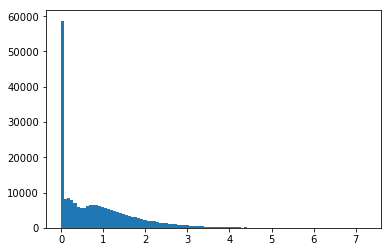

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

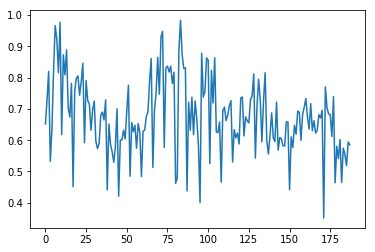

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.218410242899

 1.42214791171
1681

 0.21918222423

 1.42242186719
1682

 0.220267364248

 1.43195695695
1683

 0.219338678109

 1.47610545494
1684

 0.217521830774

 1.50181797132
1685

 0.216776573321

 1.52009985569
1686

 0.217228244505

 1.48005220123
1687

 0.215573120546

 1.4603472125
1688

 0.214953452775

 1.45789811204
1689

 0.215065617786

 1.41714501116
1690

 0.214712310549

 1.44189606509
1691

 0.213825027602

 1.49006713983
1692

 0.213409741042

 1.50636786015


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.856419


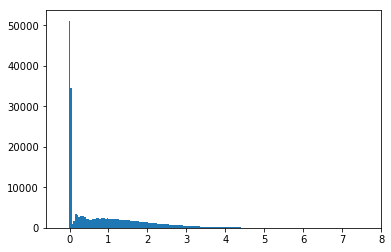

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.833268


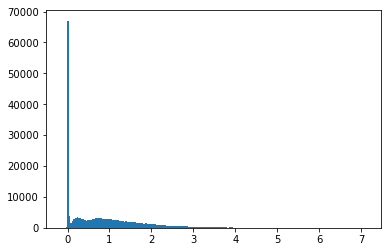

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.863795


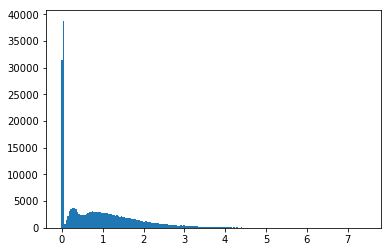

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.820843


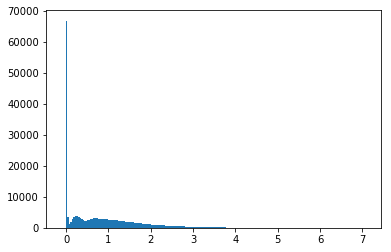

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21495345277526851

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21557312054602026

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21506561778580749

(54, 4100) 0.863795


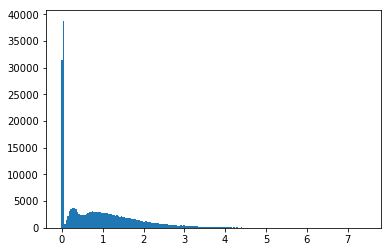

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True